In [1]:
from sklearn.naive_bayes import GaussianNB
import os
import json
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

### Training models with VADER feature set

Number of Selected Features: 24
SVM Accuracy: 57.404761904761905
SVM Precision: 58.105147864184005
SVM Recall: 50.88729016786571
SVM F1 Score: 54.25722321656864


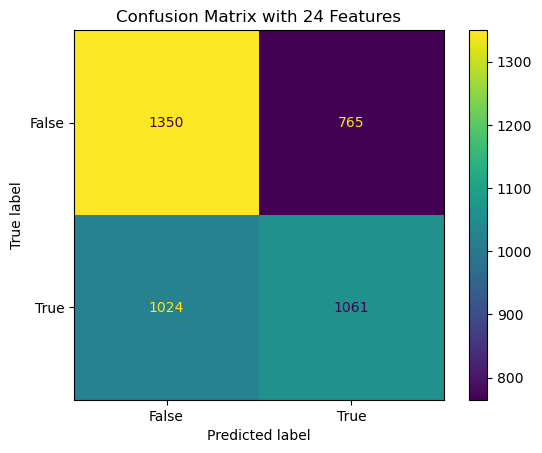

Number of Selected Features: 23
SVM Accuracy: 56.73809523809524
SVM Precision: 58.30235439900867
SVM Recall: 45.13189448441247
SVM F1 Score: 50.87861584211949


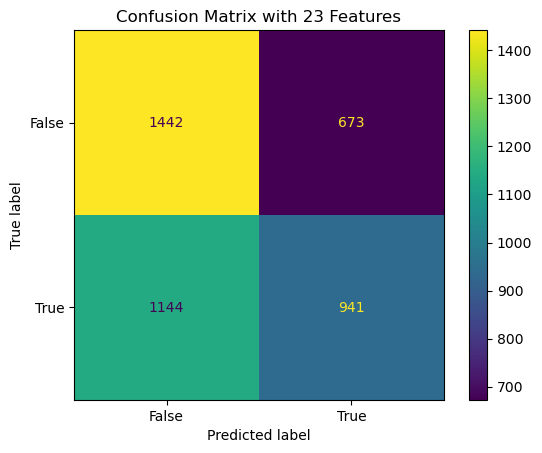

Number of Selected Features: 22
SVM Accuracy: 56.88095238095238
SVM Precision: 58.47772277227723
SVM Recall: 45.32374100719424
SVM F1 Score: 51.06727911375304


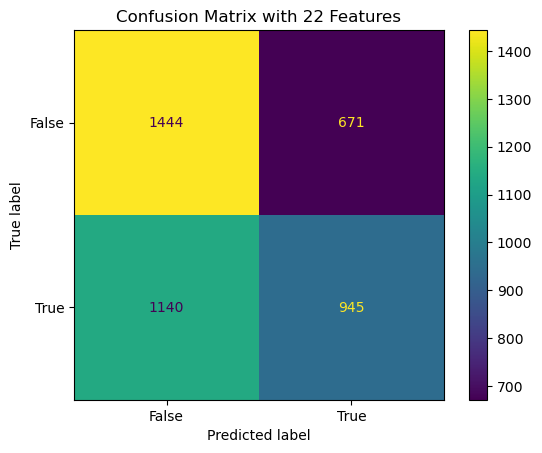

Number of Selected Features: 21
SVM Accuracy: 56.52380952380952
SVM Precision: 58.39274141283215
SVM Recall: 43.21342925659473
SVM F1 Score: 49.66923925027564


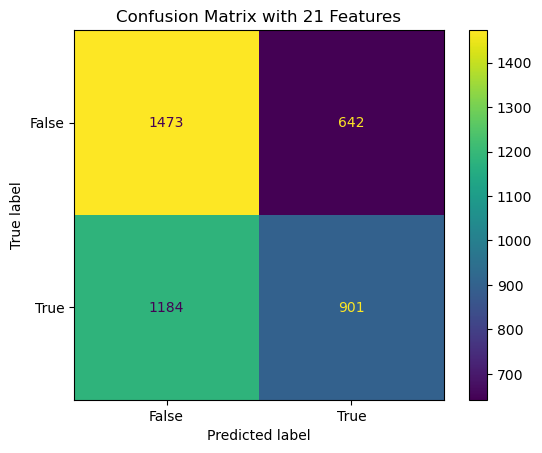

Number of Selected Features: 20
SVM Accuracy: 56.52380952380952
SVM Precision: 58.40363400389358
SVM Recall: 43.16546762589928
SVM F1 Score: 49.64147821290678


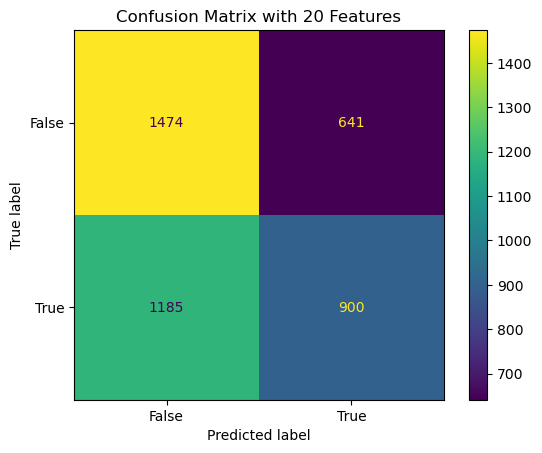

Number of Selected Features: 19
SVM Accuracy: 56.547619047619044
SVM Precision: 58.45253576072822
SVM Recall: 43.117505995203835
SVM F1 Score: 49.62738062379245


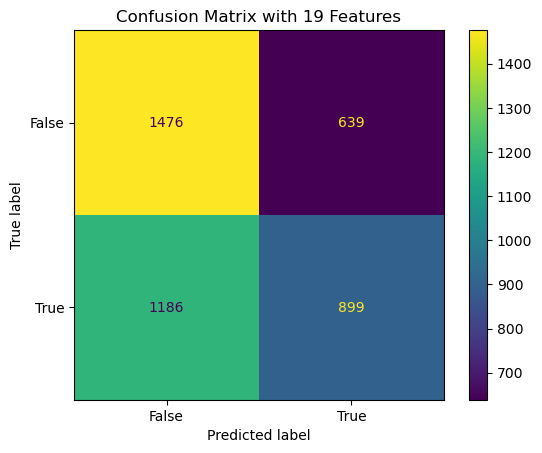

Number of Selected Features: 18
SVM Accuracy: 56.49999999999999
SVM Precision: 58.37662337662337
SVM Recall: 43.117505995203835
SVM F1 Score: 49.60000000000001


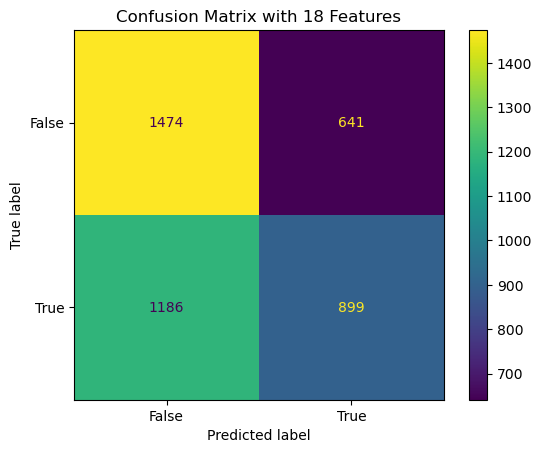

Number of Selected Features: 17
SVM Accuracy: 56.547619047619044
SVM Precision: 58.485639686684074
SVM Recall: 42.9736211031175
SVM F1 Score: 49.54382084600497


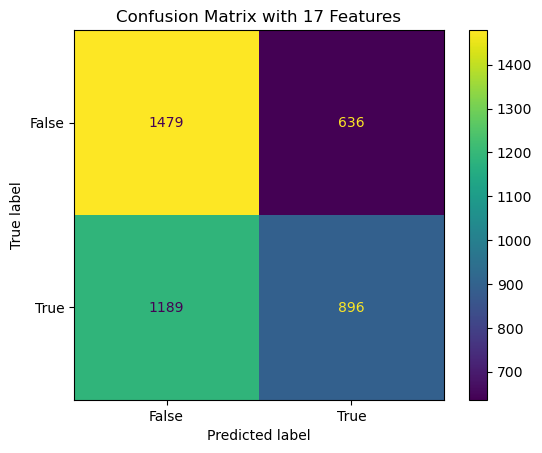

Number of Selected Features: 16
SVM Accuracy: 56.285714285714285
SVM Precision: 58.20698747528016
SVM Recall: 42.35011990407674
SVM F1 Score: 49.02831760133259


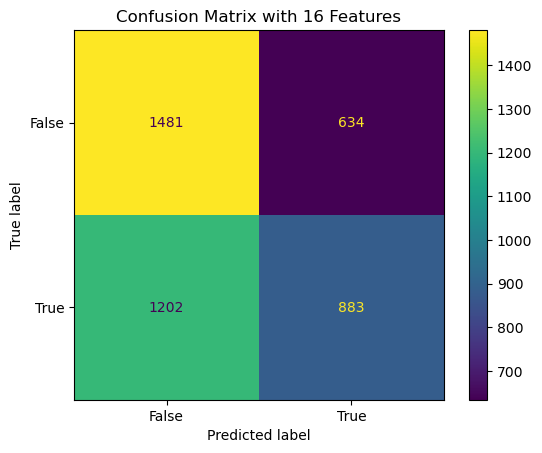

Number of Selected Features: 15
SVM Accuracy: 55.85714285714286
SVM Precision: 57.45642349903163
SVM Recall: 42.68585131894484
SVM F1 Score: 48.98183819482664


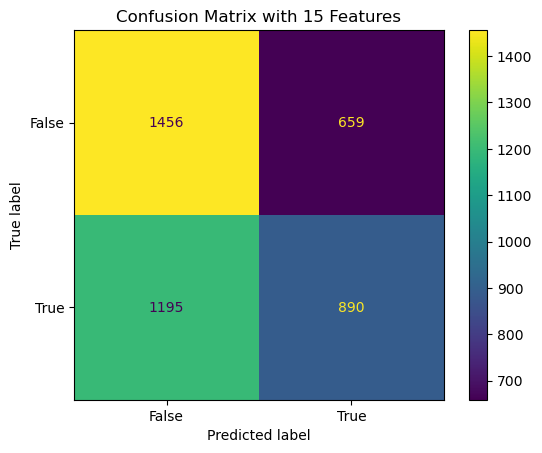

Number of Selected Features: 14
SVM Accuracy: 55.9047619047619
SVM Precision: 57.55022683084899
SVM Recall: 42.589928057553955
SVM F1 Score: 48.95259095920617


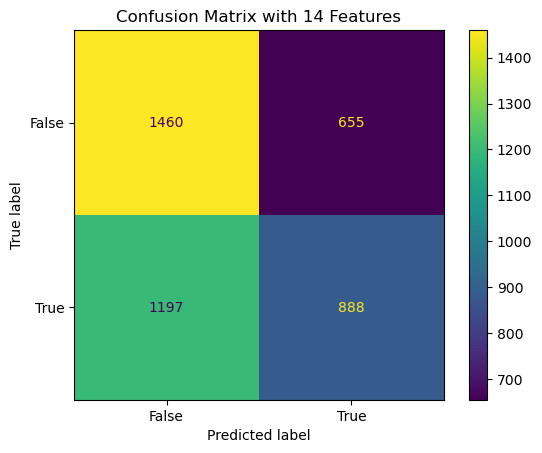

Number of Selected Features: 13
SVM Accuracy: 55.80952380952381
SVM Precision: 57.363344051446944
SVM Recall: 42.78177458033573
SVM F1 Score: 49.010989010989


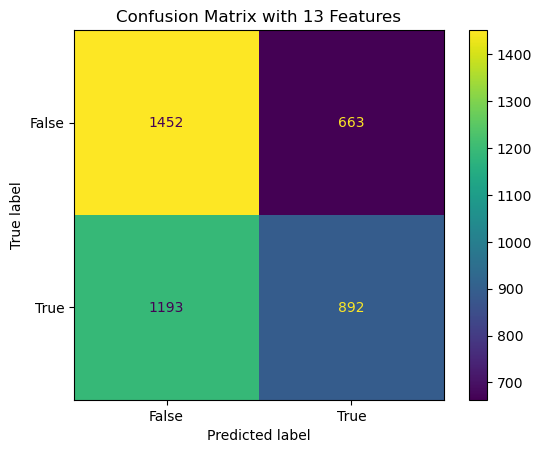

Number of Selected Features: 12
SVM Accuracy: 56.02380952380952
SVM Precision: 57.40049751243781
SVM Recall: 44.26858513189448
SVM F1 Score: 49.986460871919846


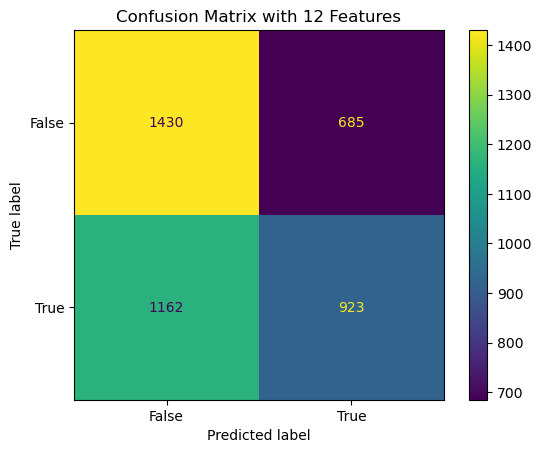

Number of Selected Features: 11
SVM Accuracy: 56.047619047619044
SVM Precision: 57.39938080495356
SVM Recall: 44.460431654676256
SVM F1 Score: 50.10810810810812


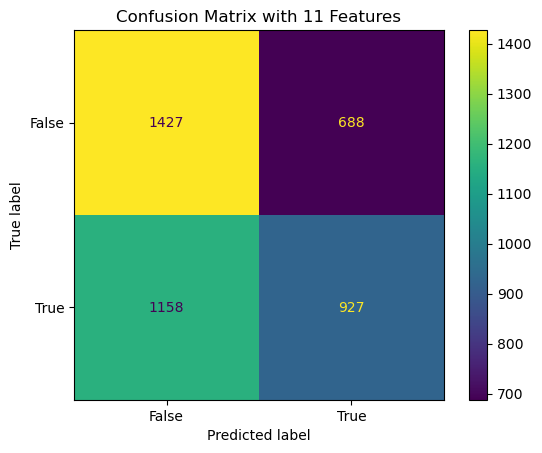

Number of Selected Features: 10
SVM Accuracy: 55.73809523809524
SVM Precision: 58.53474320241692
SVM Recall: 37.170263788968825
SVM F1 Score: 45.467879143443824


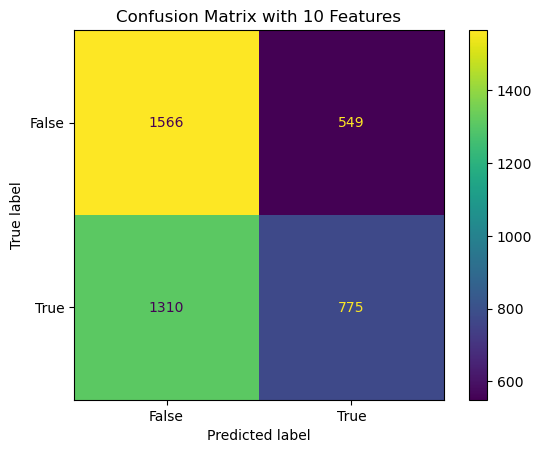

Number of Selected Features: 9
SVM Accuracy: 56.166666666666664
SVM Precision: 59.886547811993516
SVM Recall: 35.44364508393285
SVM F1 Score: 44.53148538716481


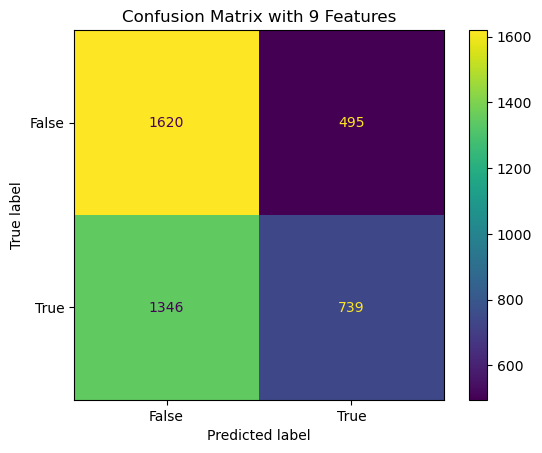

Number of Selected Features: 8
SVM Accuracy: 55.88095238095237
SVM Precision: 64.35643564356435
SVM Recall: 24.940047961630697
SVM F1 Score: 35.94884203249222


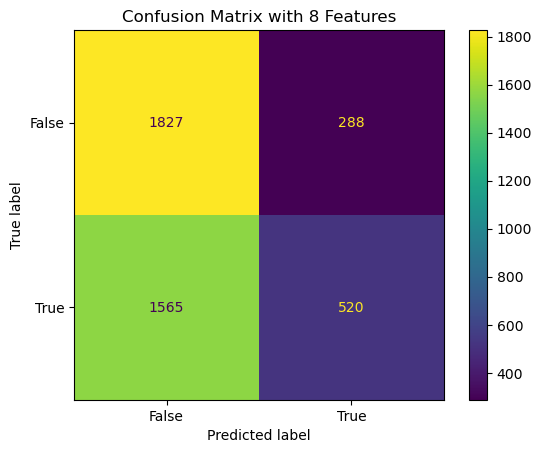

Number of Selected Features: 7
SVM Accuracy: 56.11904761904762
SVM Precision: 64.90147783251231
SVM Recall: 25.275779376498804
SVM F1 Score: 36.38246461857094


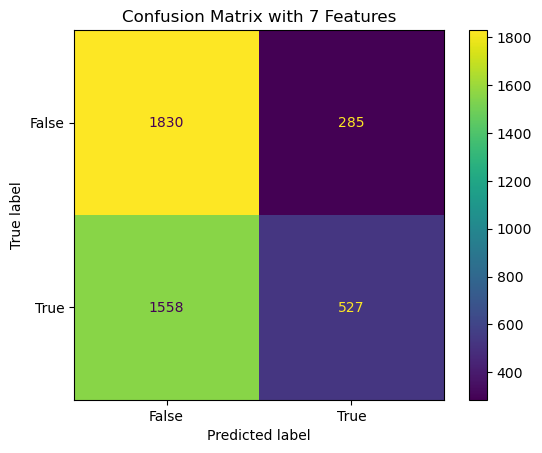

Number of Selected Features: 6
SVM Accuracy: 56.02380952380952
SVM Precision: 64.91228070175438
SVM Recall: 24.84412470023981
SVM F1 Score: 35.93479014915019


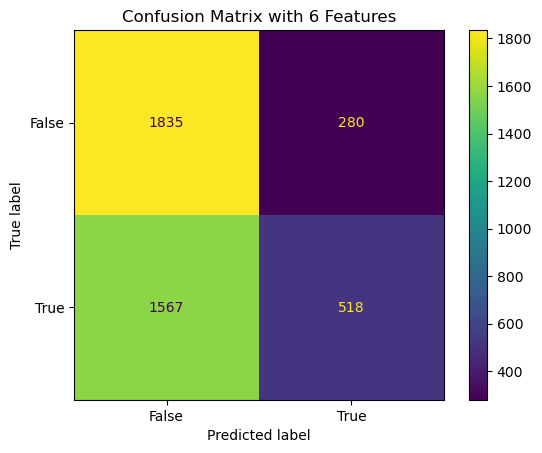

Number of Selected Features: 5
SVM Accuracy: 56.14285714285714
SVM Precision: 66.35262449528938
SVM Recall: 23.645083932853716
SVM F1 Score: 34.865629420084865


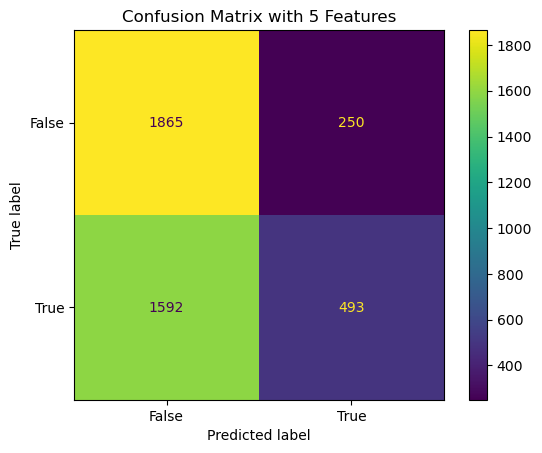

Number of Selected Features: 4
SVM Accuracy: 56.11904761904762
SVM Precision: 66.66666666666666
SVM Recall: 23.213429256594726
SVM F1 Score: 34.436143721095696


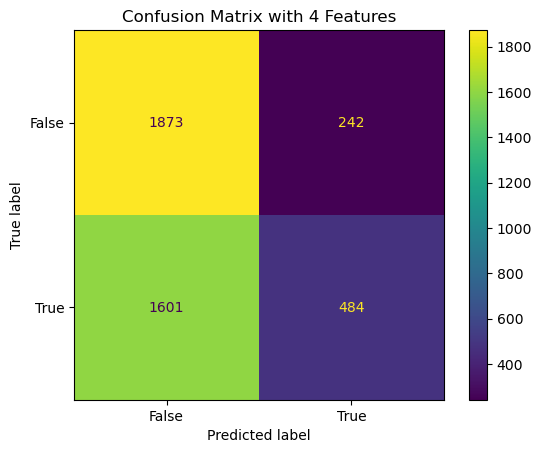

Number of Selected Features: 3
SVM Accuracy: 55.30952380952381
SVM Precision: 65.29411764705883
SVM Recall: 21.294964028776977
SVM F1 Score: 32.11573236889693


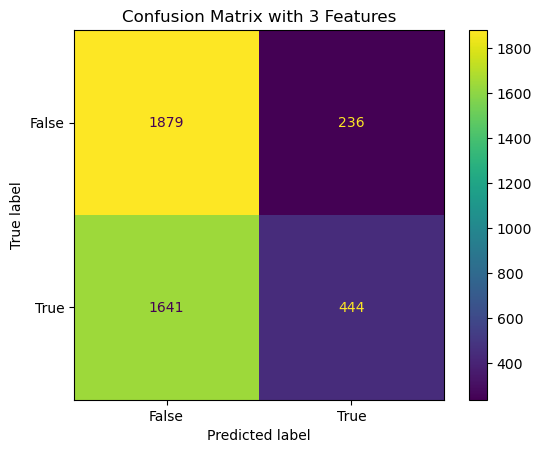

Number of Selected Features: 2
SVM Accuracy: 55.19047619047619
SVM Precision: 65.30920060331825
SVM Recall: 20.7673860911271
SVM F1 Score: 31.513828238719064


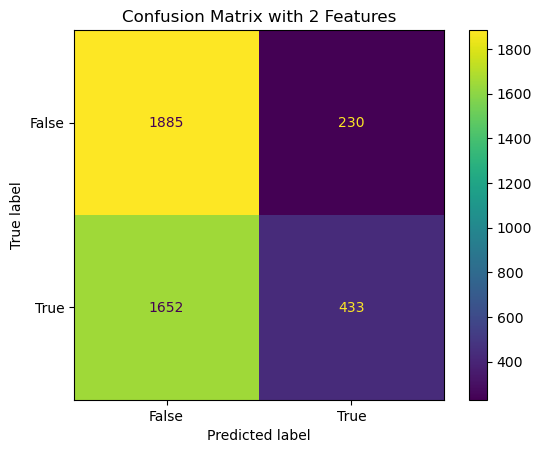

Number of Selected Features: 1
SVM Accuracy: 54.595238095238095
SVM Precision: 65.78014184397163
SVM Recall: 17.793764988009592
SVM F1 Score: 28.010570026425064


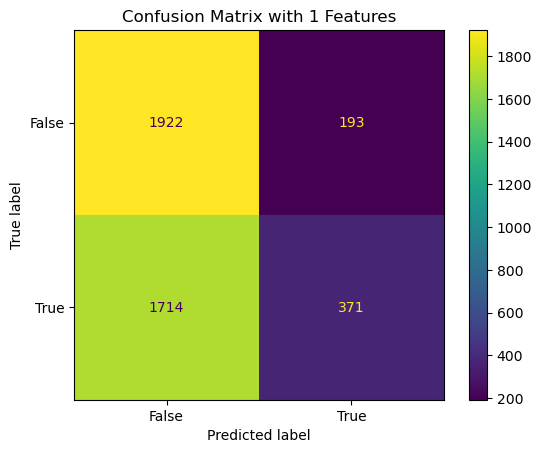

In [3]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Set working directory
os.chdir('/Users/rimpa/Downloads/masters_project')

# Read JSON file
df = pd.read_json('VADER_df_norm.json', orient='records')

# Assign X and y
X = df.drop(['Label'], axis=1)
y = df['Label']

# Training and test set
train_size = 0.8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)

n_features_range = range(X.shape[1], 0, -1)

results = []

# SVM
svm = SVC(kernel='linear')

# Variables to store the best model's results
best_f1_score = 0
best_cm = None
best_n_features = 0

for n_features_to_select in n_features_range:
    rfe = RFE(svm, n_features_to_select=n_features_to_select)
    rfe.fit(X_train, y_train)

    X_train_transformed = rfe.transform(X_train)
    X_test_transformed = rfe.transform(X_test)

    svm.fit(X_train_transformed, y_train)
    predictions = svm.predict(X_test_transformed)

    svm_accuracy = accuracy_score(y_test, predictions) * 100
    svm_precision = precision_score(y_test, predictions) * 100
    svm_recall = recall_score(y_test, predictions) * 100
    svm_f1_score = f1_score(y_test, predictions) * 100

    # Print current results
    print(f"Number of Selected Features: {n_features_to_select}")
    print(f"SVM Accuracy: {svm_accuracy}")
    print(f"SVM Precision: {svm_precision}")
    print(f"SVM Recall: {svm_recall}")
    print(f"SVM F1 Score: {svm_f1_score}")
    
    result = {
        "n_features": n_features_to_select,
        "accuracy": svm_accuracy,
        "precision": svm_precision,
        "recall": svm_recall,
        "f1_score": svm_f1_score
    }

    results.append(result)

    # Display current confusion matrix
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
    disp.plot()
    plt.title(f"Confusion Matrix with {n_features_to_select} Features")
    plt.show()

    # Check if the current F1 score is the best
    if svm_f1_score > best_f1_score:
        best_f1_score = svm_f1_score
        best_cm = cm
        best_n_features = n_features_to_select
        
# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Save the results in an Excel file
results_df.to_excel('results_VADER_ML_SVC.xlsx', index=False)

Best Confusion Matrix:


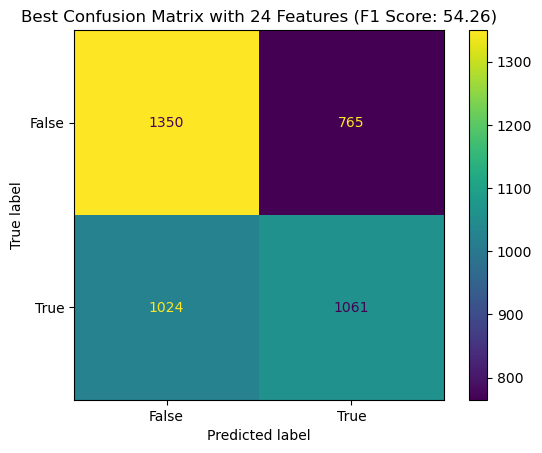

In [4]:
# Display the best confusion matrix in a new cell
print("Best Confusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=best_cm, display_labels=[False, True])
disp.plot()
plt.title(f"Best Confusion Matrix with {best_n_features} Features (F1 Score: {best_f1_score:.2f})")
plt.show()


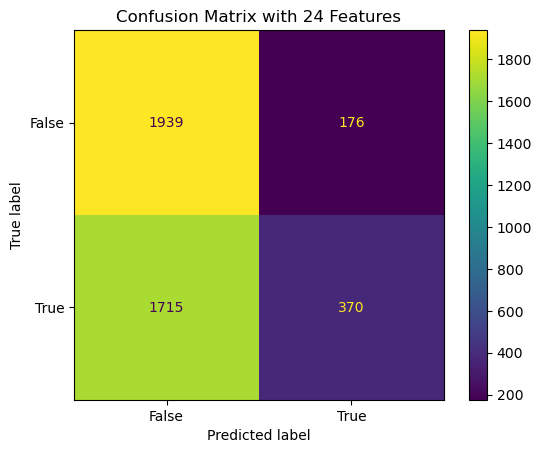

Number of Selected Features: 24
Accuracy: 54.97619047619048
Precision: 67.76556776556777
Recall: 17.74580335731415
F1 Score: 28.12618776130749



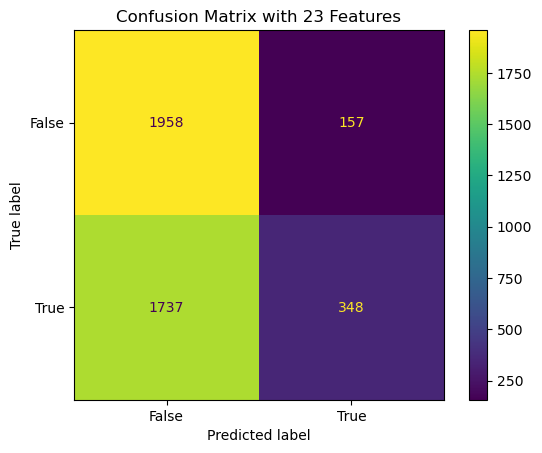

Number of Selected Features: 23
Accuracy: 54.9047619047619
Precision: 68.9108910891089
Recall: 16.69064748201439
F1 Score: 26.872586872586872



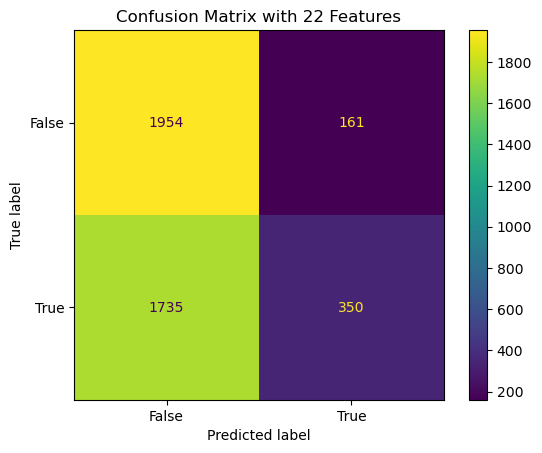

Number of Selected Features: 22
Accuracy: 54.85714285714286
Precision: 68.4931506849315
Recall: 16.786570743405278
F1 Score: 26.964560862865948



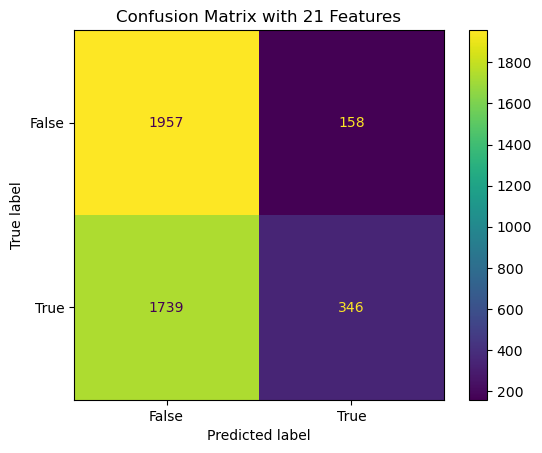

Number of Selected Features: 21
Accuracy: 54.833333333333336
Precision: 68.65079365079364
Recall: 16.5947242206235
F1 Score: 26.728466589416765



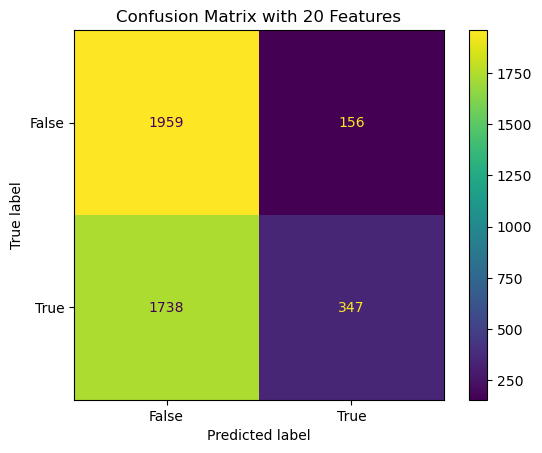

Number of Selected Features: 20
Accuracy: 54.9047619047619
Precision: 68.98608349900597
Recall: 16.642685851318944
F1 Score: 26.8160741885626



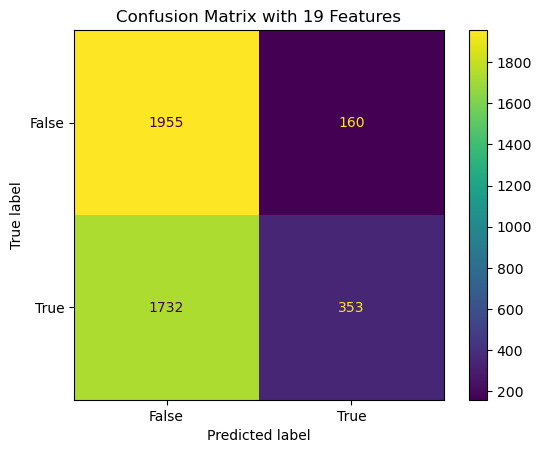

Number of Selected Features: 19
Accuracy: 54.95238095238095
Precision: 68.81091617933723
Recall: 16.930455635491608
F1 Score: 27.174749807544263



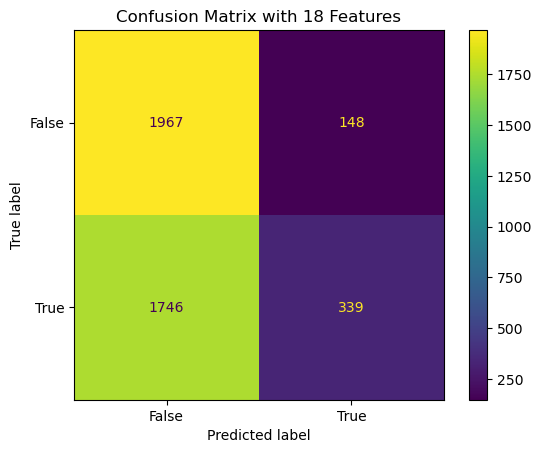

Number of Selected Features: 18
Accuracy: 54.9047619047619
Precision: 69.60985626283367
Recall: 16.258992805755394
F1 Score: 26.360808709175735



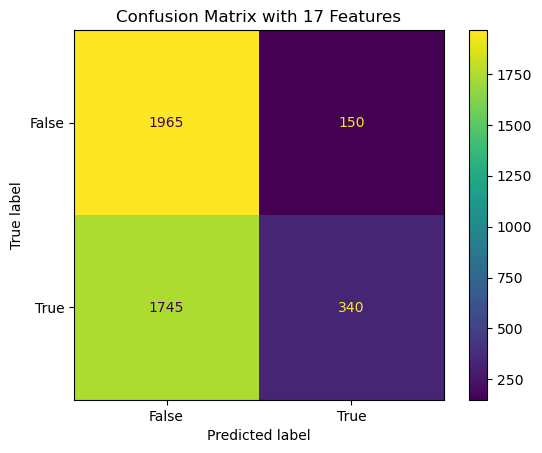

Number of Selected Features: 17
Accuracy: 54.88095238095239
Precision: 69.38775510204081
Recall: 16.30695443645084
F1 Score: 26.407766990291265



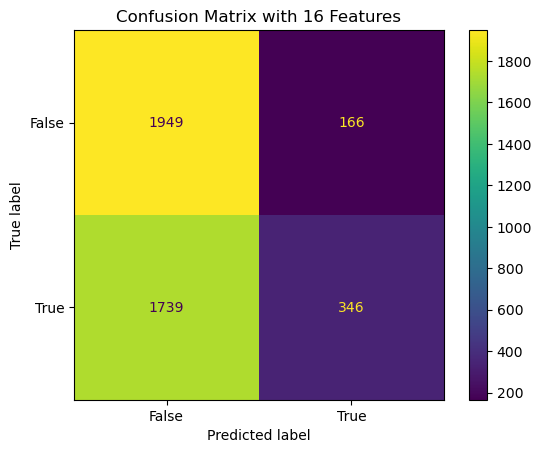

Number of Selected Features: 16
Accuracy: 54.64285714285714
Precision: 67.578125
Recall: 16.5947242206235
F1 Score: 26.64613015017328



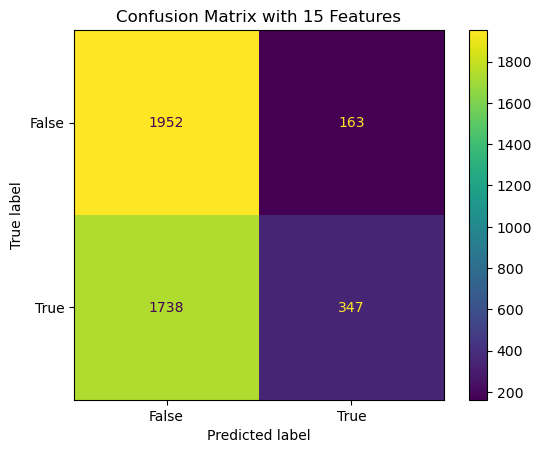

Number of Selected Features: 15
Accuracy: 54.73809523809524
Precision: 68.03921568627452
Recall: 16.642685851318944
F1 Score: 26.74373795761079



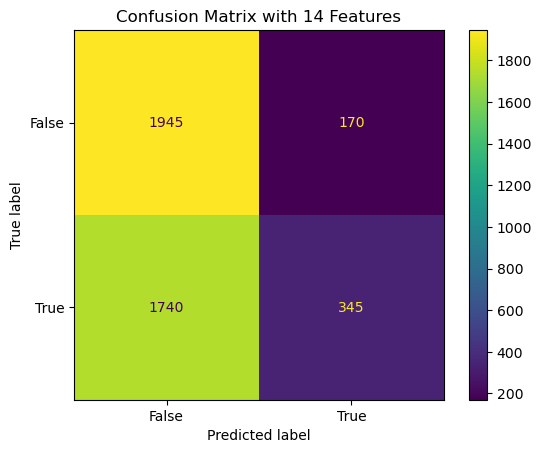

Number of Selected Features: 14
Accuracy: 54.52380952380952
Precision: 66.99029126213593
Recall: 16.546762589928058
F1 Score: 26.53846153846154



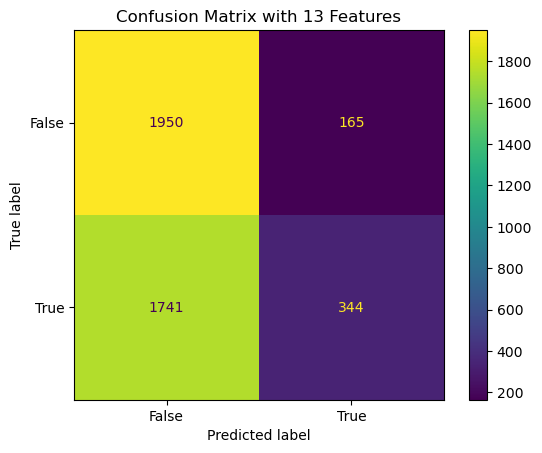

Number of Selected Features: 13
Accuracy: 54.61904761904762
Precision: 67.58349705304518
Recall: 16.498800959232614
F1 Score: 26.522744795682346



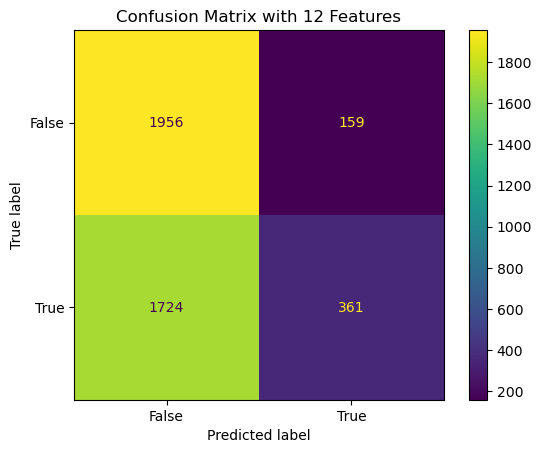

Number of Selected Features: 12
Accuracy: 55.166666666666664
Precision: 69.42307692307692
Recall: 17.314148681055155
F1 Score: 27.715930902111324



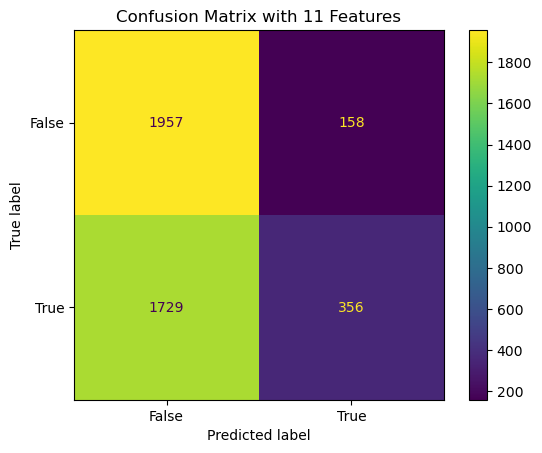

Number of Selected Features: 11
Accuracy: 55.07142857142857
Precision: 69.26070038910505
Recall: 17.074340527577938
F1 Score: 27.395151981531363



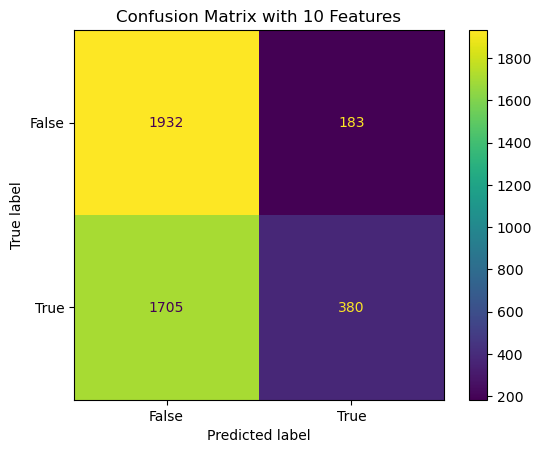

Number of Selected Features: 10
Accuracy: 55.047619047619044
Precision: 67.49555950266429
Recall: 18.225419664268586
F1 Score: 28.700906344410875



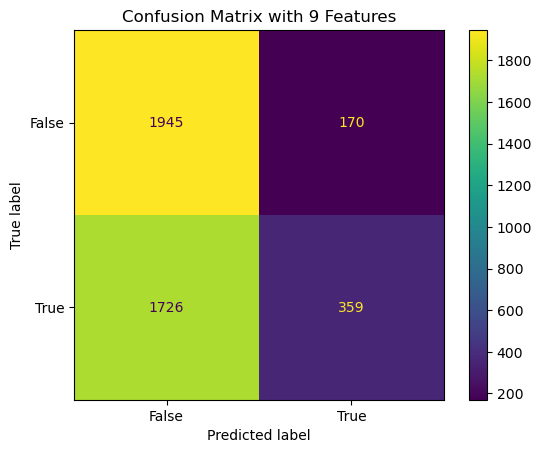

Number of Selected Features: 9
Accuracy: 54.85714285714286
Precision: 67.86389413988658
Recall: 17.218225419664268
F1 Score: 27.467482785003828



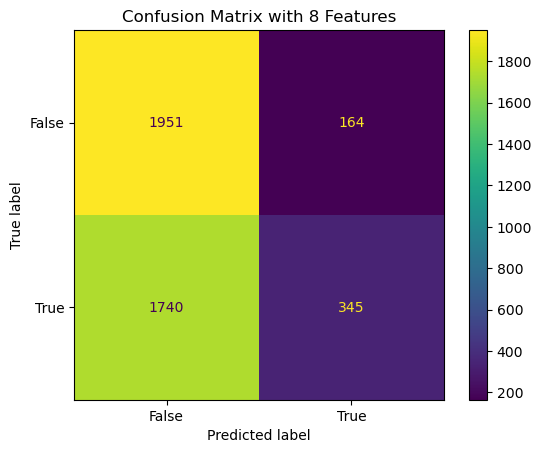

Number of Selected Features: 8
Accuracy: 54.666666666666664
Precision: 67.77996070726915
Recall: 16.546762589928058
F1 Score: 26.599845797995375



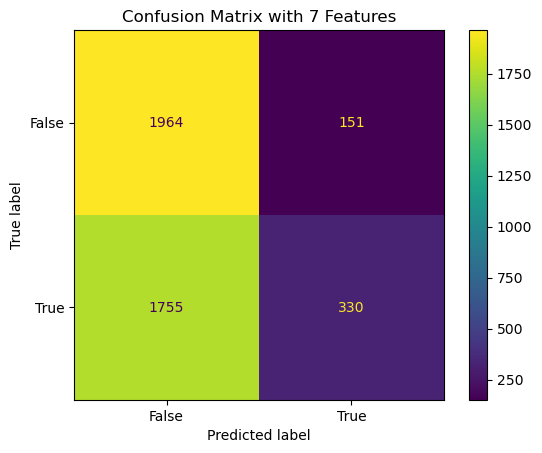

Number of Selected Features: 7
Accuracy: 54.61904761904762
Precision: 68.60706860706861
Recall: 15.827338129496402
F1 Score: 25.720966484801245



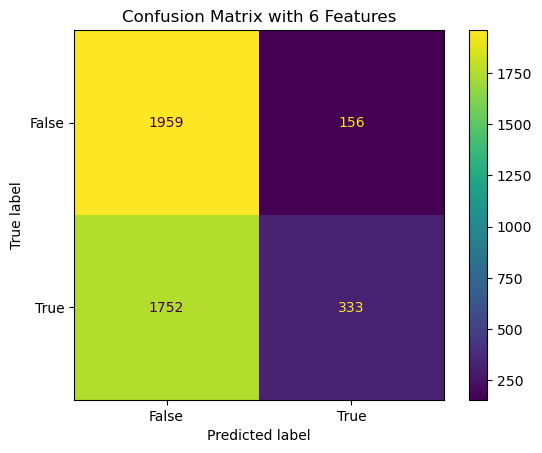

Number of Selected Features: 6
Accuracy: 54.57142857142857
Precision: 68.09815950920245
Recall: 15.971223021582734
F1 Score: 25.874125874125873



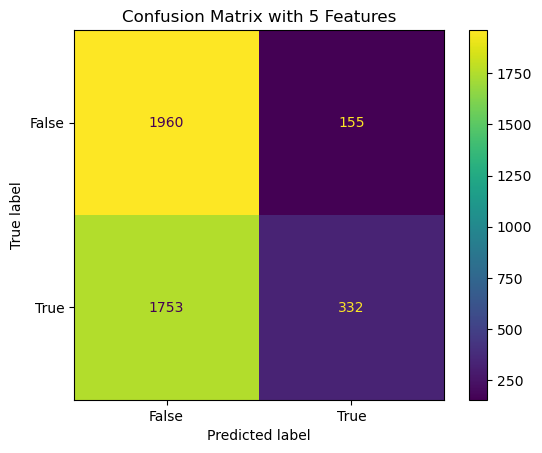

Number of Selected Features: 5
Accuracy: 54.57142857142857
Precision: 68.17248459958932
Recall: 15.923261390887289
F1 Score: 25.816485225505442



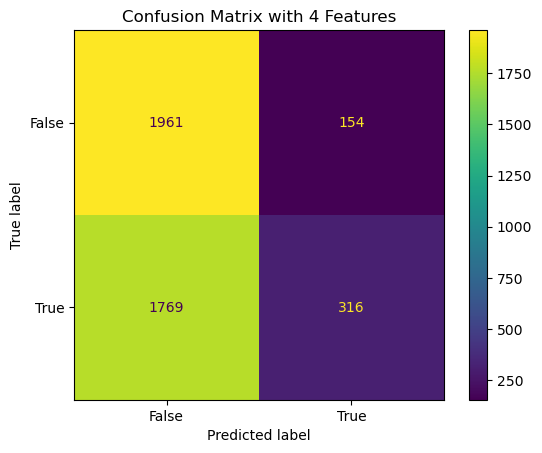

Number of Selected Features: 4
Accuracy: 54.214285714285715
Precision: 67.23404255319149
Recall: 15.15587529976019
F1 Score: 24.735812133072404



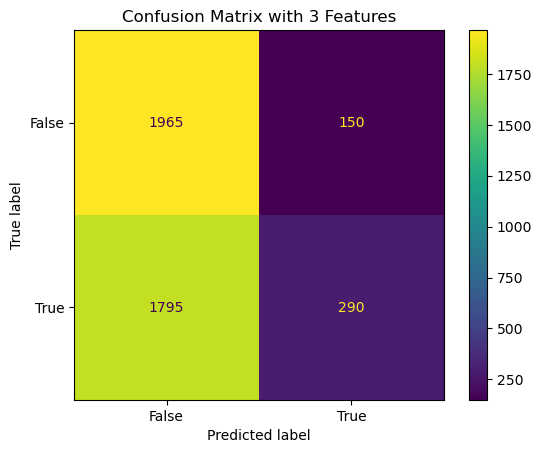

Number of Selected Features: 3
Accuracy: 53.69047619047619
Precision: 65.9090909090909
Recall: 13.908872901678656
F1 Score: 22.97029702970297



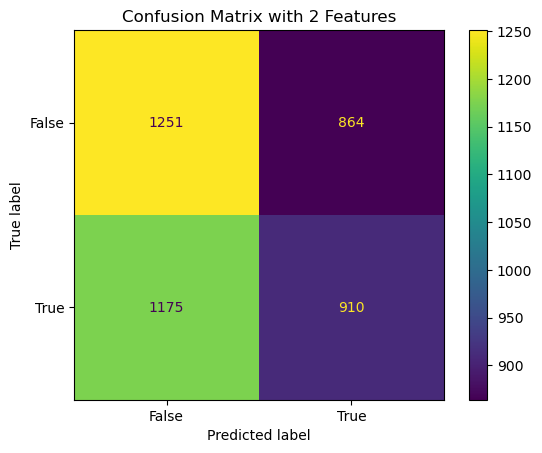

Number of Selected Features: 2
Accuracy: 51.45238095238095
Precision: 51.29650507328072
Recall: 43.645083932853716
F1 Score: 47.162477325732056



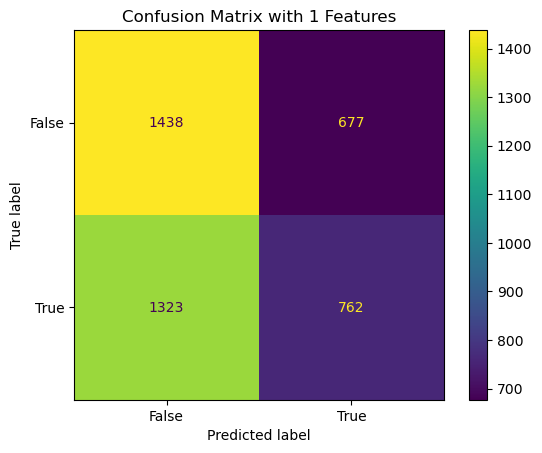

Number of Selected Features: 1
Accuracy: 52.38095238095239
Precision: 52.95343988881167
Recall: 36.54676258992806
F1 Score: 43.24631101021566



In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import os

# Set working directory
os.chdir('/Users/rimpa/Downloads/masters_project')

# Read JSON file
df = pd.read_json('VADER_df_norm.json', orient='records')

# Train and test set
X = df.drop(['Label'], axis=1)
y = df['Label']
train_size = 0.8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)

n_features_range = range(X.shape[1], 0, -1)

results = []

# Variables to store the best model's results
best_f1_score = 0
best_cm = None
best_n_features = 0

for n_features_to_select in n_features_range:
    regressor = RandomForestRegressor(n_estimators=100, max_depth=10)
    rfe = RFE(regressor, n_features_to_select=n_features_to_select)
    rfe.fit(X_train, y_train)

    X_train_transformed = rfe.transform(X_train)
    X_test_transformed = rfe.transform(X_test)

    # Gaussian Naive Bayes
    gnb1 = GaussianNB()
    gnb1.fit(X_train_transformed, y_train)
    predictions = gnb1.predict(X_test_transformed)

    # Evaluate
    gnb_accuracy = accuracy_score(y_test, predictions) * 100
    gnb_precision = precision_score(y_test, predictions) * 100
    gnb_recall = recall_score(y_test, predictions) * 100
    gnb_f1_score = f1_score(y_test, predictions) * 100

    # Display current confusion matrix
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
    disp.plot()
    plt.title(f"Confusion Matrix with {n_features_to_select} Features")
    plt.show()

    print(f"Number of Selected Features: {n_features_to_select}")
    print("Accuracy:", gnb_accuracy)
    print("Precision:", gnb_precision)
    print("Recall:", gnb_recall)
    print("F1 Score:", gnb_f1_score)
    print()
    
    result = {
        "n_features": n_features_to_select,
        "accuracy": gnb_accuracy,
        "precision": gnb_precision,
        "recall": gnb_recall,
        "f1_score": gnb_f1_score
    }

    results.append(result)    

    # Check if the current F1 score is the best
    if gnb_f1_score > best_f1_score:
        best_f1_score = gnb_f1_score
        best_cm = cm
        best_n_features = n_features_to_select

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Save the results in an Excel file
results_df.to_excel('results_VADER_ML_NB.xlsx', index=False)

Best Confusion Matrix:


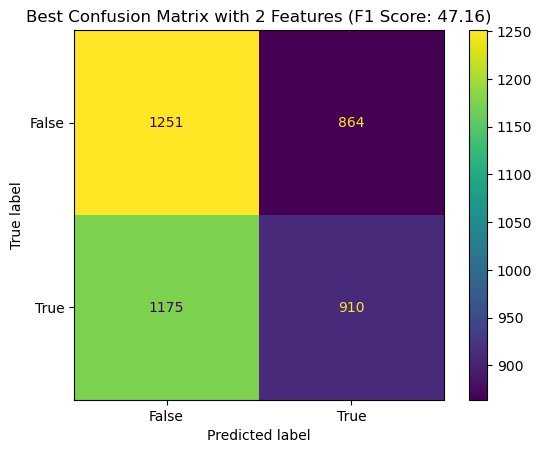

In [6]:
# Display the best confusion matrix in a new cell
print("Best Confusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=best_cm, display_labels=[False, True])
disp.plot()
plt.title(f"Best Confusion Matrix with {best_n_features} Features (F1 Score: {best_f1_score:.2f})")
plt.show()

### Training models with SentiWordNet feature set

Number of Selected Features: 35
SVM Accuracy: 59.11904761904761
SVM Precision: 60.12101210121013
SVM Recall: 52.4220623501199
SVM F1 Score: 56.00819882141943


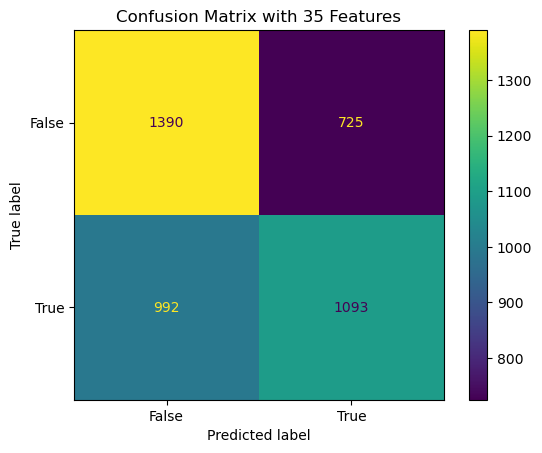

Number of Selected Features: 34
SVM Accuracy: 59.11904761904761
SVM Precision: 60.12101210121013
SVM Recall: 52.4220623501199
SVM F1 Score: 56.00819882141943


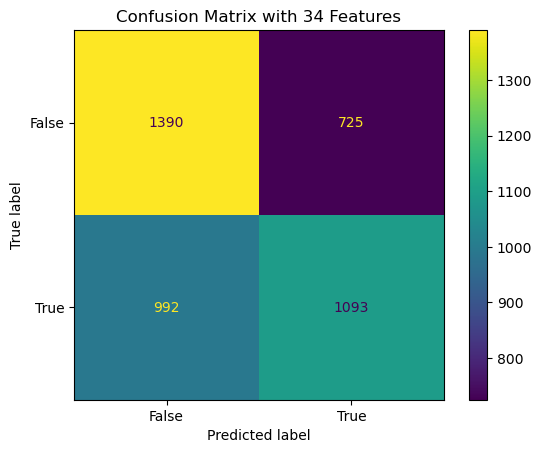

Number of Selected Features: 33
SVM Accuracy: 58.61904761904761
SVM Precision: 63.11413454270597
SVM Recall: 40.04796163069545
SVM F1 Score: 49.002347417840376


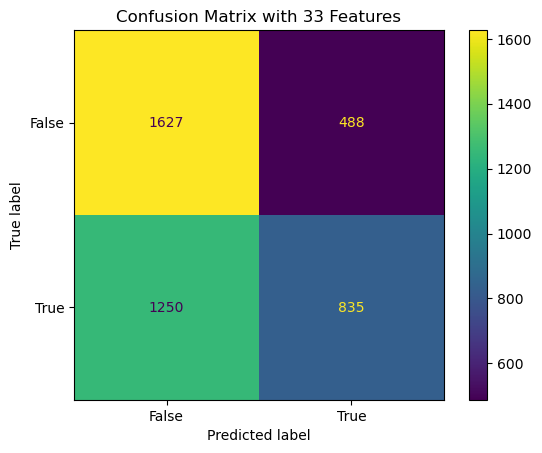

Number of Selected Features: 32
SVM Accuracy: 58.61904761904761
SVM Precision: 63.11413454270597
SVM Recall: 40.04796163069545
SVM F1 Score: 49.002347417840376


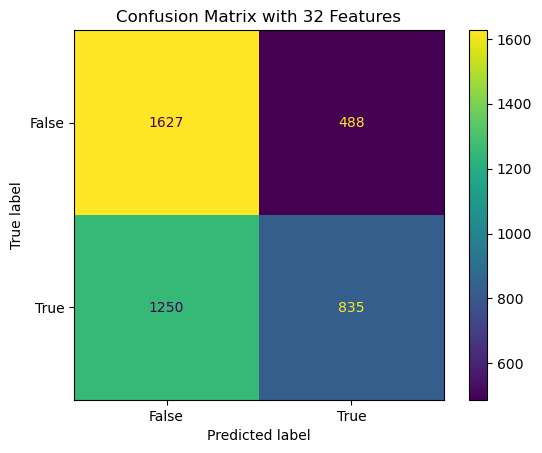

Number of Selected Features: 31
SVM Accuracy: 58.61904761904761
SVM Precision: 63.11413454270597
SVM Recall: 40.04796163069545
SVM F1 Score: 49.002347417840376


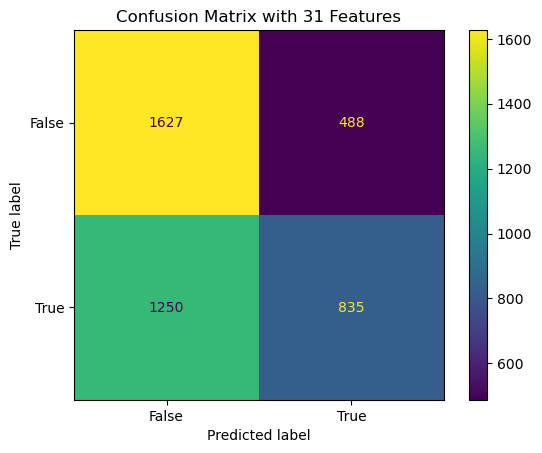

Number of Selected Features: 30
SVM Accuracy: 57.738095238095234
SVM Precision: 65.81632653061224
SVM Recall: 30.935251798561154
SVM F1 Score: 42.08809135399674


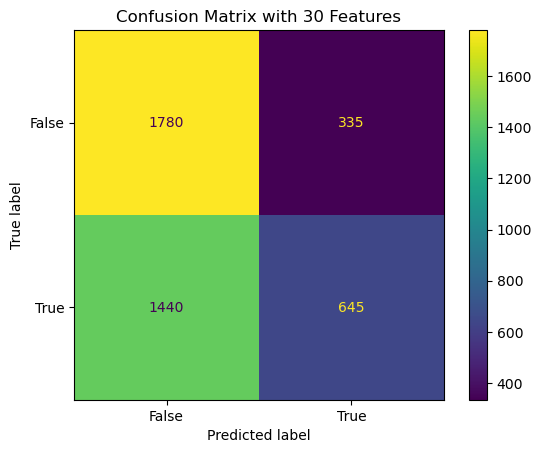

Number of Selected Features: 29
SVM Accuracy: 57.714285714285715
SVM Precision: 65.78140960163432
SVM Recall: 30.887290167865704
SVM F1 Score: 42.03655352480417


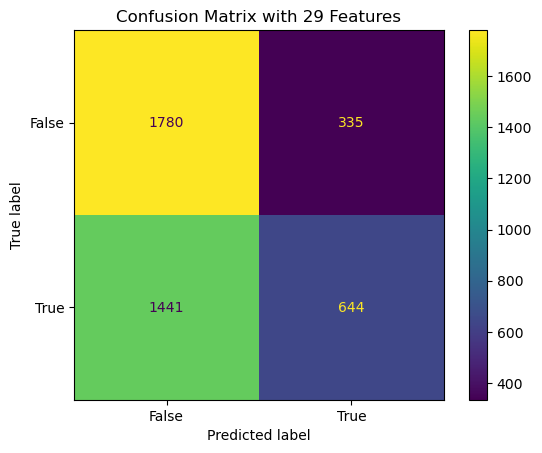

Number of Selected Features: 28
SVM Accuracy: 57.69047619047619
SVM Precision: 65.71428571428571
SVM Recall: 30.887290167865704
SVM F1 Score: 42.02283849918434


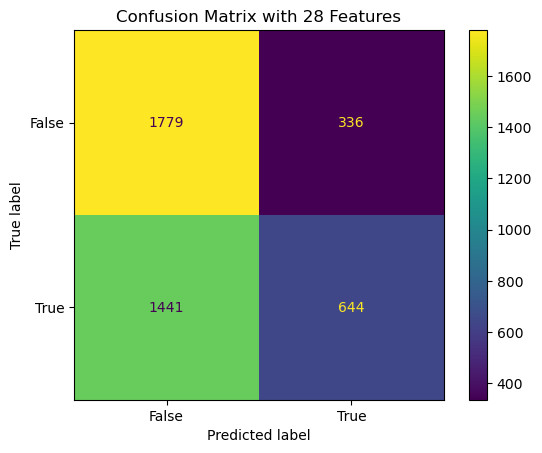

Number of Selected Features: 27
SVM Accuracy: 57.714285714285715
SVM Precision: 65.62184024266936
SVM Recall: 31.127098321342928
SVM F1 Score: 42.22511385816526


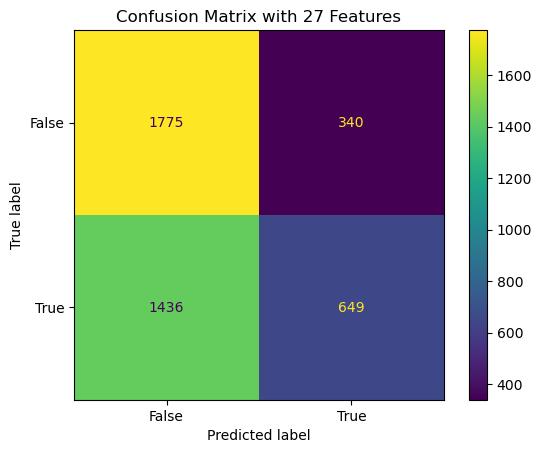

Number of Selected Features: 26
SVM Accuracy: 57.61904761904761
SVM Precision: 65.4196157735086
SVM Recall: 31.031175059952037
SVM F1 Score: 42.09499024072869


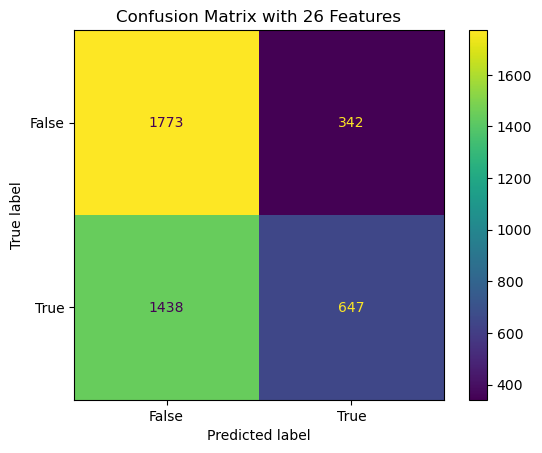

Number of Selected Features: 25
SVM Accuracy: 57.0952380952381
SVM Precision: 64.75495307612096
SVM Recall: 29.784172661870507
SVM F1 Score: 40.80157687253614


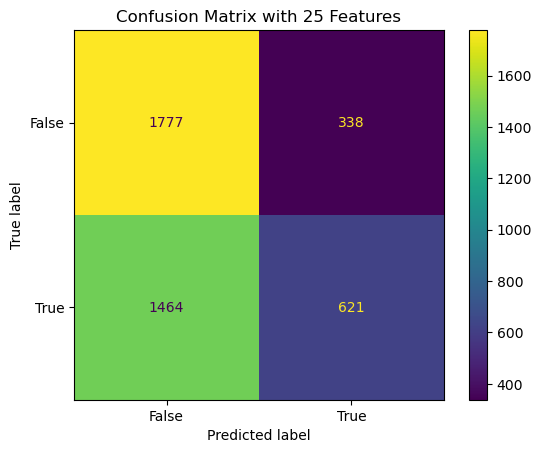

Number of Selected Features: 24
SVM Accuracy: 57.35714285714286
SVM Precision: 65.34446764091858
SVM Recall: 30.023980815347723
SVM F1 Score: 41.14360828130135


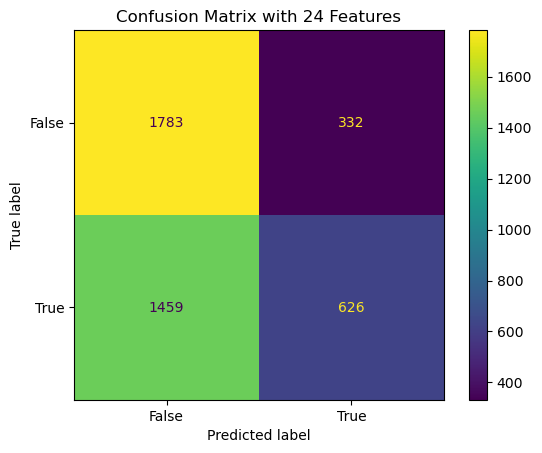

Number of Selected Features: 23
SVM Accuracy: 57.23809523809524
SVM Precision: 65.03642039542143
SVM Recall: 29.97601918465228
SVM F1 Score: 41.037426132632966


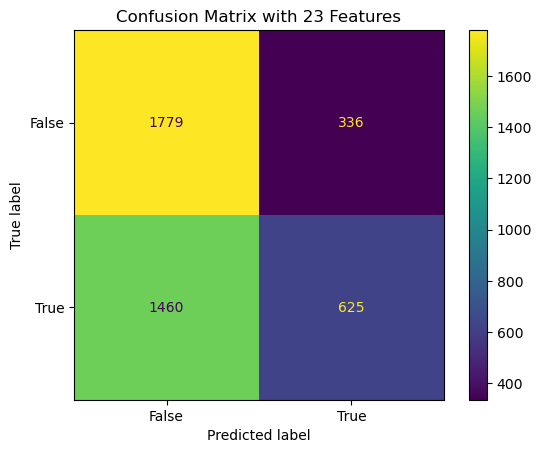

Number of Selected Features: 22
SVM Accuracy: 57.047619047619044
SVM Precision: 64.58982346832815
SVM Recall: 29.832134292565947
SVM F1 Score: 40.813648293963254


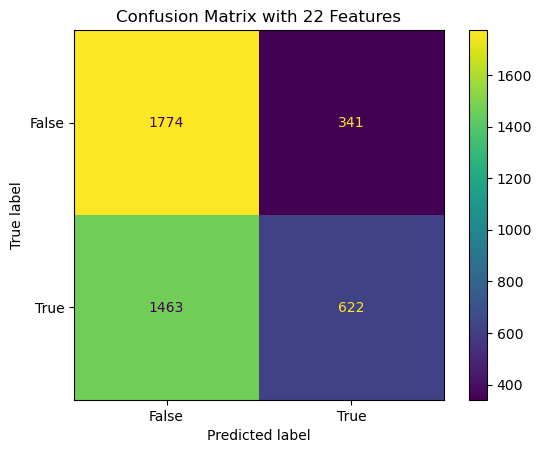

Number of Selected Features: 21
SVM Accuracy: 56.97619047619048
SVM Precision: 65.41019955654102
SVM Recall: 28.297362110311752
SVM F1 Score: 39.504519584867765


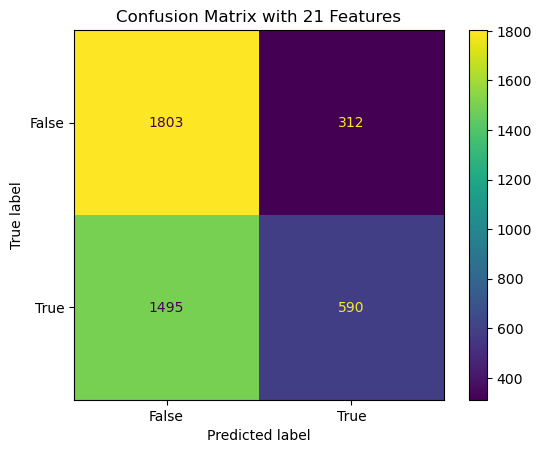

Number of Selected Features: 20
SVM Accuracy: 57.047619047619044
SVM Precision: 65.52486187845304
SVM Recall: 28.44124700239808
SVM F1 Score: 39.66555183946488


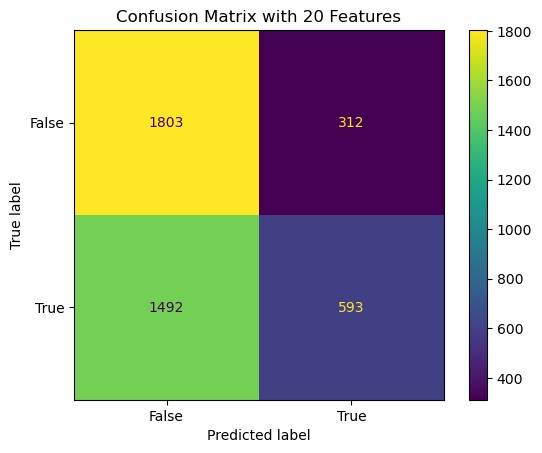

Number of Selected Features: 19
SVM Accuracy: 56.97619047619048
SVM Precision: 65.97701149425286
SVM Recall: 27.529976019184655
SVM F1 Score: 38.84940778341793


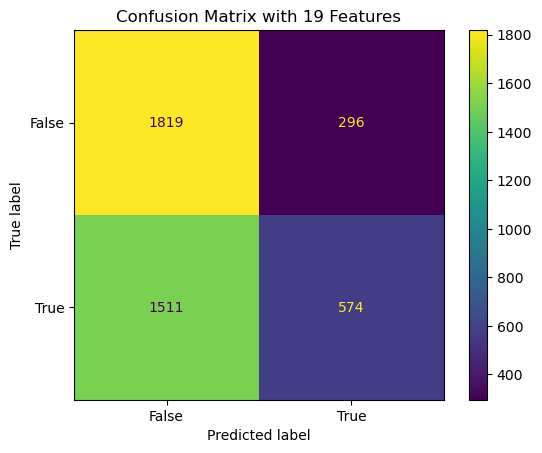

Number of Selected Features: 18
SVM Accuracy: 57.047619047619044
SVM Precision: 66.16800920598389
SVM Recall: 27.577937649880095
SVM F1 Score: 38.93026404874747


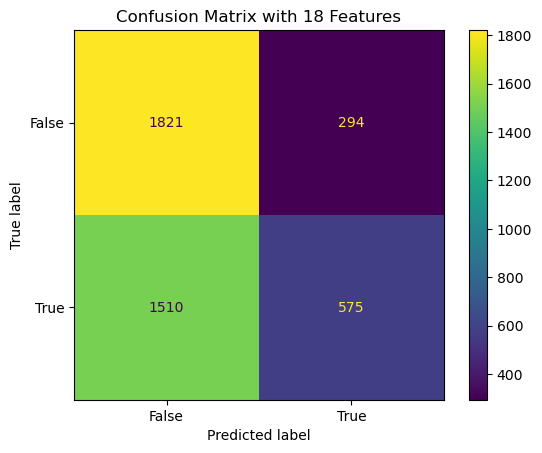

Number of Selected Features: 17
SVM Accuracy: 56.97619047619048
SVM Precision: 66.01382488479263
SVM Recall: 27.482014388489205
SVM F1 Score: 38.80799187267186


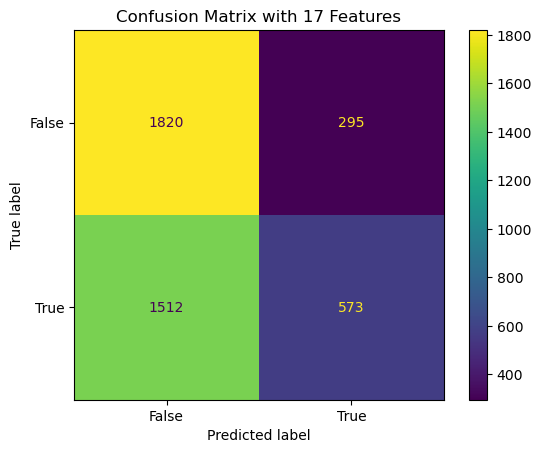

Number of Selected Features: 16
SVM Accuracy: 56.97619047619048
SVM Precision: 66.01382488479263
SVM Recall: 27.482014388489205
SVM F1 Score: 38.80799187267186


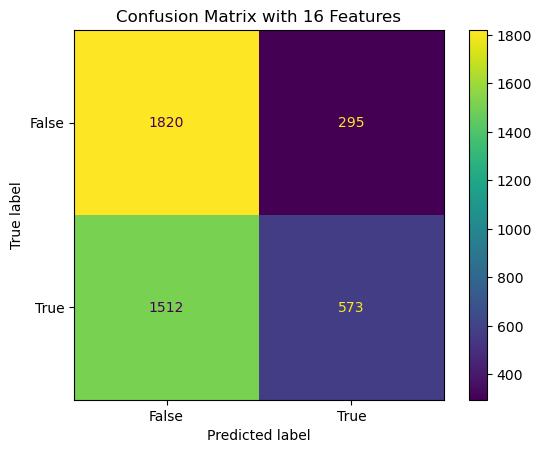

Number of Selected Features: 15
SVM Accuracy: 56.85714285714286
SVM Precision: 65.85365853658537
SVM Recall: 27.194244604316548
SVM F1 Score: 38.4928716904277


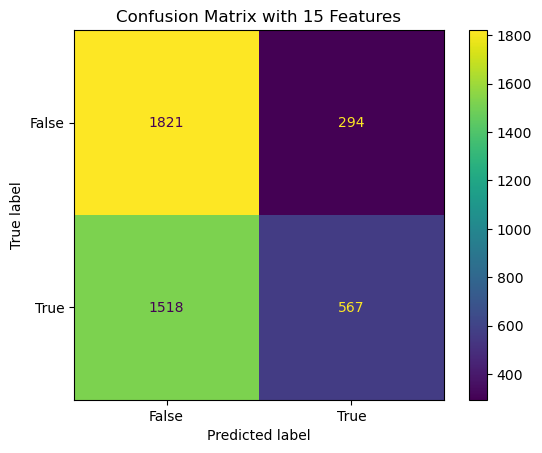

Number of Selected Features: 14
SVM Accuracy: 56.88095238095238
SVM Precision: 68.12169312169311
SVM Recall: 24.700239808153476
SVM F1 Score: 36.254839845124955


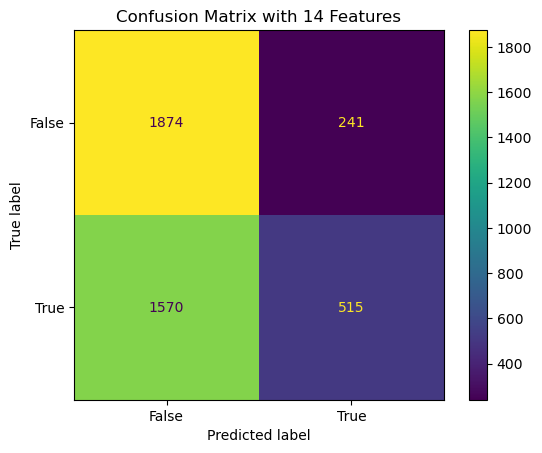

Number of Selected Features: 13
SVM Accuracy: 56.80952380952381
SVM Precision: 68.13922356091031
SVM Recall: 24.412470023980816
SVM F1 Score: 35.94632768361582


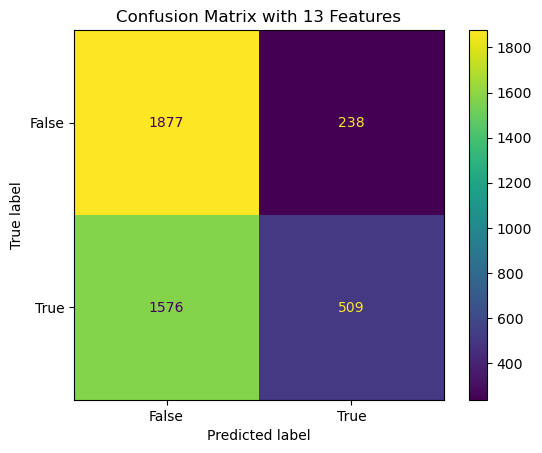

Number of Selected Features: 12
SVM Accuracy: 56.666666666666664
SVM Precision: 68.17558299039781
SVM Recall: 23.836930455635493
SVM F1 Score: 35.32338308457712


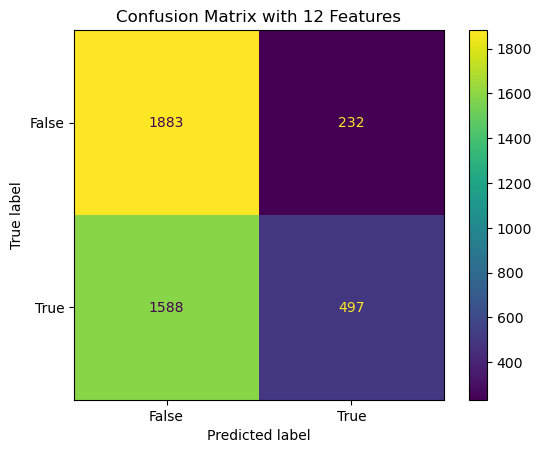

Number of Selected Features: 11
SVM Accuracy: 56.5952380952381
SVM Precision: 68.04407713498622
SVM Recall: 23.693045563549163
SVM F1 Score: 35.147634293845606


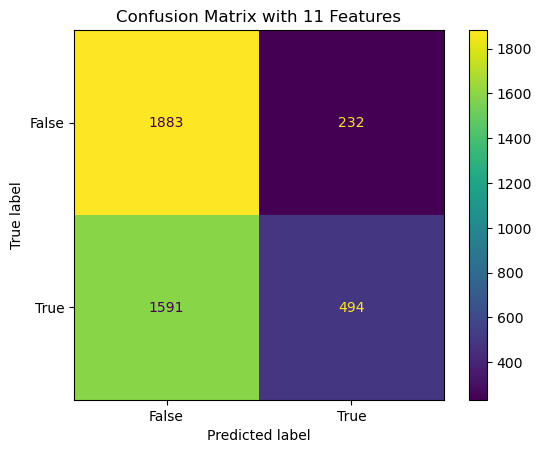

Number of Selected Features: 10
SVM Accuracy: 56.404761904761905
SVM Precision: 68.35260115606935
SVM Recall: 22.685851318944845
SVM F1 Score: 34.0655383507382


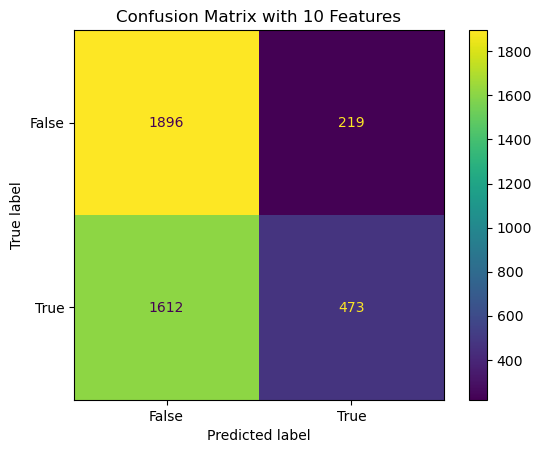

Number of Selected Features: 9
SVM Accuracy: 56.00000000000001
SVM Precision: 68.37209302325581
SVM Recall: 21.151079136690647
SVM F1 Score: 32.30769230769231


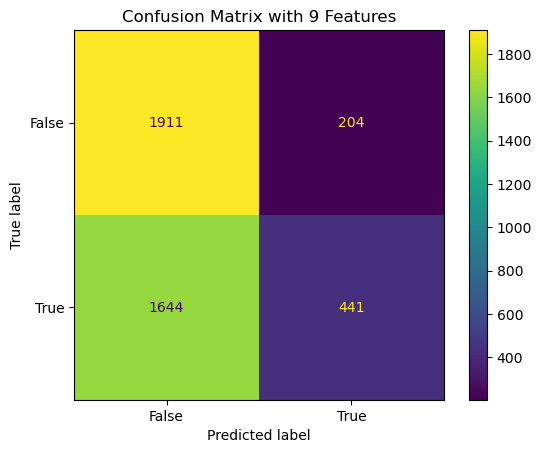

Number of Selected Features: 8
SVM Accuracy: 56.047619047619044
SVM Precision: 68.81889763779527
SVM Recall: 20.959232613908874
SVM F1 Score: 32.132352941176464


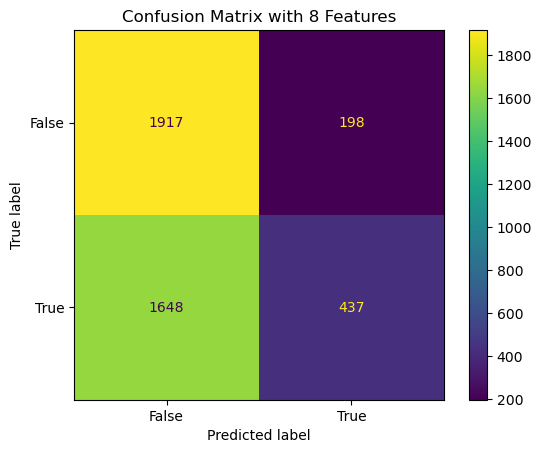

Number of Selected Features: 7
SVM Accuracy: 55.64285714285714
SVM Precision: 68.1967213114754
SVM Recall: 19.952038369304557
SVM F1 Score: 30.871985157699438


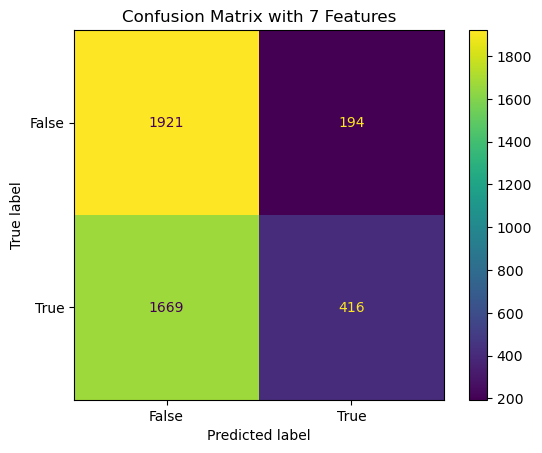

Number of Selected Features: 6
SVM Accuracy: 55.85714285714286
SVM Precision: 69.0909090909091
SVM Recall: 20.047961630695443
SVM F1 Score: 31.078066914498137


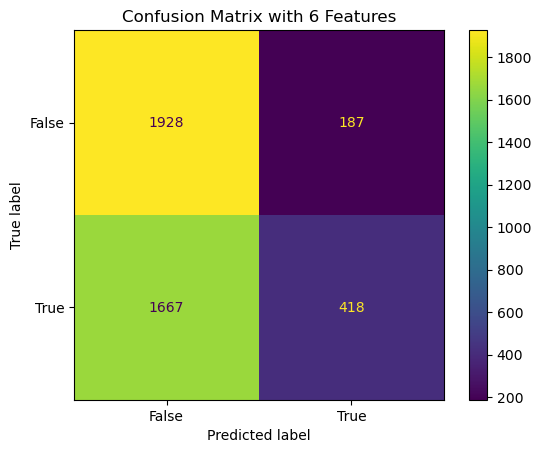

Number of Selected Features: 5
SVM Accuracy: 55.333333333333336
SVM Precision: 68.82882882882882
SVM Recall: 18.321342925659472
SVM F1 Score: 28.93939393939394


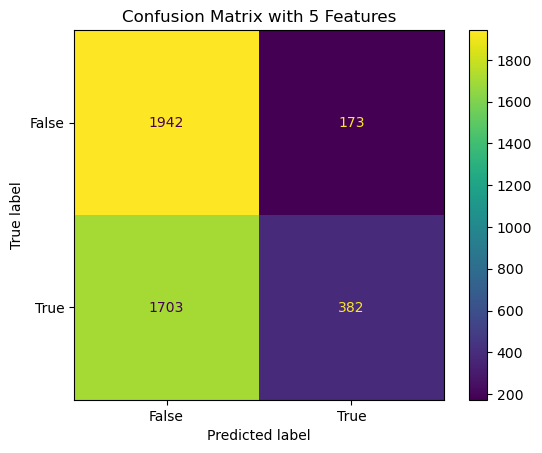

Number of Selected Features: 4
SVM Accuracy: 54.88095238095239
SVM Precision: 67.33576642335767
SVM Recall: 17.697841726618705
SVM F1 Score: 28.028864413216866


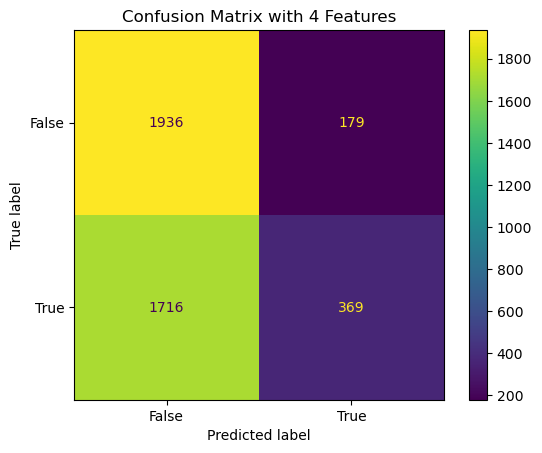

Number of Selected Features: 3
SVM Accuracy: 54.9047619047619
SVM Precision: 68.40077071290945
SVM Recall: 17.026378896882495
SVM F1 Score: 27.265745007680493


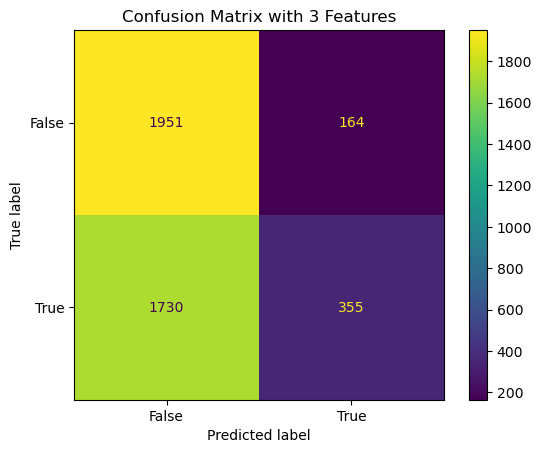

Number of Selected Features: 2
SVM Accuracy: 54.52380952380952
SVM Precision: 68.65671641791045
SVM Recall: 15.443645083932852
SVM F1 Score: 25.21534847298355


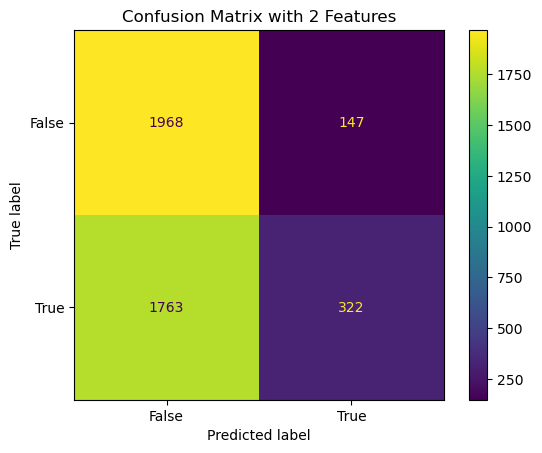

Number of Selected Features: 1
SVM Accuracy: 53.30952380952381
SVM Precision: 68.562874251497
SVM Recall: 10.983213429256594
SVM F1 Score: 18.933443571723853


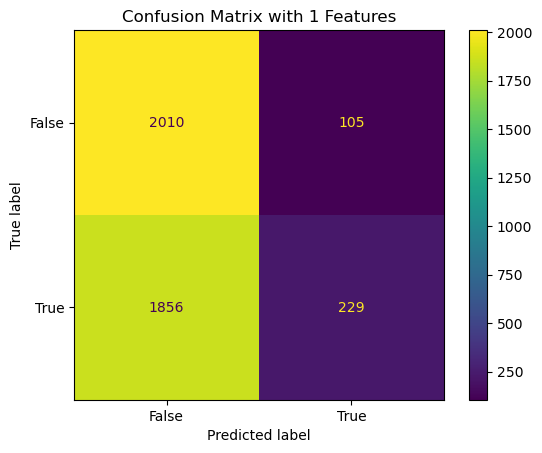

In [7]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Set working directory
os.chdir('/Users/rimpa/Downloads/masters_project')

# Read JSON file
df = pd.read_json('senti_df_norm.json', orient='records')

# Assign X and y
X = df.drop(['Label'], axis=1)
y = df['Label']

# Training and test set
train_size = 0.8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)

n_features_range = range(X.shape[1], 0, -1)

results = []

# SVM
svm = SVC(kernel='linear')

# Variables to store the best model's results
best_f1_score = 0
best_cm = None
best_n_features = 0

for n_features_to_select in n_features_range:
    rfe = RFE(svm, n_features_to_select=n_features_to_select)
    rfe.fit(X_train, y_train)

    X_train_transformed = rfe.transform(X_train)
    X_test_transformed = rfe.transform(X_test)

    svm.fit(X_train_transformed, y_train)
    predictions = svm.predict(X_test_transformed)

    svm_accuracy = accuracy_score(y_test, predictions) * 100
    svm_precision = precision_score(y_test, predictions) * 100
    svm_recall = recall_score(y_test, predictions) * 100
    svm_f1_score = f1_score(y_test, predictions) * 100

    # Print current results
    print(f"Number of Selected Features: {n_features_to_select}")
    print(f"SVM Accuracy: {svm_accuracy}")
    print(f"SVM Precision: {svm_precision}")
    print(f"SVM Recall: {svm_recall}")
    print(f"SVM F1 Score: {svm_f1_score}")
    
    result = {
        "n_features": n_features_to_select,
        "accuracy": svm_accuracy,
        "precision": svm_precision,
        "recall": svm_recall,
        "f1_score": svm_f1_score
    }

    results.append(result)

    # Display current confusion matrix
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
    disp.plot()
    plt.title(f"Confusion Matrix with {n_features_to_select} Features")
    plt.show()

    # Check if the current F1 score is the best
    if svm_f1_score > best_f1_score:
        best_f1_score = svm_f1_score
        best_cm = cm
        best_n_features = n_features_to_select
        
# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Save the results in an Excel file
results_df.to_excel('results_SentiWordNet_ML_SVC.xlsx', index=False)

Best Confusion Matrix:


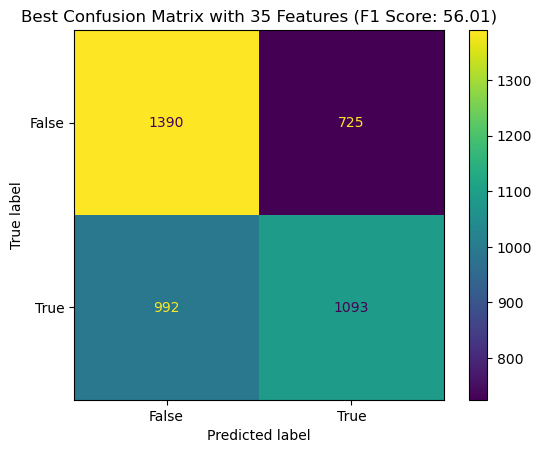

In [8]:
# Display the best confusion matrix in a new cell
print("Best Confusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=best_cm, display_labels=[False, True])
disp.plot()
plt.title(f"Best Confusion Matrix with {best_n_features} Features (F1 Score: {best_f1_score:.2f})")
plt.show()


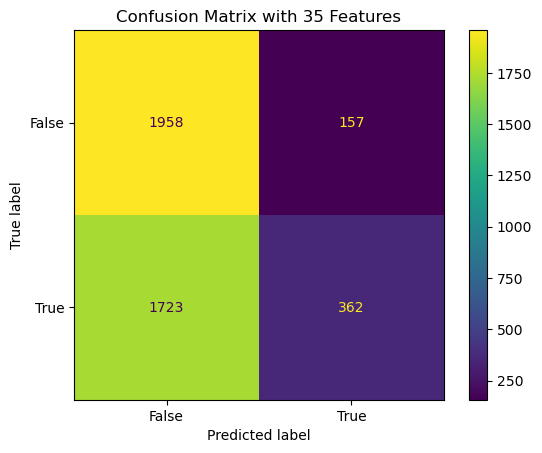

Number of Selected Features: 35
Accuracy: 55.23809523809524
Precision: 69.7495183044316
Recall: 17.3621103117506
F1 Score: 27.80337941628264



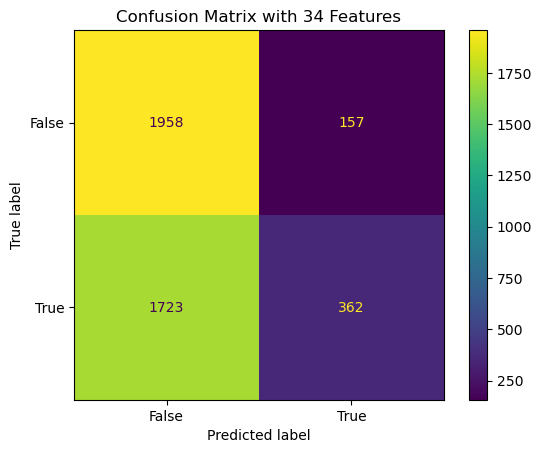

Number of Selected Features: 34
Accuracy: 55.23809523809524
Precision: 69.7495183044316
Recall: 17.3621103117506
F1 Score: 27.80337941628264



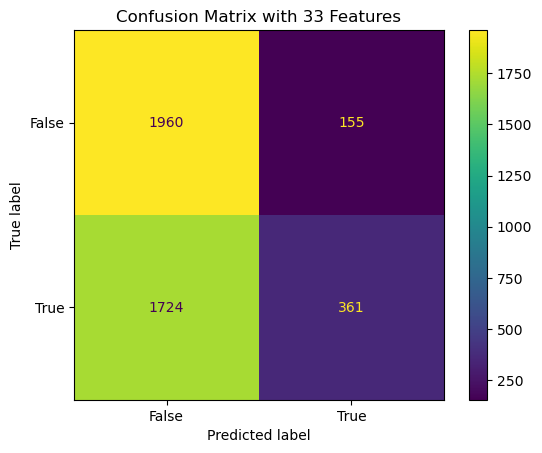

Number of Selected Features: 33
Accuracy: 55.26190476190476
Precision: 69.96124031007753
Recall: 17.314148681055155
F1 Score: 27.758554402153017



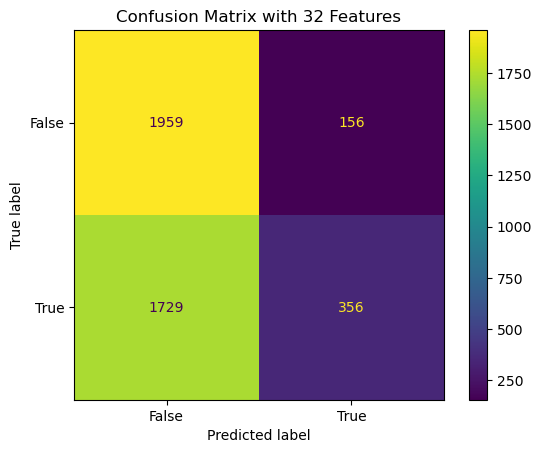

Number of Selected Features: 32
Accuracy: 55.11904761904762
Precision: 69.53125
Recall: 17.074340527577938
F1 Score: 27.416249518675397



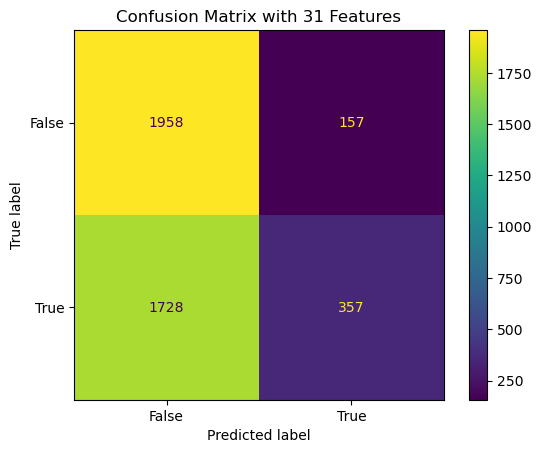

Number of Selected Features: 31
Accuracy: 55.11904761904762
Precision: 69.45525291828794
Recall: 17.12230215827338
F1 Score: 27.47210465563678



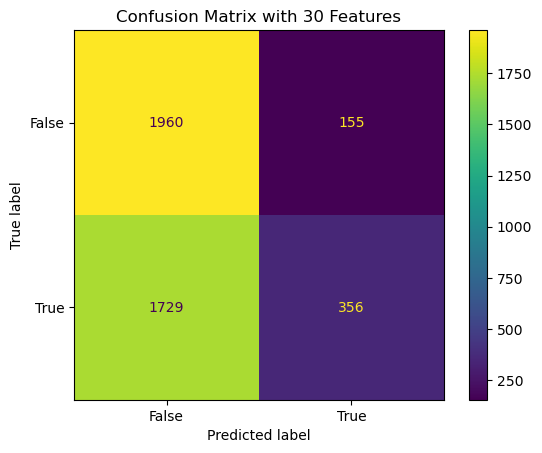

Number of Selected Features: 30
Accuracy: 55.14285714285714
Precision: 69.66731898238747
Recall: 17.074340527577938
F1 Score: 27.426810477657938



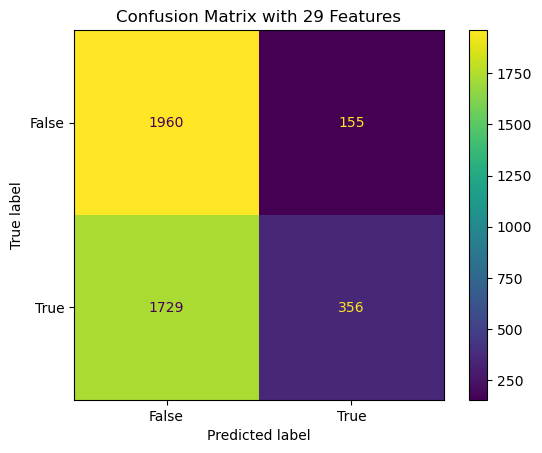

Number of Selected Features: 29
Accuracy: 55.14285714285714
Precision: 69.66731898238747
Recall: 17.074340527577938
F1 Score: 27.426810477657938



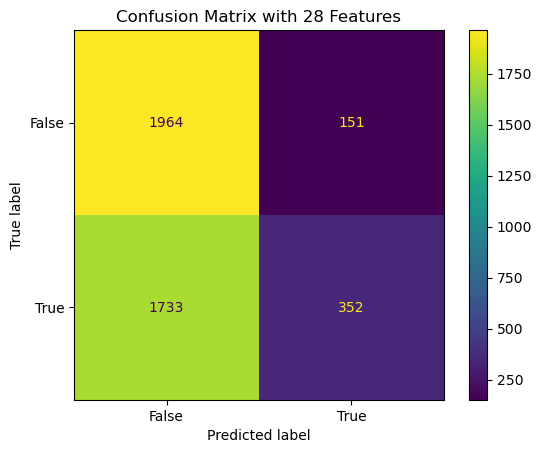

Number of Selected Features: 28
Accuracy: 55.14285714285714
Precision: 69.98011928429423
Recall: 16.882494004796165
F1 Score: 27.202472952086552



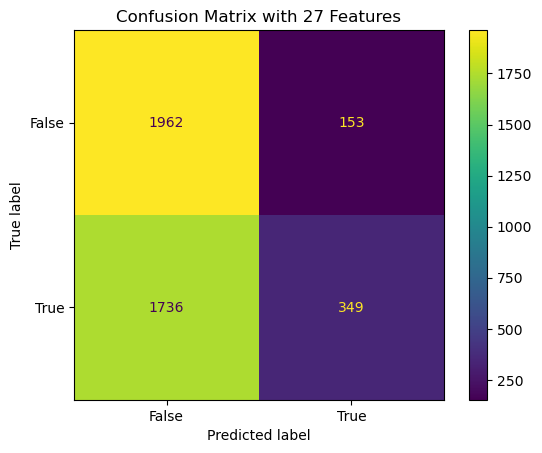

Number of Selected Features: 27
Accuracy: 55.02380952380952
Precision: 69.52191235059762
Recall: 16.73860911270983
F1 Score: 26.981059141863163



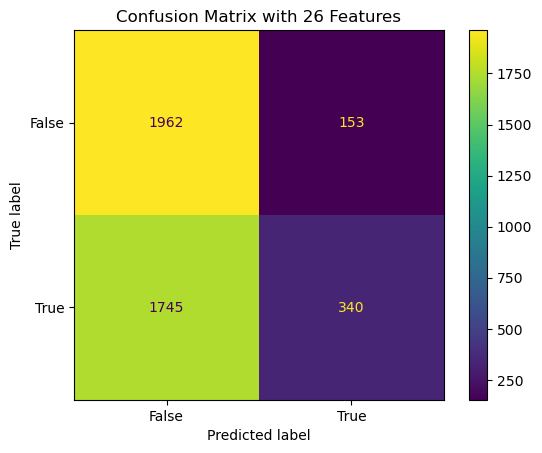

Number of Selected Features: 26
Accuracy: 54.80952380952381
Precision: 68.96551724137932
Recall: 16.30695443645084
F1 Score: 26.377036462373937



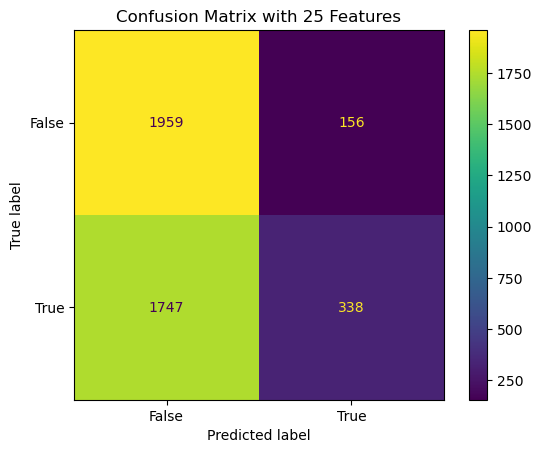

Number of Selected Features: 25
Accuracy: 54.69047619047619
Precision: 68.42105263157895
Recall: 16.211031175059954
F1 Score: 26.21170996510276



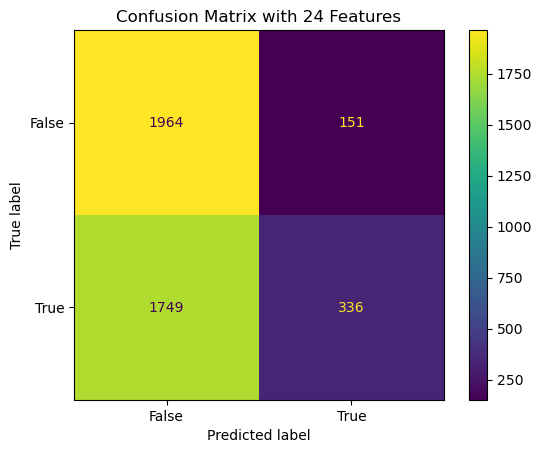

Number of Selected Features: 24
Accuracy: 54.761904761904766
Precision: 68.99383983572895
Recall: 16.115107913669064
F1 Score: 26.127527216174183



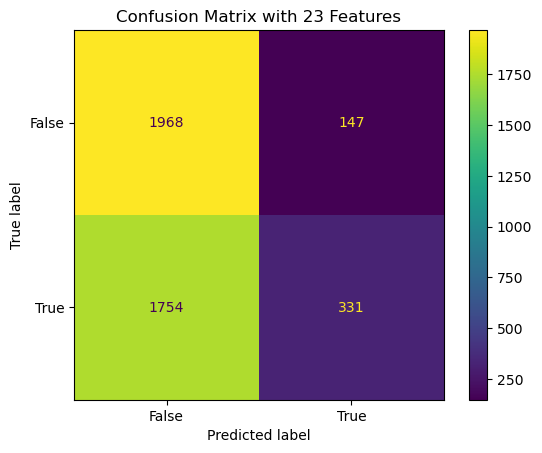

Number of Selected Features: 23
Accuracy: 54.73809523809524
Precision: 69.24686192468619
Recall: 15.875299760191847
F1 Score: 25.829106515801797



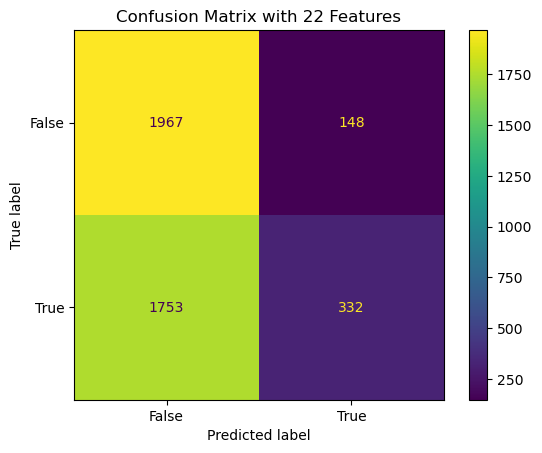

Number of Selected Features: 22
Accuracy: 54.73809523809524
Precision: 69.16666666666667
Recall: 15.923261390887289
F1 Score: 25.88693957115009



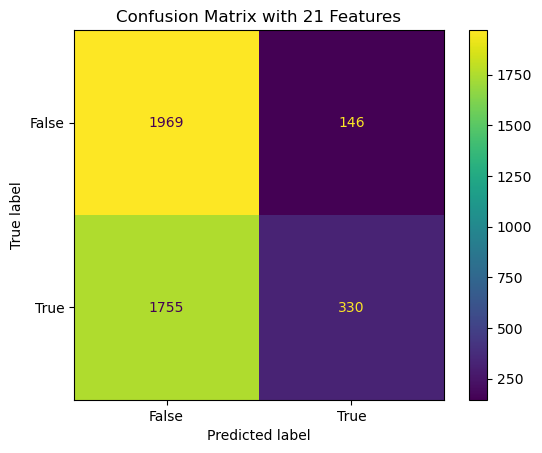

Number of Selected Features: 21
Accuracy: 54.73809523809524
Precision: 69.32773109243698
Recall: 15.827338129496402
F1 Score: 25.771183131589222



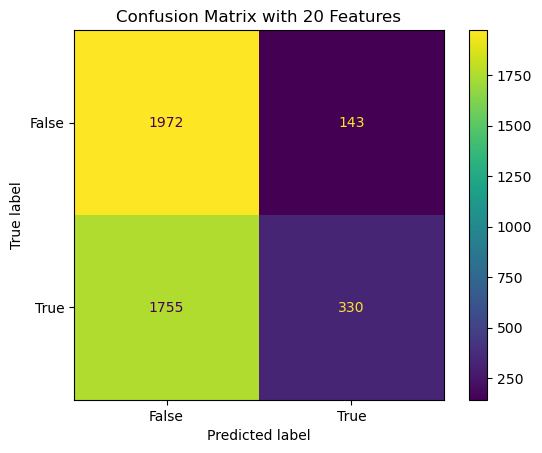

Number of Selected Features: 20
Accuracy: 54.80952380952381
Precision: 69.76744186046511
Recall: 15.827338129496402
F1 Score: 25.80140734949179



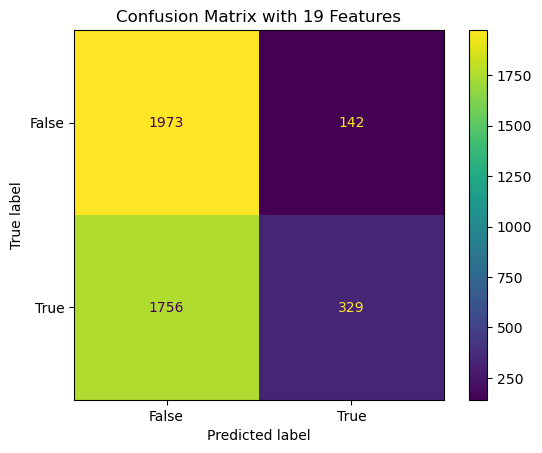

Number of Selected Features: 19
Accuracy: 54.80952380952381
Precision: 69.85138004246284
Recall: 15.779376498800959
F1 Score: 25.7433489827856



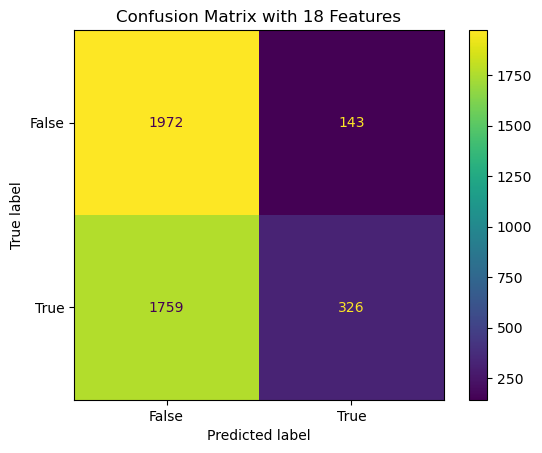

Number of Selected Features: 18
Accuracy: 54.714285714285715
Precision: 69.5095948827292
Recall: 15.635491606714627
F1 Score: 25.528582615505087



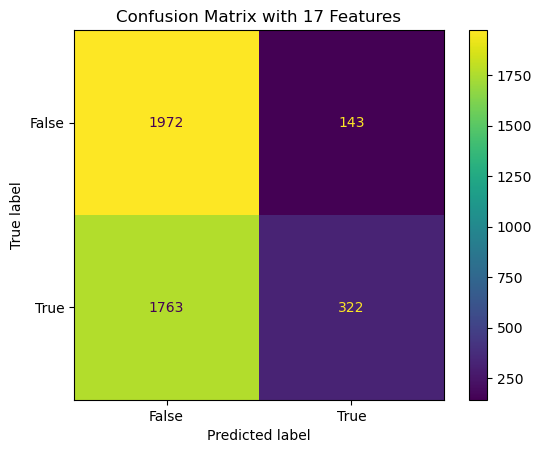

Number of Selected Features: 17
Accuracy: 54.61904761904762
Precision: 69.24731182795699
Recall: 15.443645083932852
F1 Score: 25.254901960784316



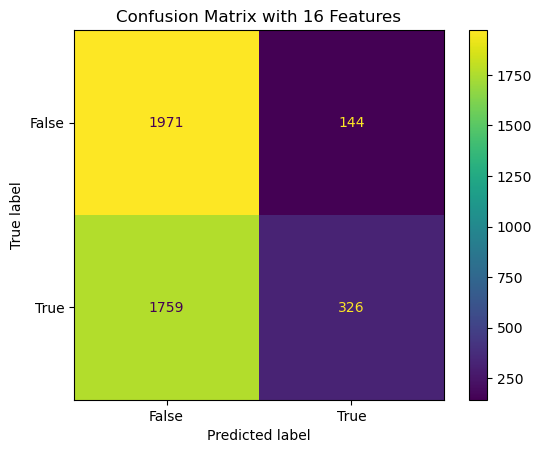

Number of Selected Features: 16
Accuracy: 54.69047619047619
Precision: 69.36170212765957
Recall: 15.635491606714627
F1 Score: 25.51859099804305



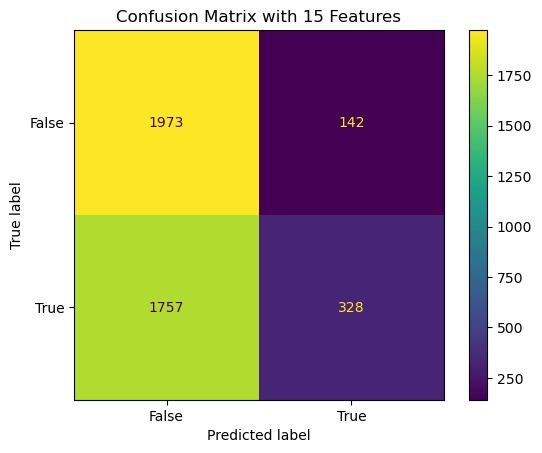

Number of Selected Features: 15
Accuracy: 54.785714285714285
Precision: 69.7872340425532
Recall: 15.731414868105514
F1 Score: 25.675146771037184



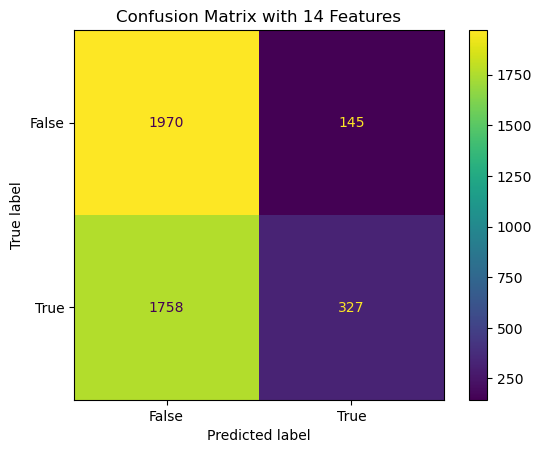

Number of Selected Features: 14
Accuracy: 54.69047619047619
Precision: 69.27966101694916
Recall: 15.683453237410072
F1 Score: 25.576847868596015



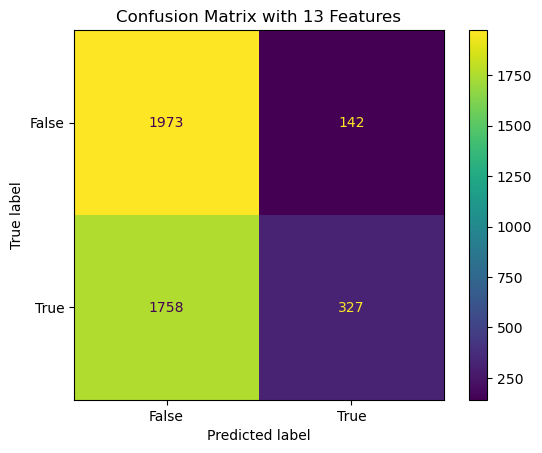

Number of Selected Features: 13
Accuracy: 54.761904761904766
Precision: 69.7228144989339
Recall: 15.683453237410072
F1 Score: 25.606891151135475



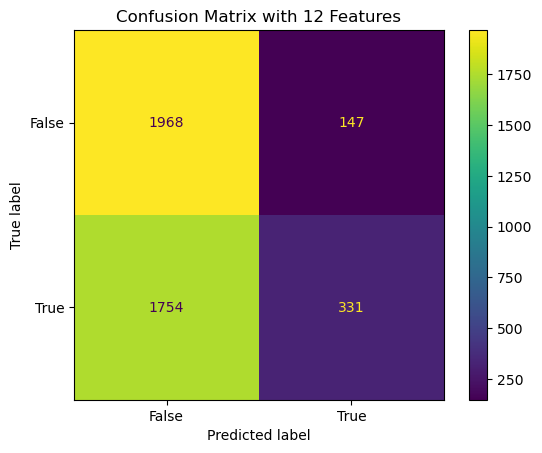

Number of Selected Features: 12
Accuracy: 54.73809523809524
Precision: 69.24686192468619
Recall: 15.875299760191847
F1 Score: 25.829106515801797



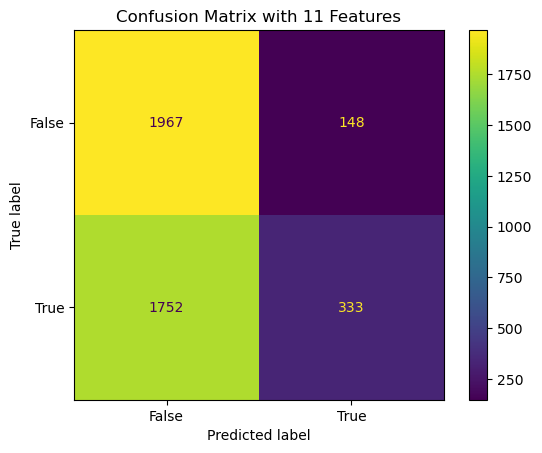

Number of Selected Features: 11
Accuracy: 54.761904761904766
Precision: 69.23076923076923
Recall: 15.971223021582734
F1 Score: 25.954793452844893



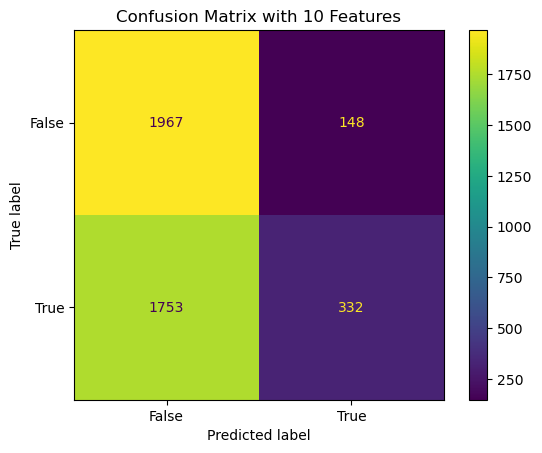

Number of Selected Features: 10
Accuracy: 54.73809523809524
Precision: 69.16666666666667
Recall: 15.923261390887289
F1 Score: 25.88693957115009



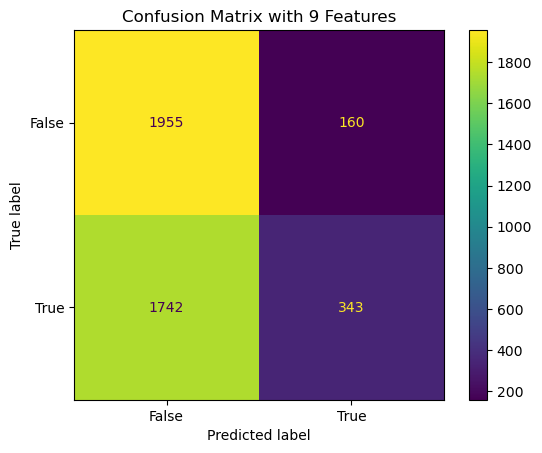

Number of Selected Features: 9
Accuracy: 54.714285714285715
Precision: 68.19085487077535
Recall: 16.45083932853717
F1 Score: 26.50695517774343



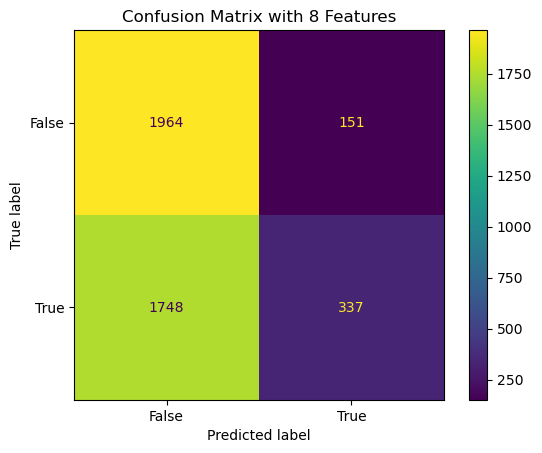

Number of Selected Features: 8
Accuracy: 54.785714285714285
Precision: 69.05737704918032
Recall: 16.163069544364507
F1 Score: 26.19510299261562



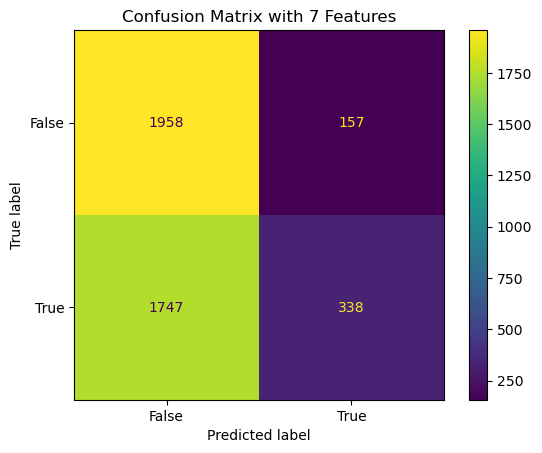

Number of Selected Features: 7
Accuracy: 54.666666666666664
Precision: 68.28282828282828
Recall: 16.211031175059954
F1 Score: 26.2015503875969



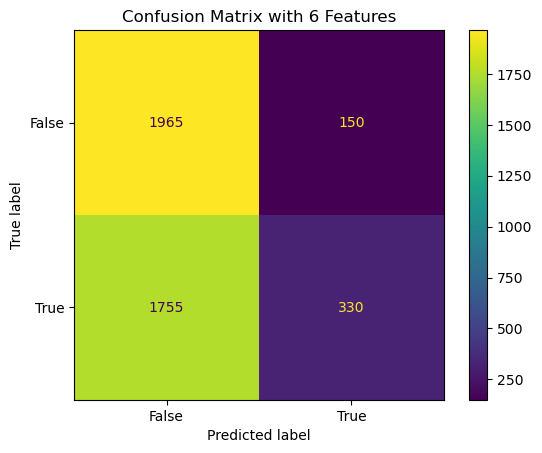

Number of Selected Features: 6
Accuracy: 54.64285714285714
Precision: 68.75
Recall: 15.827338129496402
F1 Score: 25.730994152046783



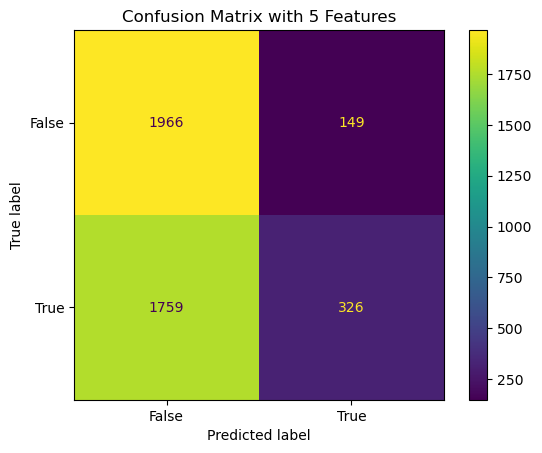

Number of Selected Features: 5
Accuracy: 54.57142857142857
Precision: 68.63157894736842
Recall: 15.635491606714627
F1 Score: 25.46875



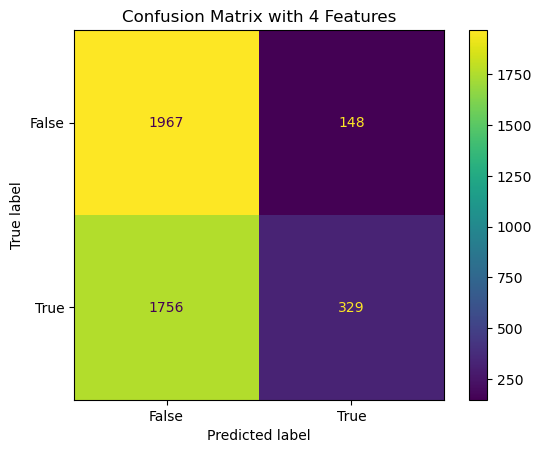

Number of Selected Features: 4
Accuracy: 54.666666666666664
Precision: 68.9727463312369
Recall: 15.779376498800959
F1 Score: 25.683060109289617



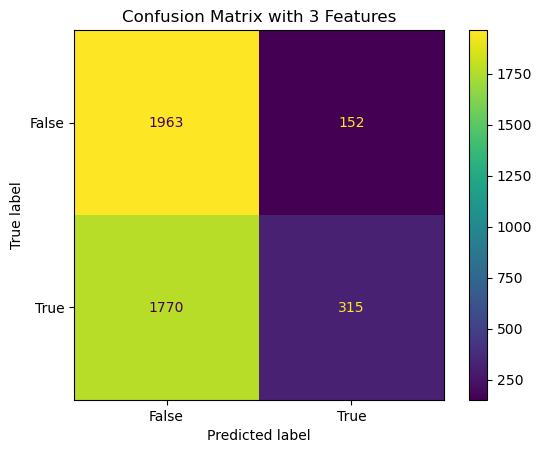

Number of Selected Features: 3
Accuracy: 54.23809523809524
Precision: 67.45182012847965
Recall: 15.107913669064748
F1 Score: 24.68652037617555



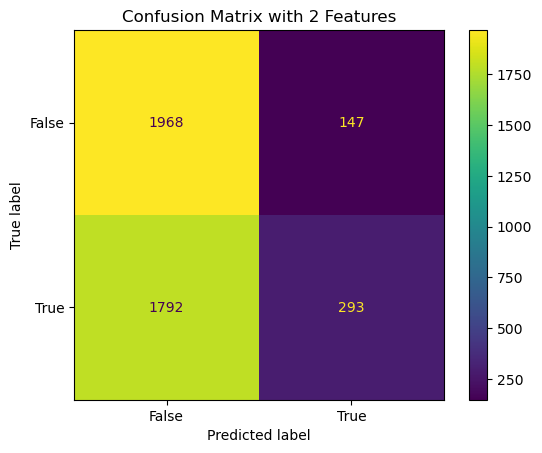

Number of Selected Features: 2
Accuracy: 53.833333333333336
Precision: 66.5909090909091
Recall: 14.05275779376499
F1 Score: 23.207920792079207



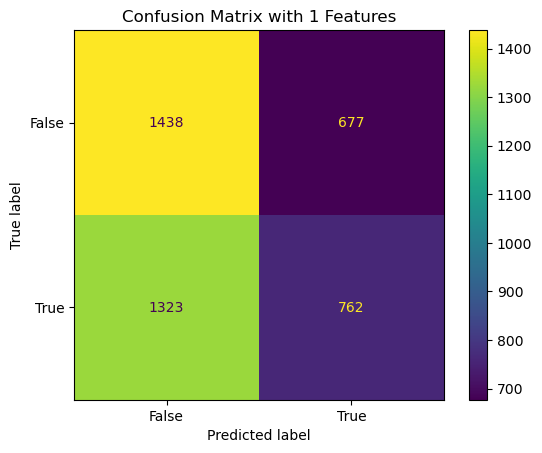

Number of Selected Features: 1
Accuracy: 52.38095238095239
Precision: 52.95343988881167
Recall: 36.54676258992806
F1 Score: 43.24631101021566



In [9]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import os

# Set working directory
os.chdir('/Users/rimpa/Downloads/masters_project')

# Read JSON file
df = pd.read_json('senti_df_norm.json', orient='records')

# Train and test set
X = df.drop(['Label'], axis=1)
y = df['Label']
train_size = 0.8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)

n_features_range = range(X.shape[1], 0, -1)

results = []

# Variables to store the best model's results
best_f1_score = 0
best_cm = None
best_n_features = 0

for n_features_to_select in n_features_range:
    regressor = RandomForestRegressor(n_estimators=100, max_depth=10)
    rfe = RFE(regressor, n_features_to_select=n_features_to_select)
    rfe.fit(X_train, y_train)

    X_train_transformed = rfe.transform(X_train)
    X_test_transformed = rfe.transform(X_test)

    # Gaussian Naive Bayes
    gnb1 = GaussianNB()
    gnb1.fit(X_train_transformed, y_train)
    predictions = gnb1.predict(X_test_transformed)

    # Evaluate
    gnb_accuracy = accuracy_score(y_test, predictions) * 100
    gnb_precision = precision_score(y_test, predictions) * 100
    gnb_recall = recall_score(y_test, predictions) * 100
    gnb_f1_score = f1_score(y_test, predictions) * 100

    # Display current confusion matrix
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
    disp.plot()
    plt.title(f"Confusion Matrix with {n_features_to_select} Features")
    plt.show()

    print(f"Number of Selected Features: {n_features_to_select}")
    print("Accuracy:", gnb_accuracy)
    print("Precision:", gnb_precision)
    print("Recall:", gnb_recall)
    print("F1 Score:", gnb_f1_score)
    print()
    
    result = {
        "n_features": n_features_to_select,
        "accuracy": gnb_accuracy,
        "precision": gnb_precision,
        "recall": gnb_recall,
        "f1_score": gnb_f1_score
    }

    results.append(result)    

    # Check if the current F1 score is the best
    if gnb_f1_score > best_f1_score:
        best_f1_score = gnb_f1_score
        best_cm = cm
        best_n_features = n_features_to_select

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Save the results in an Excel file
results_df.to_excel('results_SentiWordNet_ML_NB.xlsx', index=False)

Best Confusion Matrix:


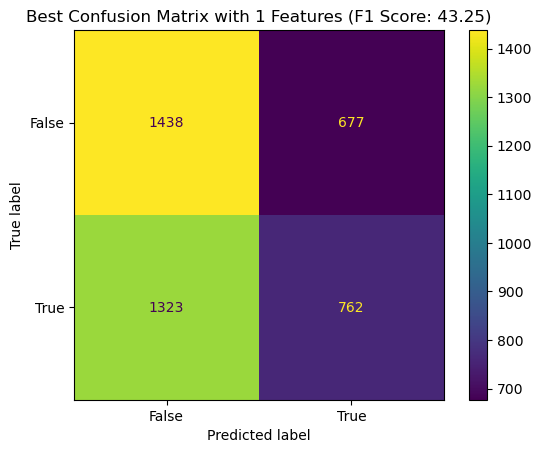

In [10]:
# Display the best confusion matrix in a new cell
print("Best Confusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=best_cm, display_labels=[False, True])
disp.plot()
plt.title(f"Best Confusion Matrix with {best_n_features} Features (F1 Score: {best_f1_score:.2f})")
plt.show()

### Training models with VADER and SentiWordNet combined feature set

In [11]:
from sklearn.naive_bayes import GaussianNB
import os
import json
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

# Set working directory
os.chdir('/Users/rimpa/Downloads/masters_project')

# Load df
df_senti = pd.read_json('senti_df_norm.json')
df_VADER = pd.read_json('VADER_df_norm.json')

# Select features VADER
selected_features = ['positive_score', 'neutral_score', 'polarity_shifters', 'intensity_modifiers', 'negations',
                     'emoticons']
df_VADER_selected = df_VADER[selected_features]

# Concatenate
sentiVADER_df = pd.concat([df_senti, df_VADER_selected], axis=1)

# Dataframe to Json 
sentiVADER_df.to_json('sentiVADER_df.json', orient='records')

sentiVADER_df.head()

Label  Number_of_words  Number_of_sentences  Number_of_caps  \
0      0         0.002822             0.010152        0.001144   
1      0         0.020106             0.015228        0.002859   
2      0         0.014109             0.030457        0.003431   
3      0         0.010582             0.020305        0.004002   
4      0         0.019400             0.015228        0.002859   

   Number_of_punctuation  Number_of_nouns  Number_of_verbs  \
0               0.005357         0.005908         0.009615   
1               0.012500         0.026588         0.025000   
2               0.017857         0.013294         0.023077   
3               0.008929         0.013294         0.019231   
4               0.010714         0.023634         0.019231   

   Number_of_adjectives  Number_of_adverbs  Average_word_length  ...  \
0              0.007663           0.009174             0.123009  ...   
1              0.038314           0.022936             0.200208  ...   
2              0.030651           0.022936             0.092044  ...   
3              0.011494           0.018349             0.104161  ...   
4              0.022989           0.022936             0.102568  ...   

    pos_875  neg_875  pos_1  neg_1  positive_score  neutral_score  \
0  0.000000      0.0      0    0.0           0.217          0.783   
1  0.000000      0.0      0    0.0           0.137          0.803   
2  0.090909      0.0      0    0.0           0.165          0.782   
3  0.000000      0.0      0    0.0           0.099          0.901   
4  0.000000      0.0      0    0.0           0.116          0.884   

   polarity_shifters  intensity_modifiers  negations  emoticons  
0           0.000000             0.012987   0.000000        0.0  
1           0.055556             0.012987   0.040816        0.0  
2           0.055556             0.038961   0.061224        0.0  
3           0.000000             0.038961   0.020408        0.0  
4           0.000000             0.012987   0.000000        0.0  

[5 rows x 42 columns]

Number of Selected Features: 41
SVM Accuracy: 58.97619047619047
SVM Precision: 59.64818763326226
SVM Recall: 53.669064748201436
SVM F1 Score: 56.50088361524867


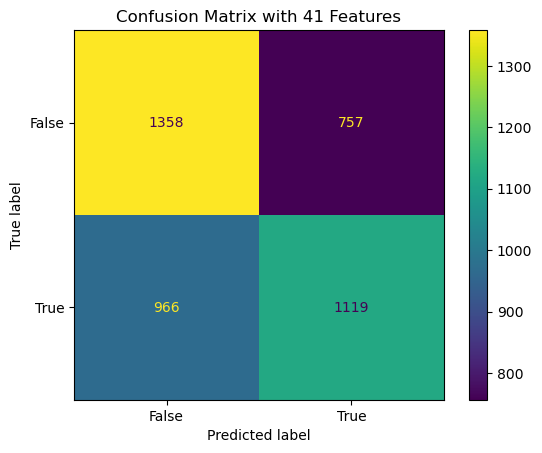

Number of Selected Features: 40
SVM Accuracy: 58.97619047619047
SVM Precision: 59.64818763326226
SVM Recall: 53.669064748201436
SVM F1 Score: 56.50088361524867


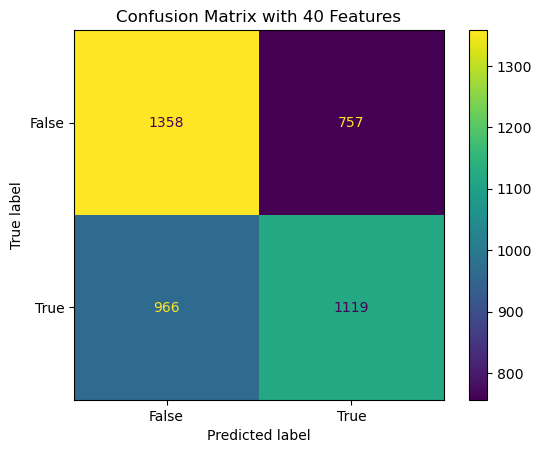

Number of Selected Features: 39
SVM Accuracy: 58.833333333333336
SVM Precision: 60.11363636363637
SVM Recall: 50.743405275779374
SVM F1 Score: 55.032509752925876


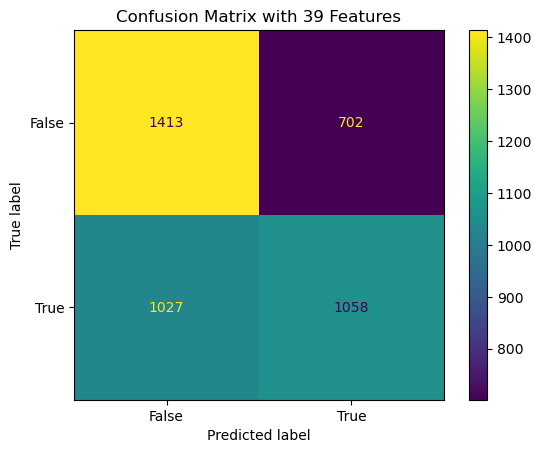

Number of Selected Features: 38
SVM Accuracy: 58.857142857142854
SVM Precision: 60.1593625498008
SVM Recall: 50.69544364508394
SVM F1 Score: 55.02342529932328


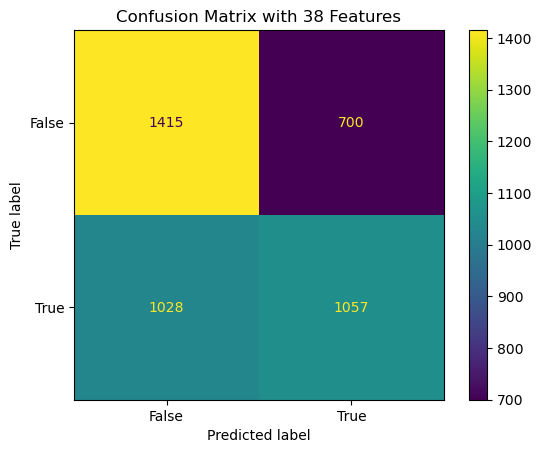

Number of Selected Features: 37
SVM Accuracy: 58.785714285714285
SVM Precision: 60.091220068415055
SVM Recall: 50.55155875299761
SVM F1 Score: 54.9101328470956


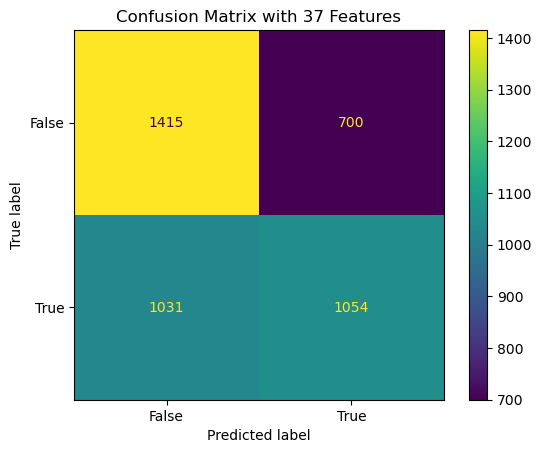

Number of Selected Features: 36
SVM Accuracy: 58.785714285714285
SVM Precision: 60.1027397260274
SVM Recall: 50.50359712230216
SVM F1 Score: 54.88663017982799


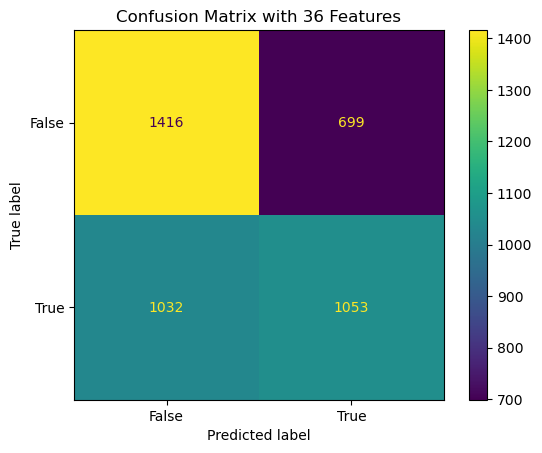

Number of Selected Features: 35
SVM Accuracy: 58.61904761904761
SVM Precision: 60.24808033077378
SVM Recall: 48.92086330935252
SVM F1 Score: 53.99682371625198


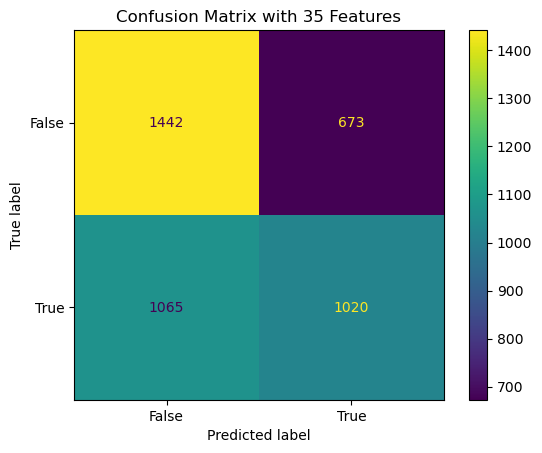

Number of Selected Features: 34
SVM Accuracy: 58.5952380952381
SVM Precision: 60.2125147579693
SVM Recall: 48.92086330935252
SVM F1 Score: 53.98253506218577


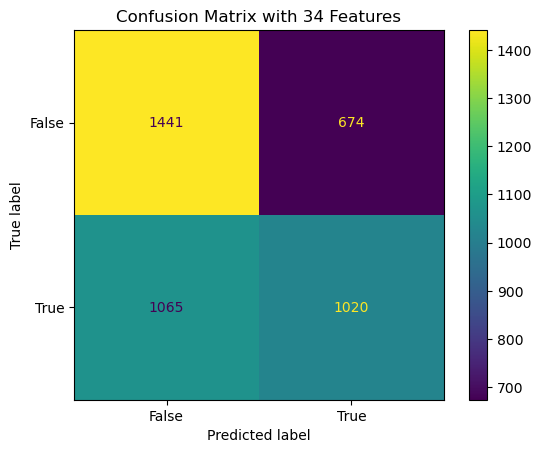

Number of Selected Features: 33
SVM Accuracy: 58.57142857142858
SVM Precision: 60.201064458900056
SVM Recall: 48.82494004796163
SVM F1 Score: 53.91949152542372


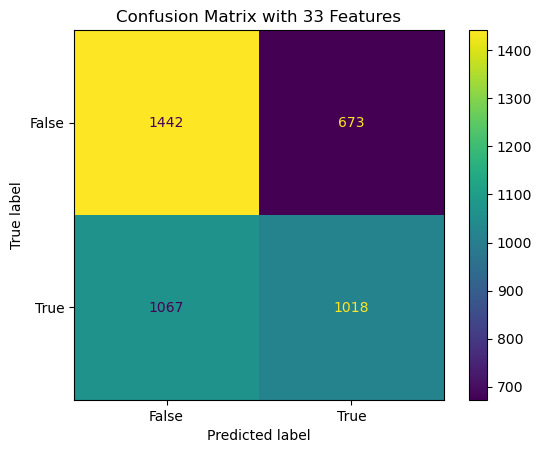

Number of Selected Features: 32
SVM Accuracy: 58.57142857142858
SVM Precision: 60.18901358535145
SVM Recall: 48.87290167865708
SVM F1 Score: 53.943885653785074


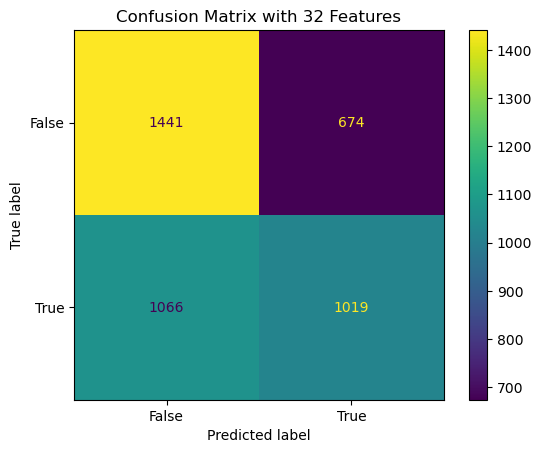

Number of Selected Features: 31
SVM Accuracy: 58.452380952380956
SVM Precision: 60.21634615384615
SVM Recall: 48.05755395683453
SVM F1 Score: 53.4542544678581


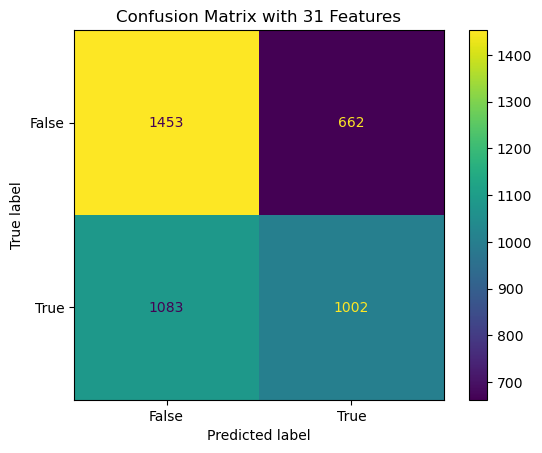

Number of Selected Features: 30
SVM Accuracy: 58.02380952380952
SVM Precision: 59.52662721893491
SVM Recall: 48.249400479616305
SVM F1 Score: 53.29801324503312


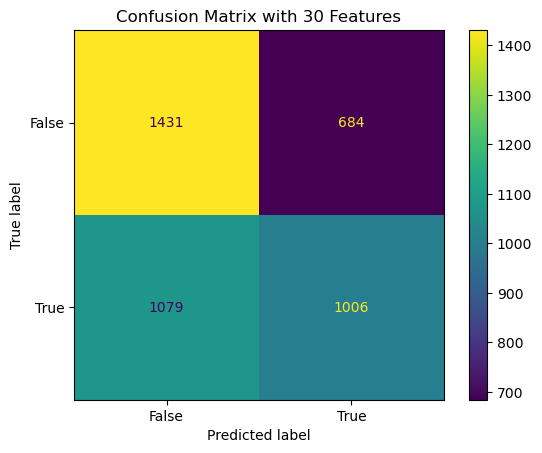

Number of Selected Features: 29
SVM Accuracy: 58.04761904761905
SVM Precision: 59.56187092954411
SVM Recall: 48.249400479616305
SVM F1 Score: 53.31213566507683


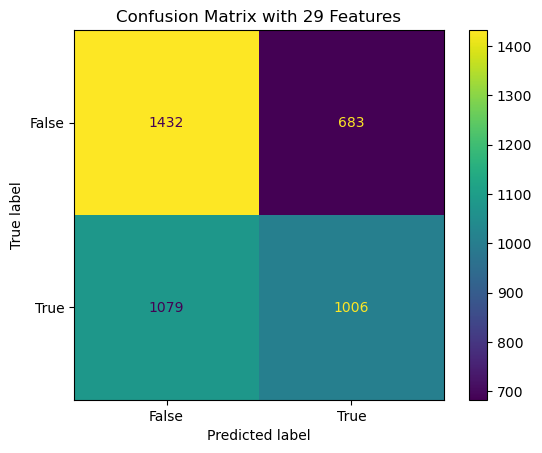

Number of Selected Features: 28
SVM Accuracy: 57.97619047619048
SVM Precision: 59.47867298578199
SVM Recall: 48.15347721822542
SVM F1 Score: 53.22024913861648


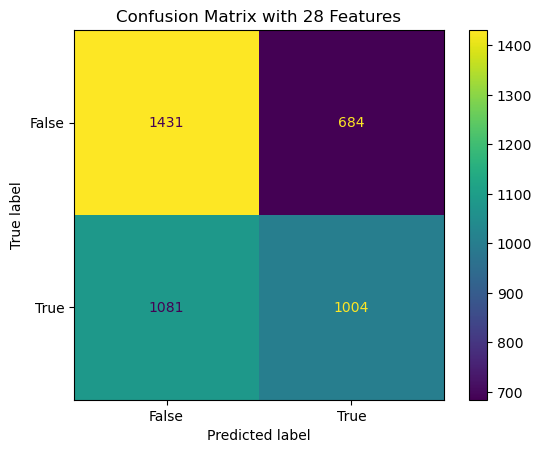

Number of Selected Features: 27
SVM Accuracy: 58.07142857142858
SVM Precision: 59.4847775175644
SVM Recall: 48.729016786570746
SVM F1 Score: 53.572370155549685


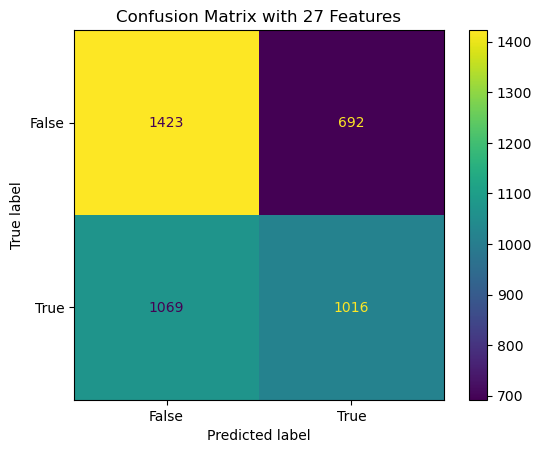

Number of Selected Features: 26
SVM Accuracy: 58.214285714285715
SVM Precision: 59.60419091967404
SVM Recall: 49.11270983213429
SVM F1 Score: 53.85222193005521


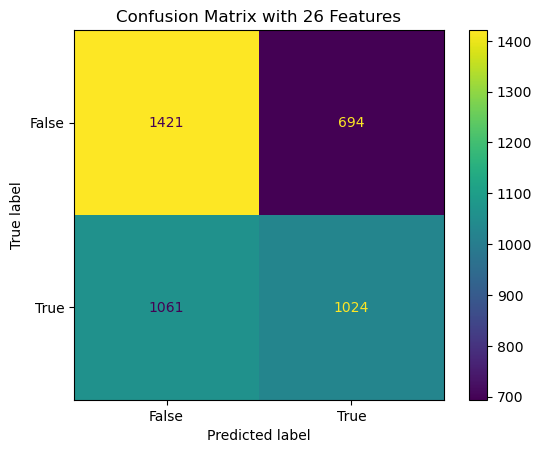

Number of Selected Features: 25
SVM Accuracy: 58.238095238095234
SVM Precision: 59.62769051774287
SVM Recall: 49.16067146282973
SVM F1 Score: 53.89064143007361


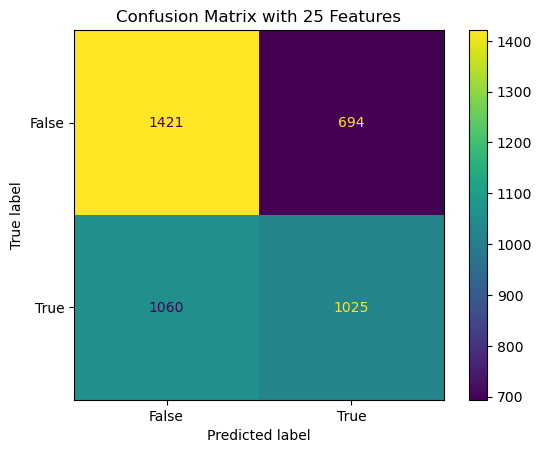

Number of Selected Features: 24
SVM Accuracy: 58.19047619047619
SVM Precision: 59.58066394874781
SVM Recall: 49.06474820143885
SVM F1 Score: 53.813782219884274


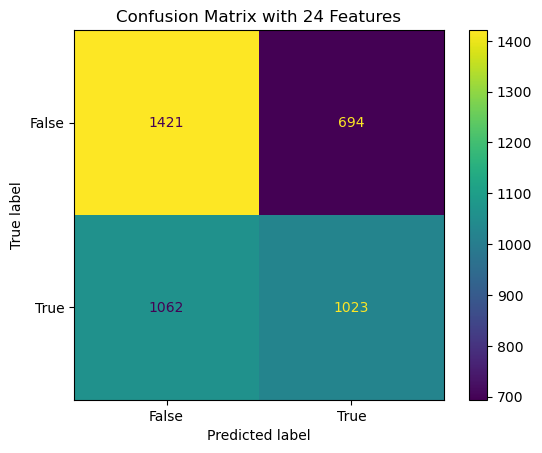

Number of Selected Features: 23
SVM Accuracy: 57.904761904761905
SVM Precision: 59.199071387115495
SVM Recall: 48.92086330935252
SVM F1 Score: 53.57142857142857


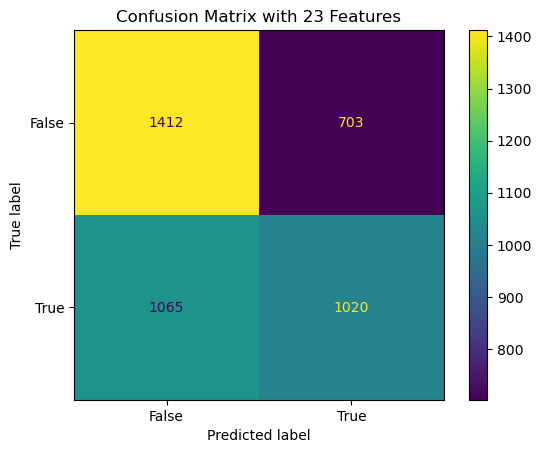

Number of Selected Features: 22
SVM Accuracy: 58.11904761904761
SVM Precision: 59.4988344988345
SVM Recall: 48.96882494004796
SVM F1 Score: 53.72270455143383


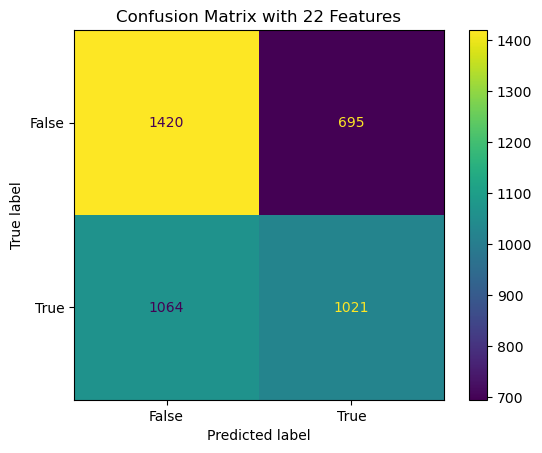

Number of Selected Features: 21
SVM Accuracy: 58.07142857142858
SVM Precision: 59.375
SVM Recall: 49.20863309352518
SVM F1 Score: 53.81589299763966


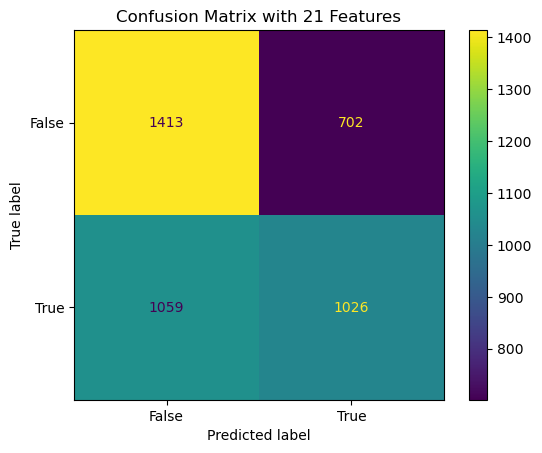

Number of Selected Features: 20
SVM Accuracy: 58.11904761904761
SVM Precision: 59.454756380510446
SVM Recall: 49.16067146282973
SVM F1 Score: 53.81990023628249


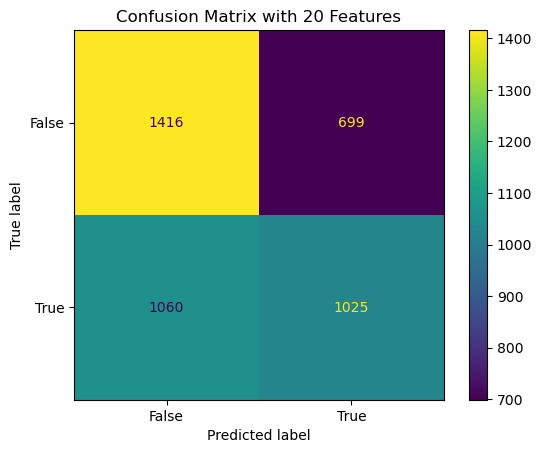

Number of Selected Features: 19
SVM Accuracy: 57.452380952380956
SVM Precision: 59.687906371911566
SVM Recall: 44.02877697841727
SVM F1 Score: 50.676235164228544


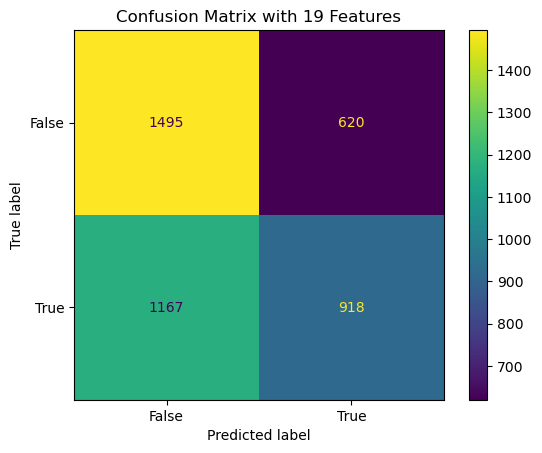

Number of Selected Features: 18
SVM Accuracy: 57.35714285714286
SVM Precision: 59.54545454545455
SVM Recall: 43.98081534772182
SVM F1 Score: 50.59310344827587


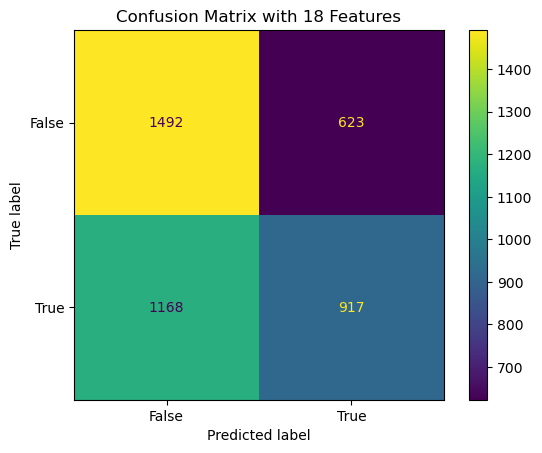

Number of Selected Features: 17
SVM Accuracy: 57.166666666666664
SVM Precision: 59.166666666666664
SVM Recall: 44.26858513189448
SVM F1 Score: 50.644718792866946


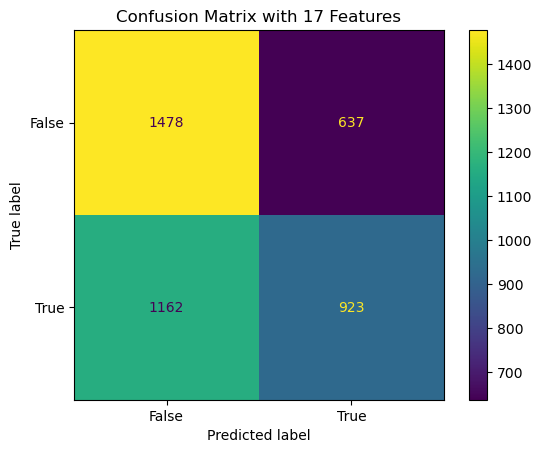

Number of Selected Features: 16
SVM Accuracy: 57.07142857142857
SVM Precision: 59.45040214477212
SVM Recall: 42.541966426858515
SVM F1 Score: 49.59463237349735


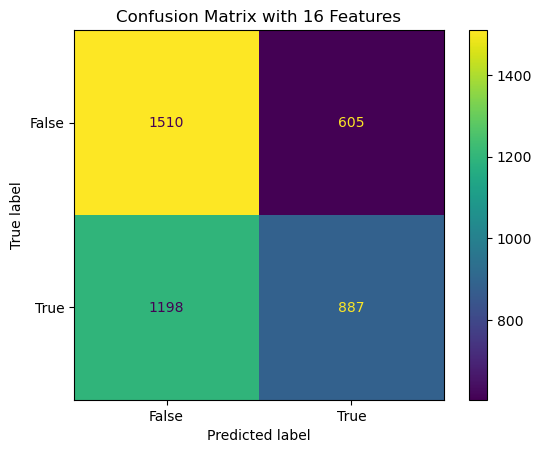

Number of Selected Features: 15
SVM Accuracy: 56.904761904761905
SVM Precision: 59.185036740146955
SVM Recall: 42.49400479616307
SVM F1 Score: 49.46957007258515


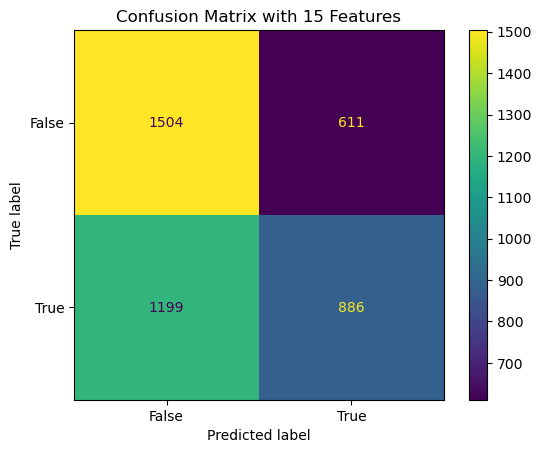

Number of Selected Features: 14
SVM Accuracy: 56.88095238095238
SVM Precision: 59.26928281461434
SVM Recall: 42.014388489208635
SVM F1 Score: 49.172046028627555


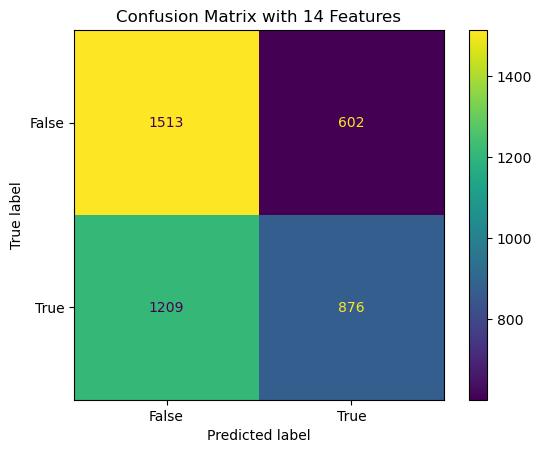

Number of Selected Features: 13
SVM Accuracy: 56.80952380952381
SVM Precision: 59.57597173144876
SVM Recall: 40.431654676258994
SVM F1 Score: 48.17142857142858


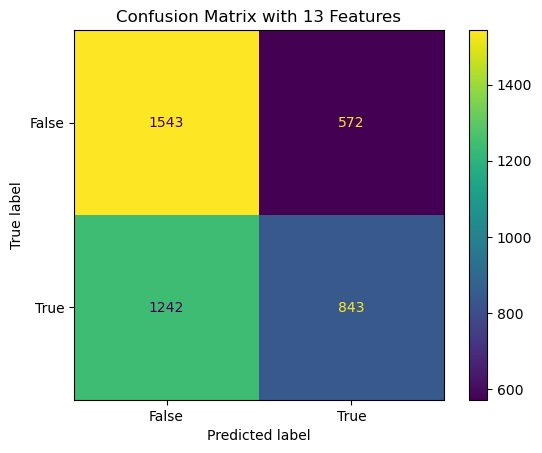

Number of Selected Features: 12
SVM Accuracy: 56.88095238095238
SVM Precision: 59.68882602545968
SVM Recall: 40.47961630695443
SVM F1 Score: 48.242354958559595


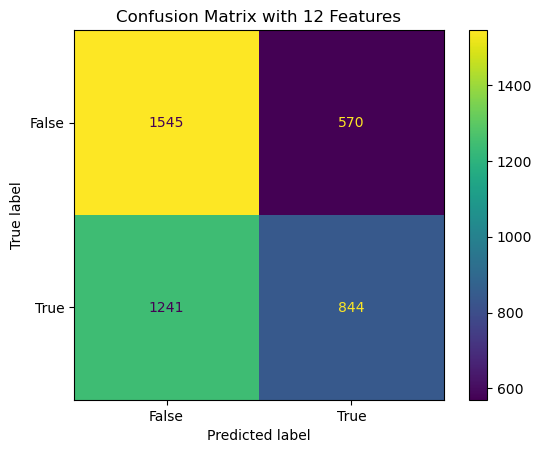

Number of Selected Features: 11
SVM Accuracy: 57.19047619047619
SVM Precision: 66.43757159221076
SVM Recall: 27.81774580335731
SVM F1 Score: 39.21568627450981


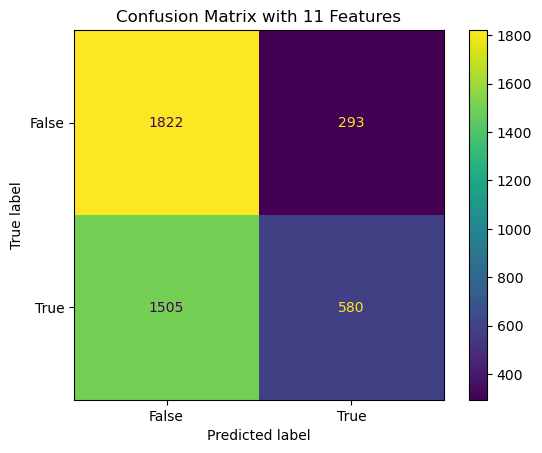

Number of Selected Features: 10
SVM Accuracy: 57.0952380952381
SVM Precision: 66.24569460390356
SVM Recall: 27.67386091127098
SVM F1 Score: 39.039242219215154


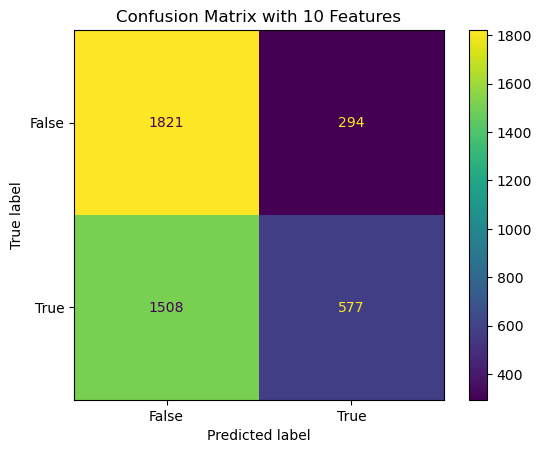

Number of Selected Features: 9
SVM Accuracy: 57.166666666666664
SVM Precision: 66.5893271461717
SVM Recall: 27.529976019184655
SVM F1 Score: 38.95486935866984


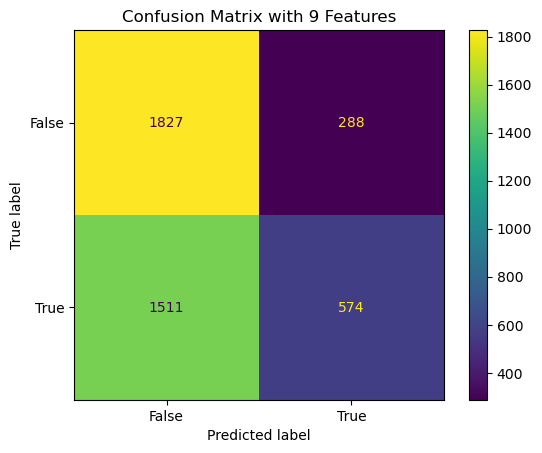

Number of Selected Features: 8
SVM Accuracy: 56.666666666666664
SVM Precision: 66.25766871165644
SVM Recall: 25.899280575539567
SVM F1 Score: 37.24137931034483


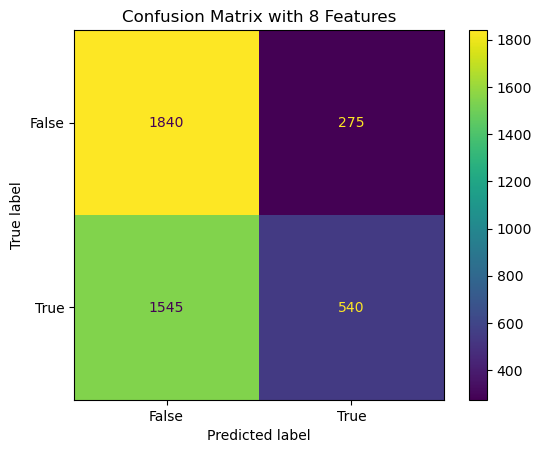

Number of Selected Features: 7
SVM Accuracy: 56.38095238095238
SVM Precision: 66.28056628056628
SVM Recall: 24.700239808153476
SVM F1 Score: 35.988819007686935


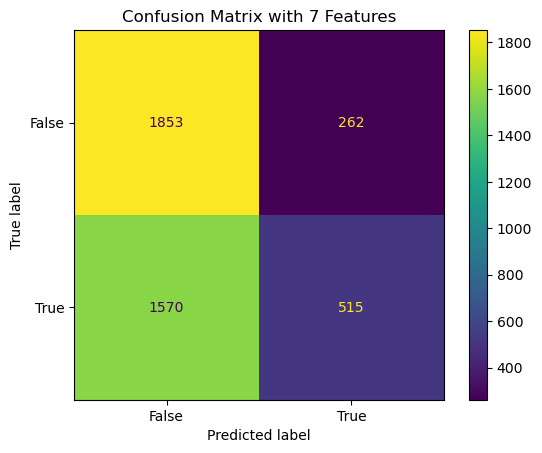

Number of Selected Features: 6
SVM Accuracy: 56.07142857142857
SVM Precision: 66.30434782608695
SVM Recall: 23.4052757793765
SVM F1 Score: 34.59766040411202


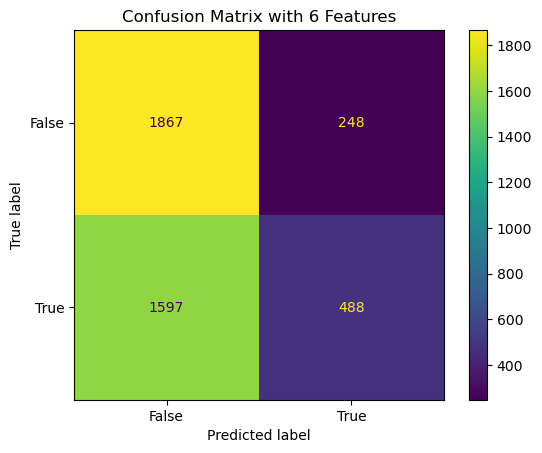

Number of Selected Features: 5
SVM Accuracy: 55.9047619047619
SVM Precision: 66.71449067431851
SVM Recall: 22.302158273381295
SVM F1 Score: 33.42918763479511


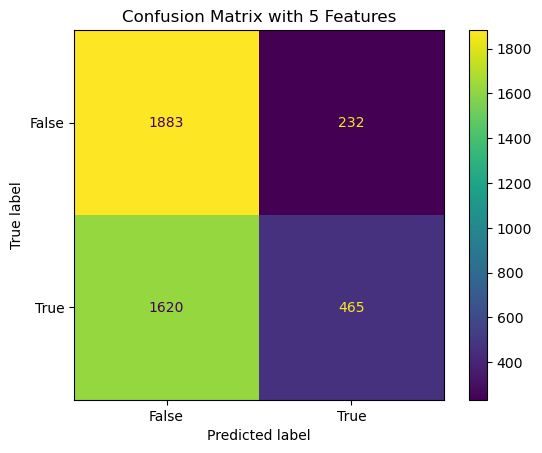

Number of Selected Features: 4
SVM Accuracy: 55.595238095238095
SVM Precision: 65.71428571428571
SVM Recall: 22.062350119904075
SVM F1 Score: 33.034111310592465


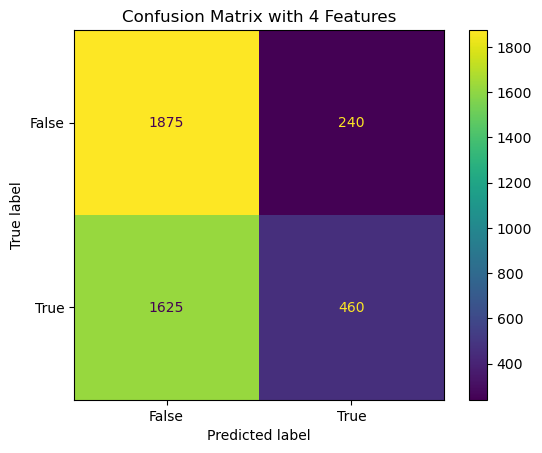

Number of Selected Features: 3
SVM Accuracy: 55.285714285714285
SVM Precision: 65.24300441826215
SVM Recall: 21.247002398081534
SVM F1 Score: 32.05499276410998


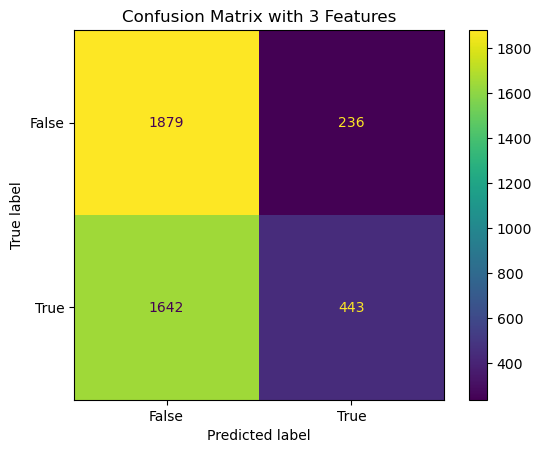

Number of Selected Features: 2
SVM Accuracy: 55.19047619047619
SVM Precision: 65.30920060331825
SVM Recall: 20.7673860911271
SVM F1 Score: 31.513828238719064


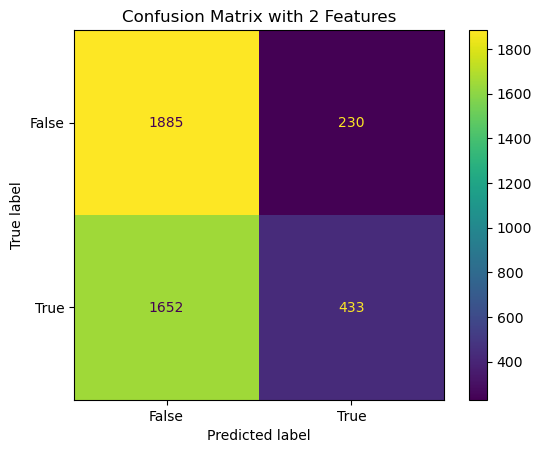

Number of Selected Features: 1
SVM Accuracy: 54.595238095238095
SVM Precision: 65.78014184397163
SVM Recall: 17.793764988009592
SVM F1 Score: 28.010570026425064


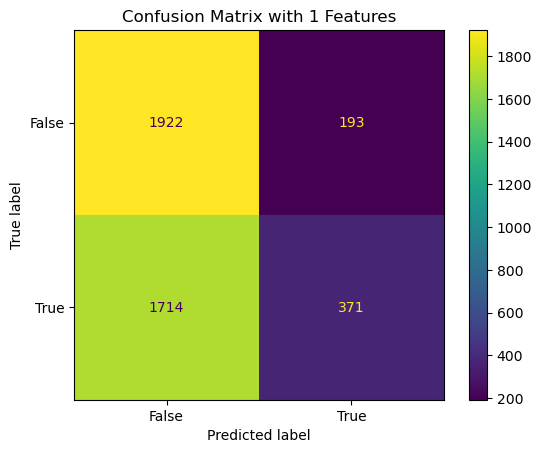

In [13]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Set working directory
os.chdir('/Users/rimpa/Downloads/masters_project')

# Read JSON file
df = pd.read_json('sentiVADER_df.json', orient='records')

# Assign X and y
X = df.drop(['Label'], axis=1)
y = df['Label']

# Training and test set
train_size = 0.8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)

n_features_range = range(X.shape[1], 0, -1)

results = []

# SVM
svm = SVC(kernel='linear')

# Variables to store the best model's results
best_f1_score = 0
best_cm = None
best_n_features = 0

for n_features_to_select in n_features_range:
    rfe = RFE(svm, n_features_to_select=n_features_to_select)
    rfe.fit(X_train, y_train)

    X_train_transformed = rfe.transform(X_train)
    X_test_transformed = rfe.transform(X_test)

    svm.fit(X_train_transformed, y_train)
    predictions = svm.predict(X_test_transformed)

    svm_accuracy = accuracy_score(y_test, predictions) * 100
    svm_precision = precision_score(y_test, predictions) * 100
    svm_recall = recall_score(y_test, predictions) * 100
    svm_f1_score = f1_score(y_test, predictions) * 100

    # Print current results
    print(f"Number of Selected Features: {n_features_to_select}")
    print(f"SVM Accuracy: {svm_accuracy}")
    print(f"SVM Precision: {svm_precision}")
    print(f"SVM Recall: {svm_recall}")
    print(f"SVM F1 Score: {svm_f1_score}")
    
    result = {
        "n_features": n_features_to_select,
        "accuracy": svm_accuracy,
        "precision": svm_precision,
        "recall": svm_recall,
        "f1_score": svm_f1_score
    }

    results.append(result)

    # Display current confusion matrix
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
    disp.plot()
    plt.title(f"Confusion Matrix with {n_features_to_select} Features")
    plt.show()

    # Check if the current F1 score is the best
    if svm_f1_score > best_f1_score:
        best_f1_score = svm_f1_score
        best_cm = cm
        best_n_features = n_features_to_select
        
# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Save the results in an Excel file
results_df.to_excel('results_sentiVADER_ML_SVC.xlsx', index=False)

Best Confusion Matrix:


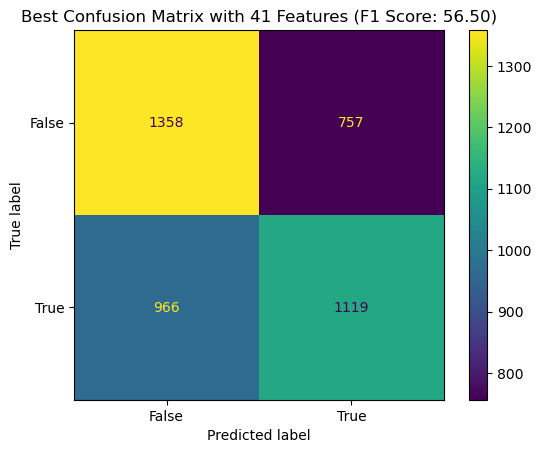

In [14]:
# Display the best confusion matrix in a new cell
print("Best Confusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=best_cm, display_labels=[False, True])
disp.plot()
plt.title(f"Best Confusion Matrix with {best_n_features} Features (F1 Score: {best_f1_score:.2f})")
plt.show()

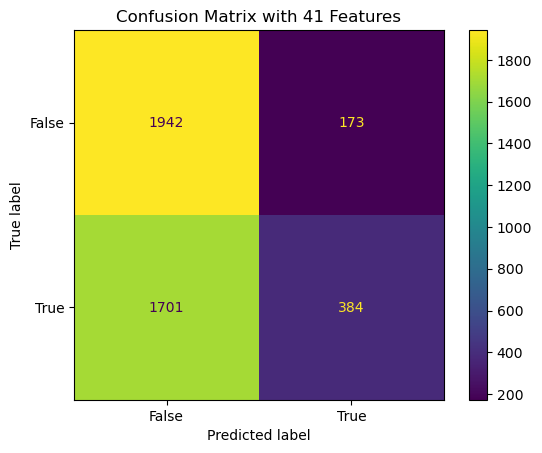

Number of Selected Features: 41
Accuracy: 55.38095238095239
Precision: 68.9407540394973
Recall: 18.41726618705036
F1 Score: 29.06888720666162



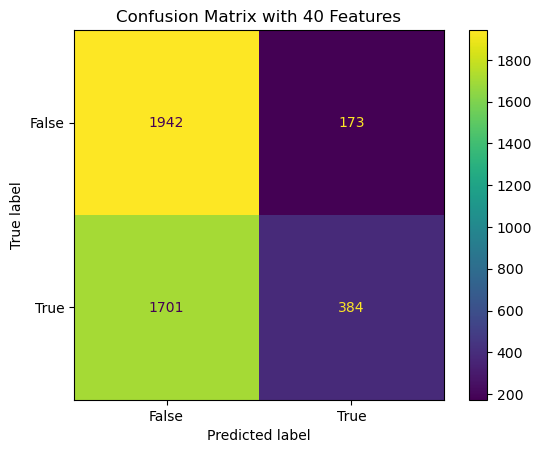

Number of Selected Features: 40
Accuracy: 55.38095238095239
Precision: 68.9407540394973
Recall: 18.41726618705036
F1 Score: 29.06888720666162



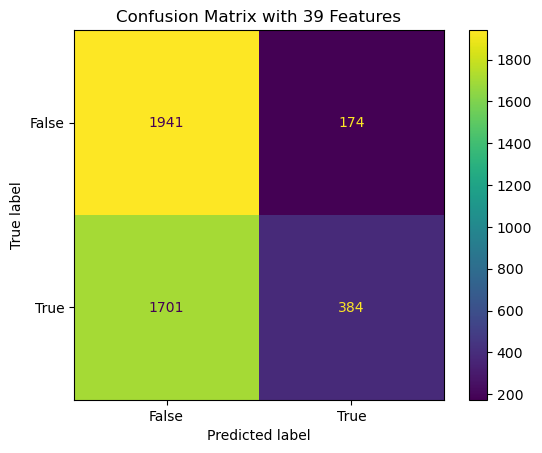

Number of Selected Features: 39
Accuracy: 55.35714285714286
Precision: 68.81720430107528
Recall: 18.41726618705036
F1 Score: 29.05788876276958



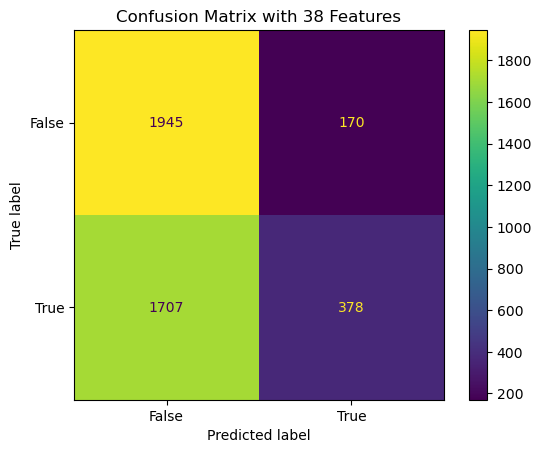

Number of Selected Features: 38
Accuracy: 55.30952380952381
Precision: 68.97810218978103
Recall: 18.1294964028777
F1 Score: 28.71249525256362



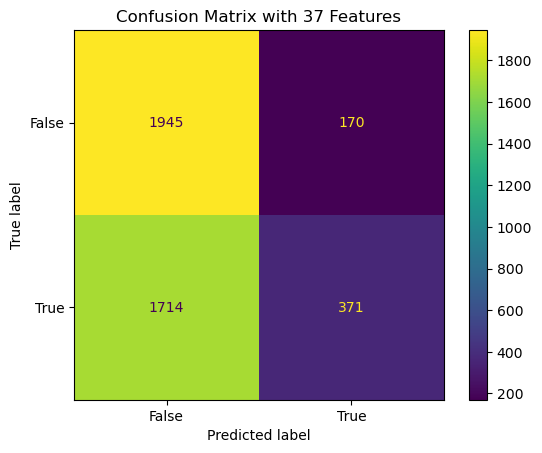

Number of Selected Features: 37
Accuracy: 55.14285714285714
Precision: 68.57670979667283
Recall: 17.793764988009592
F1 Score: 28.25590251332826



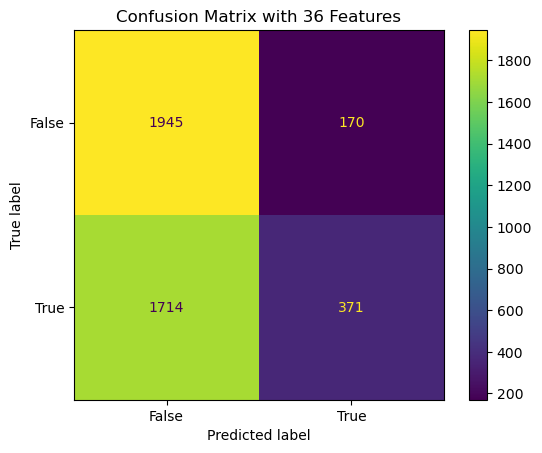

Number of Selected Features: 36
Accuracy: 55.14285714285714
Precision: 68.57670979667283
Recall: 17.793764988009592
F1 Score: 28.25590251332826



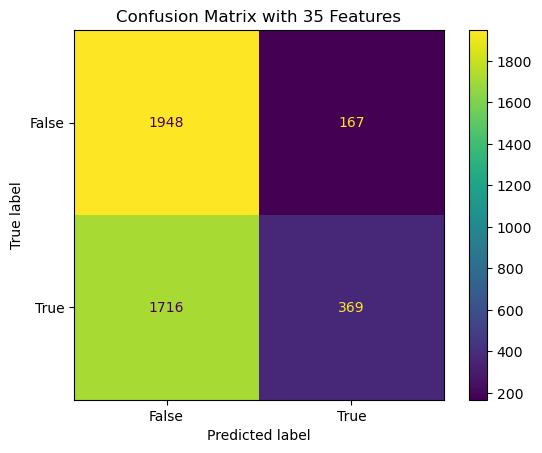

Number of Selected Features: 35
Accuracy: 55.166666666666664
Precision: 68.84328358208955
Recall: 17.697841726618705
F1 Score: 28.157191911484166



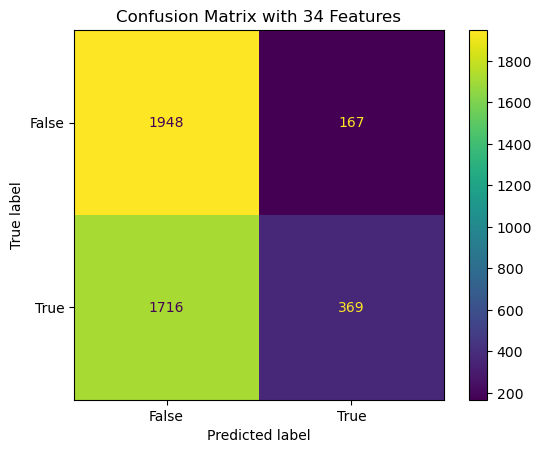

Number of Selected Features: 34
Accuracy: 55.166666666666664
Precision: 68.84328358208955
Recall: 17.697841726618705
F1 Score: 28.157191911484166



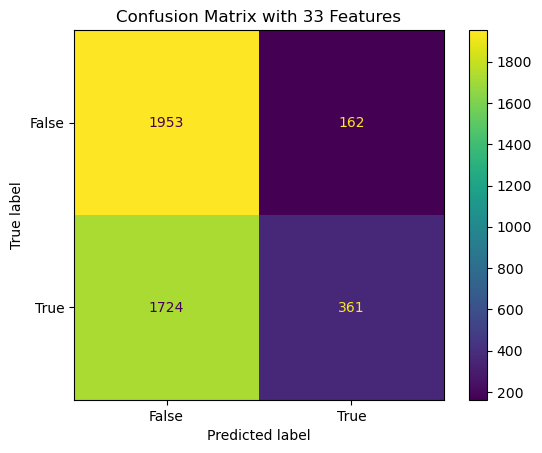

Number of Selected Features: 33
Accuracy: 55.095238095238095
Precision: 69.02485659655831
Recall: 17.314148681055155
F1 Score: 27.6840490797546



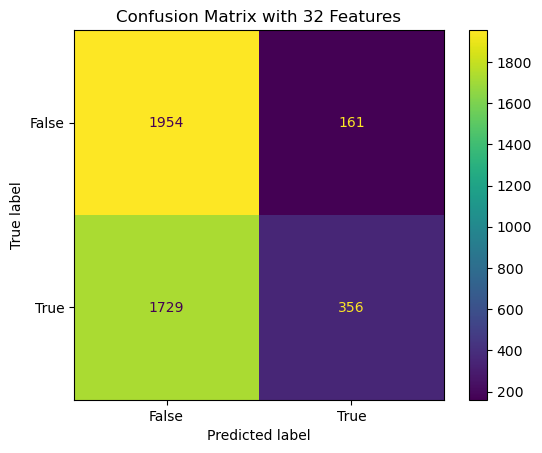

Number of Selected Features: 32
Accuracy: 55.00000000000001
Precision: 68.8588007736944
Recall: 17.074340527577938
F1 Score: 27.363566487317453



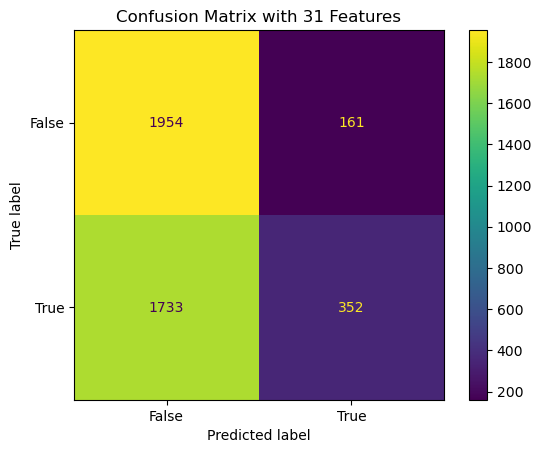

Number of Selected Features: 31
Accuracy: 54.9047619047619
Precision: 68.61598440545808
Recall: 16.882494004796165
F1 Score: 27.097767513471904



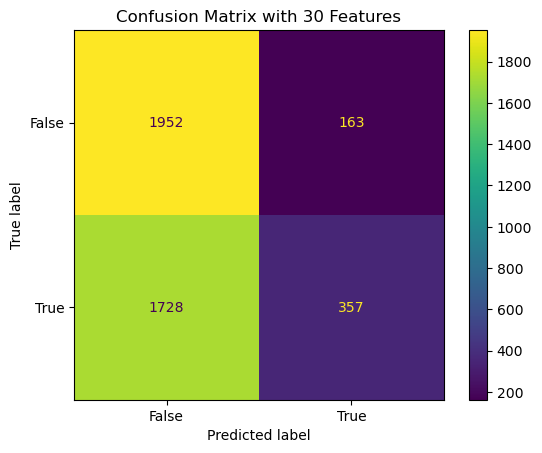

Number of Selected Features: 30
Accuracy: 54.97619047619048
Precision: 68.65384615384616
Recall: 17.12230215827338
F1 Score: 27.408829174664106



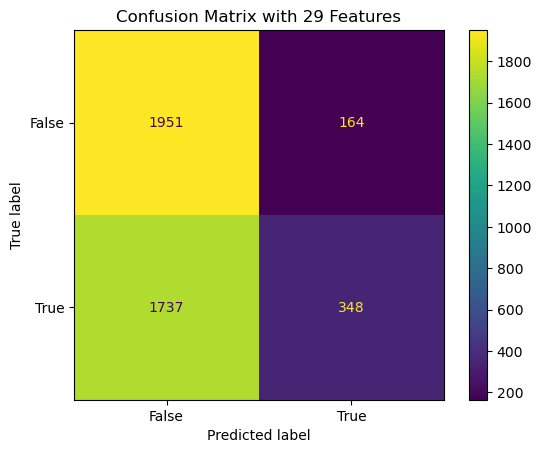

Number of Selected Features: 29
Accuracy: 54.73809523809524
Precision: 67.96875
Recall: 16.69064748201439
F1 Score: 26.800154023873702



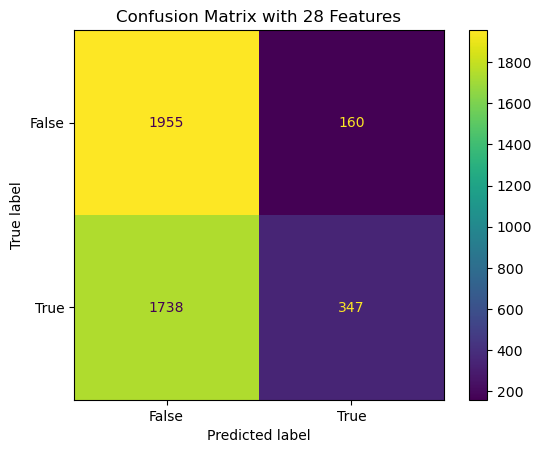

Number of Selected Features: 28
Accuracy: 54.80952380952381
Precision: 68.44181459566076
Recall: 16.642685851318944
F1 Score: 26.77469135802469



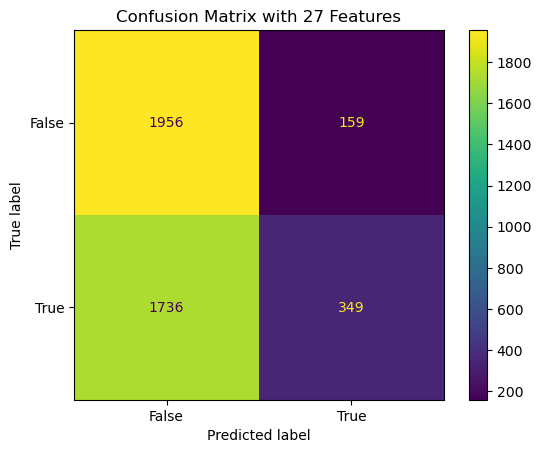

Number of Selected Features: 27
Accuracy: 54.88095238095239
Precision: 68.7007874015748
Recall: 16.73860911270983
F1 Score: 26.918627072888548



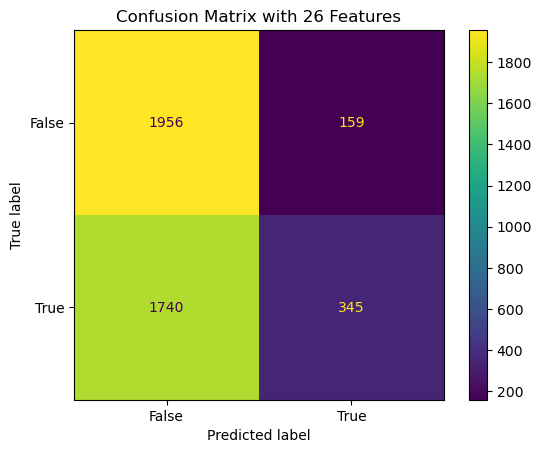

Number of Selected Features: 26
Accuracy: 54.785714285714285
Precision: 68.45238095238095
Recall: 16.546762589928058
F1 Score: 26.651216685979147



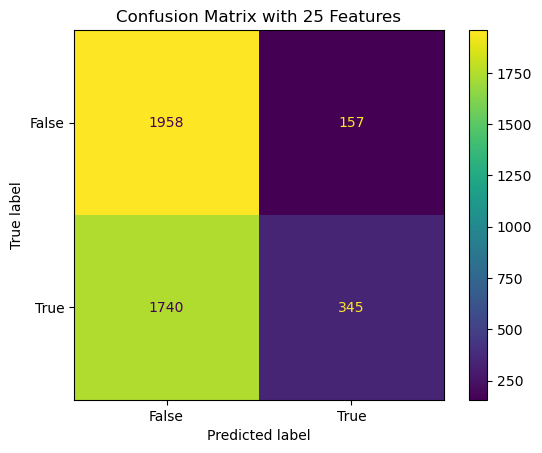

Number of Selected Features: 25
Accuracy: 54.833333333333336
Precision: 68.72509960159363
Recall: 16.546762589928058
F1 Score: 26.671820641669886



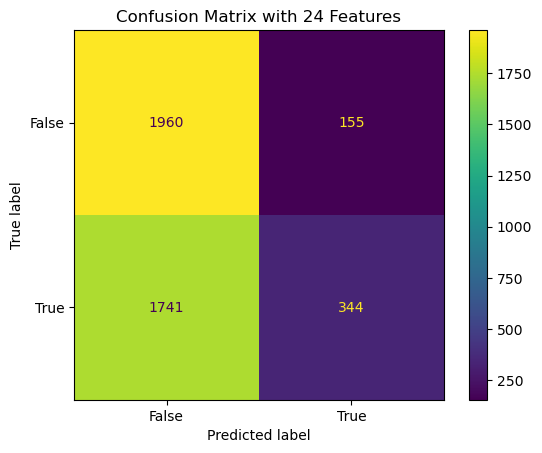

Number of Selected Features: 24
Accuracy: 54.85714285714286
Precision: 68.93787575150301
Recall: 16.498800959232614
F1 Score: 26.625386996904027



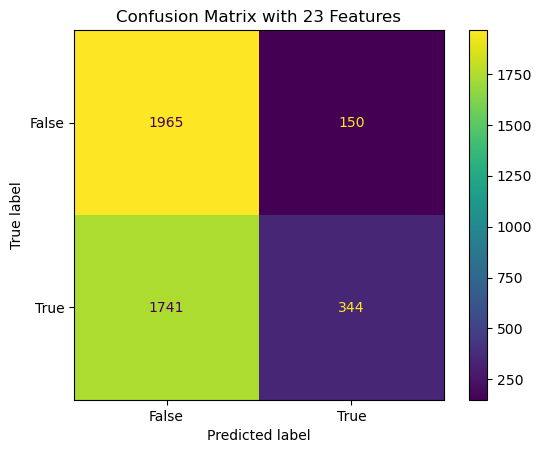

Number of Selected Features: 23
Accuracy: 54.97619047619048
Precision: 69.63562753036437
Recall: 16.498800959232614
F1 Score: 26.677006591702213



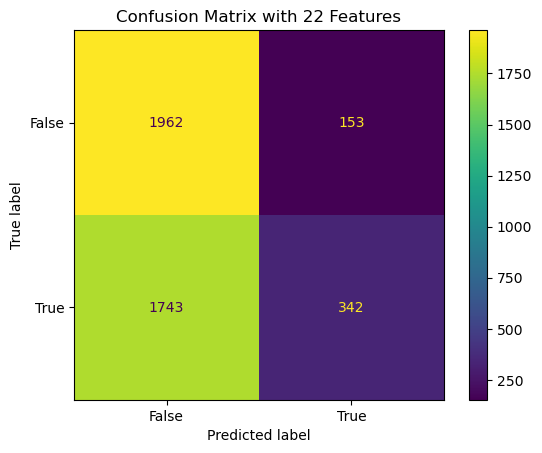

Number of Selected Features: 22
Accuracy: 54.85714285714286
Precision: 69.0909090909091
Recall: 16.402877697841728
F1 Score: 26.51162790697675



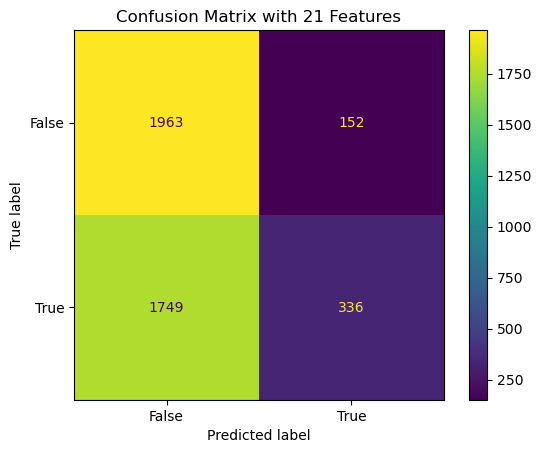

Number of Selected Features: 21
Accuracy: 54.73809523809524
Precision: 68.85245901639344
Recall: 16.115107913669064
F1 Score: 26.11737271667314



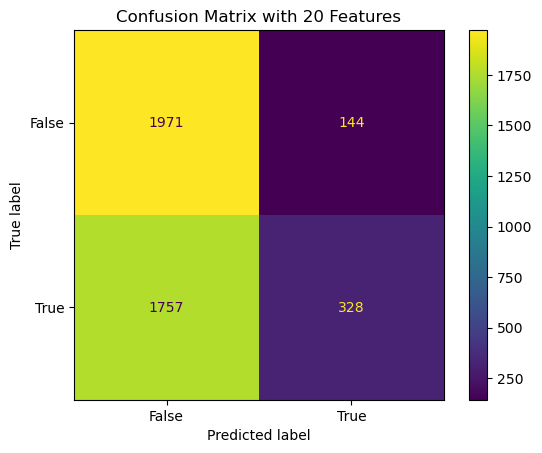

Number of Selected Features: 20
Accuracy: 54.73809523809524
Precision: 69.49152542372882
Recall: 15.731414868105514
F1 Score: 25.65506452874462



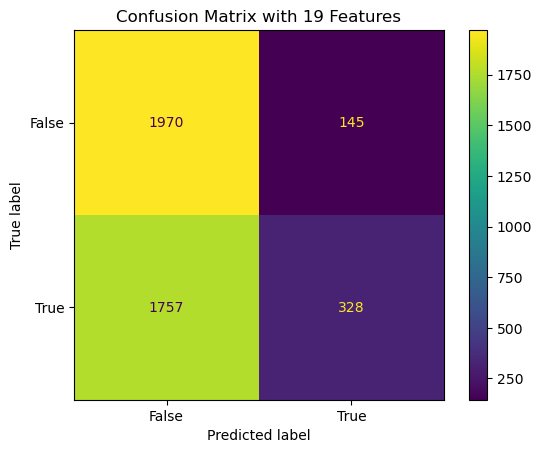

Number of Selected Features: 19
Accuracy: 54.714285714285715
Precision: 69.3446088794926
Recall: 15.731414868105514
F1 Score: 25.645035183737292



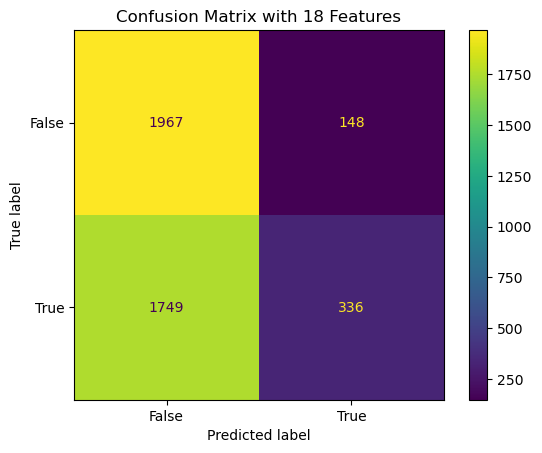

Number of Selected Features: 18
Accuracy: 54.833333333333336
Precision: 69.42148760330579
Recall: 16.115107913669064
F1 Score: 26.158038147138964



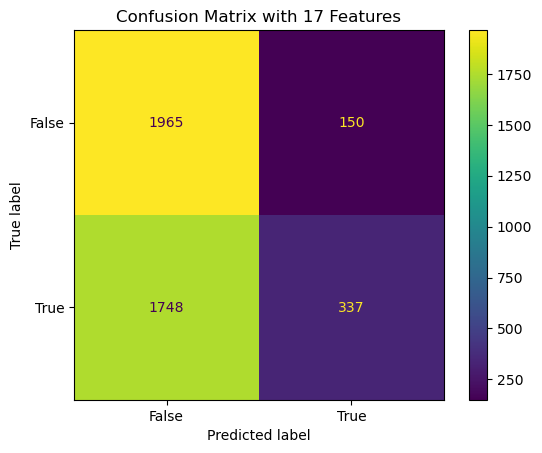

Number of Selected Features: 17
Accuracy: 54.80952380952381
Precision: 69.19917864476386
Recall: 16.163069544364507
F1 Score: 26.20528771384137



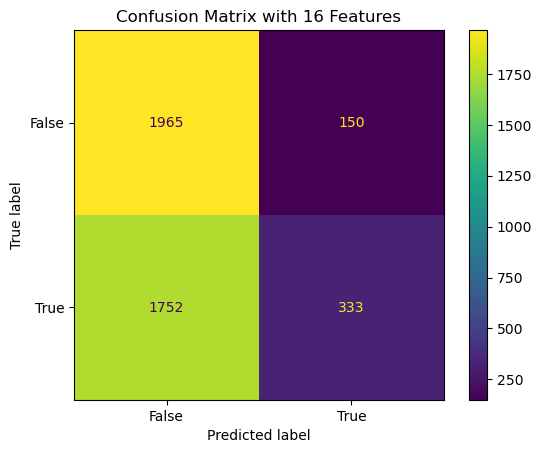

Number of Selected Features: 16
Accuracy: 54.714285714285715
Precision: 68.94409937888199
Recall: 15.971223021582734
F1 Score: 25.934579439252335



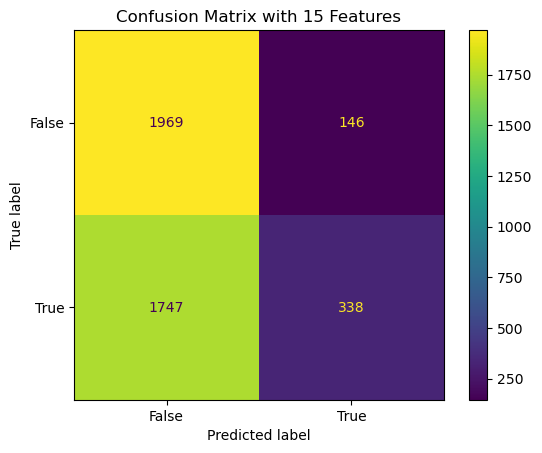

Number of Selected Features: 15
Accuracy: 54.92857142857142
Precision: 69.83471074380165
Recall: 16.211031175059954
F1 Score: 26.31374075515765



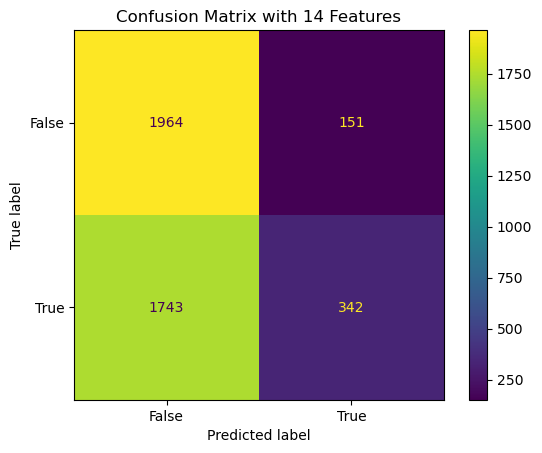

Number of Selected Features: 14
Accuracy: 54.9047619047619
Precision: 69.3711967545639
Recall: 16.402877697841728
F1 Score: 26.5321955003879



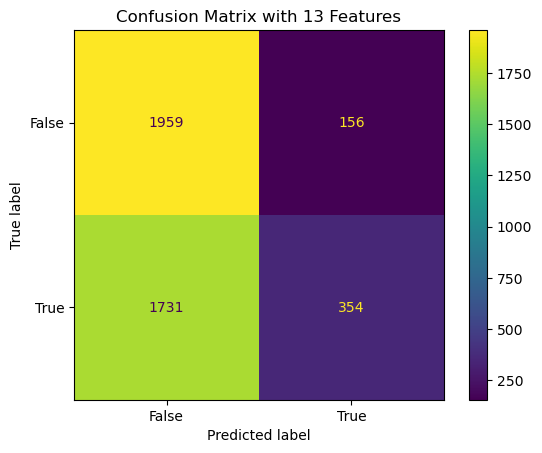

Number of Selected Features: 13
Accuracy: 55.07142857142857
Precision: 69.41176470588235
Recall: 16.97841726618705
F1 Score: 27.283236994219656



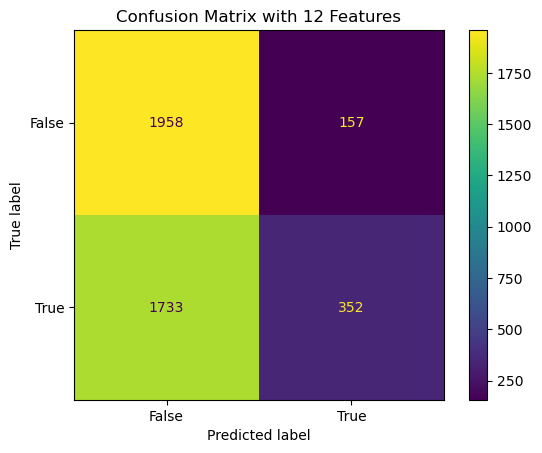

Number of Selected Features: 12
Accuracy: 55.00000000000001
Precision: 69.15520628683693
Recall: 16.882494004796165
F1 Score: 27.139552814186587



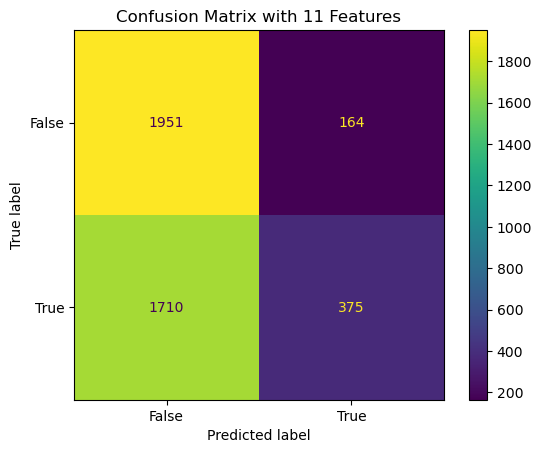

Number of Selected Features: 11
Accuracy: 55.38095238095239
Precision: 69.57328385899815
Recall: 17.985611510791365
F1 Score: 28.58231707317073



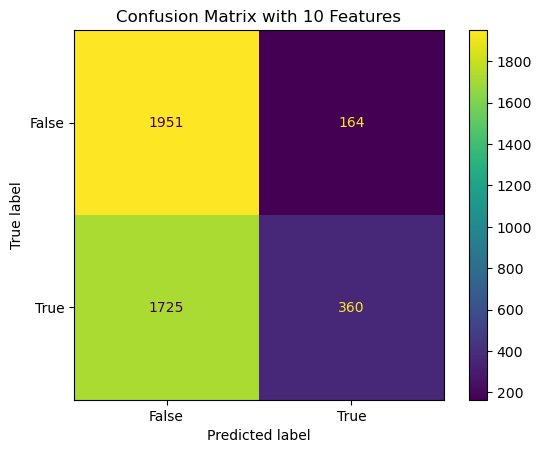

Number of Selected Features: 10
Accuracy: 55.02380952380952
Precision: 68.70229007633588
Recall: 17.26618705035971
F1 Score: 27.596780375622842



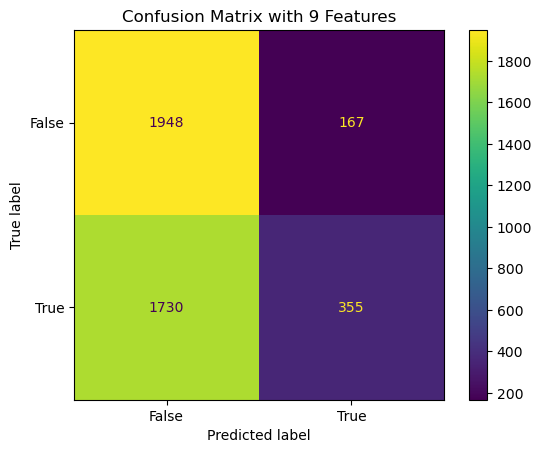

Number of Selected Features: 9
Accuracy: 54.833333333333336
Precision: 68.00766283524904
Recall: 17.026378896882495
F1 Score: 27.234369006520904



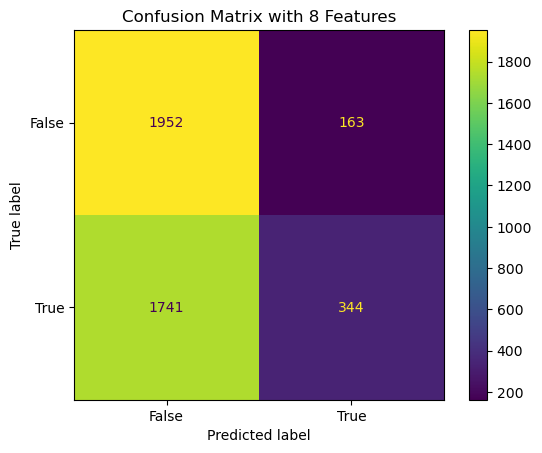

Number of Selected Features: 8
Accuracy: 54.666666666666664
Precision: 67.85009861932939
Recall: 16.498800959232614
F1 Score: 26.543209876543212



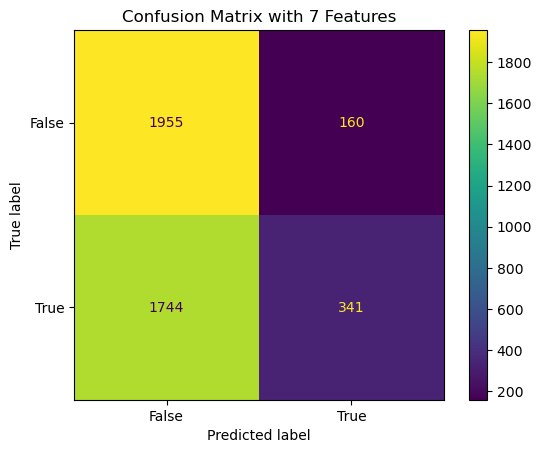

Number of Selected Features: 7
Accuracy: 54.666666666666664
Precision: 68.06387225548902
Recall: 16.354916067146284
F1 Score: 26.37277648878577



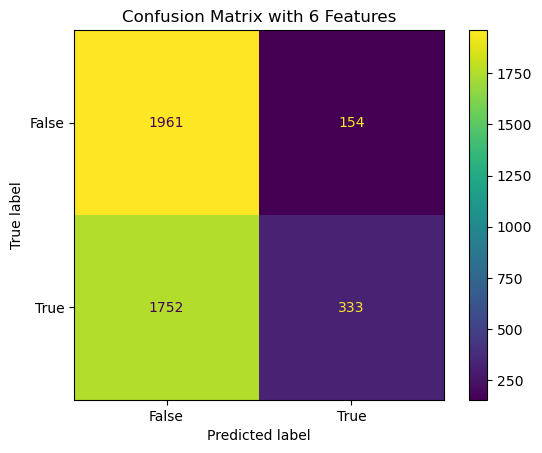

Number of Selected Features: 6
Accuracy: 54.61904761904762
Precision: 68.37782340862422
Recall: 15.971223021582734
F1 Score: 25.894245723172627



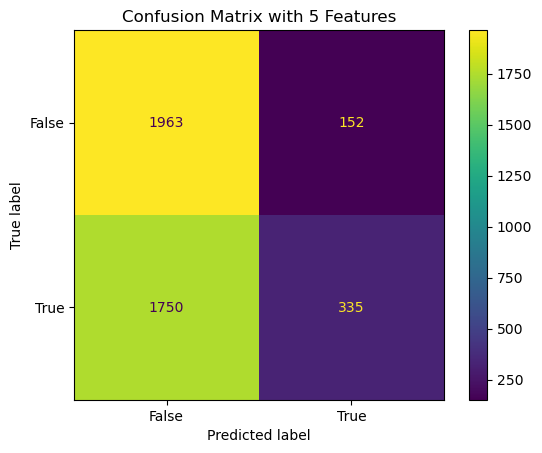

Number of Selected Features: 5
Accuracy: 54.714285714285715
Precision: 68.78850102669405
Recall: 16.06714628297362
F1 Score: 26.049766718507



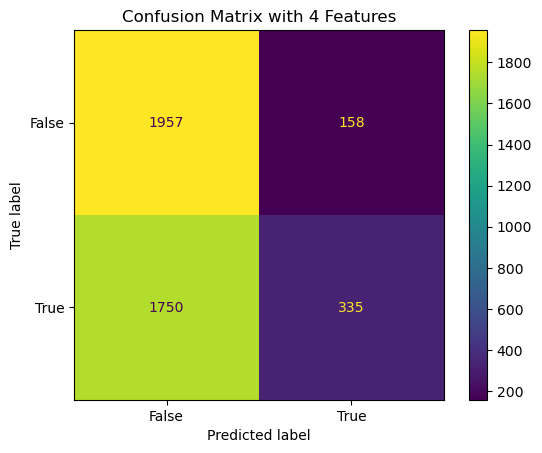

Number of Selected Features: 4
Accuracy: 54.57142857142857
Precision: 67.95131845841786
Recall: 16.06714628297362
F1 Score: 25.989138867339022



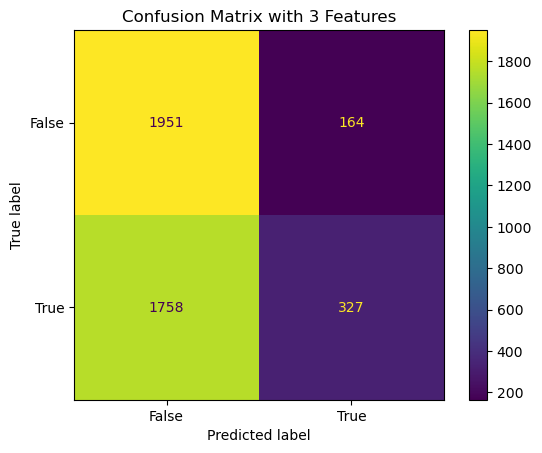

Number of Selected Features: 3
Accuracy: 54.23809523809524
Precision: 66.59877800407332
Recall: 15.683453237410072
F1 Score: 25.388198757763973



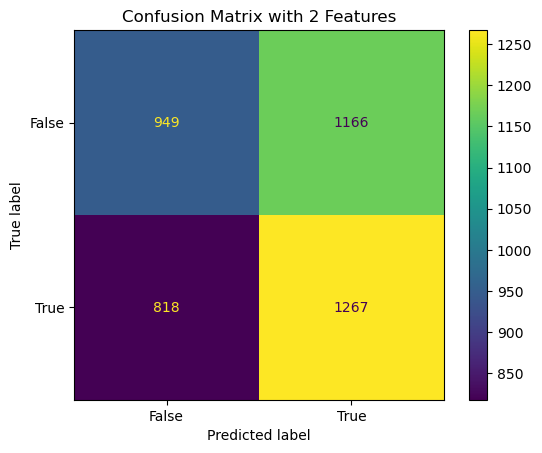

Number of Selected Features: 2
Accuracy: 52.761904761904766
Precision: 52.075626798191536
Recall: 60.76738609112709
F1 Score: 56.08676405489156



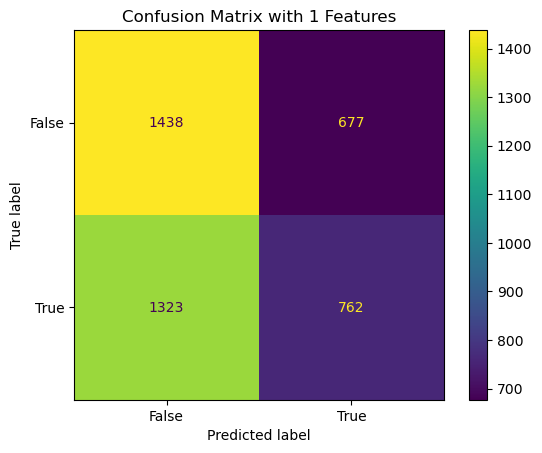

Number of Selected Features: 1
Accuracy: 52.38095238095239
Precision: 52.95343988881167
Recall: 36.54676258992806
F1 Score: 43.24631101021566



In [15]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import os

# Set working directory
os.chdir('/Users/rimpa/Downloads/masters_project')

# Read JSON file
df = pd.read_json('sentiVADER_df.json', orient='records')

# Train and test set
X = df.drop(['Label'], axis=1)
y = df['Label']
train_size = 0.8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)

n_features_range = range(X.shape[1], 0, -1)

results = []

# Variables to store the best model's results
best_f1_score = 0
best_cm = None
best_n_features = 0

for n_features_to_select in n_features_range:
    regressor = RandomForestRegressor(n_estimators=100, max_depth=10)
    rfe = RFE(regressor, n_features_to_select=n_features_to_select)
    rfe.fit(X_train, y_train)

    X_train_transformed = rfe.transform(X_train)
    X_test_transformed = rfe.transform(X_test)

    # Gaussian Naive Bayes
    gnb1 = GaussianNB()
    gnb1.fit(X_train_transformed, y_train)
    predictions = gnb1.predict(X_test_transformed)

    # Evaluate
    gnb_accuracy = accuracy_score(y_test, predictions) * 100
    gnb_precision = precision_score(y_test, predictions) * 100
    gnb_recall = recall_score(y_test, predictions) * 100
    gnb_f1_score = f1_score(y_test, predictions) * 100

    # Display current confusion matrix
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
    disp.plot()
    plt.title(f"Confusion Matrix with {n_features_to_select} Features")
    plt.show()

    print(f"Number of Selected Features: {n_features_to_select}")
    print("Accuracy:", gnb_accuracy)
    print("Precision:", gnb_precision)
    print("Recall:", gnb_recall)
    print("F1 Score:", gnb_f1_score)
    print()
    
    result = {
        "n_features": n_features_to_select,
        "accuracy": gnb_accuracy,
        "precision": gnb_precision,
        "recall": gnb_recall,
        "f1_score": gnb_f1_score
    }

    results.append(result)    

    # Check if the current F1 score is the best
    if gnb_f1_score > best_f1_score:
        best_f1_score = gnb_f1_score
        best_cm = cm
        best_n_features = n_features_to_select

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Save the results in an Excel file
results_df.to_excel('results_sentiVADER_ML_NB.xlsx', index=False)

Best Confusion Matrix:


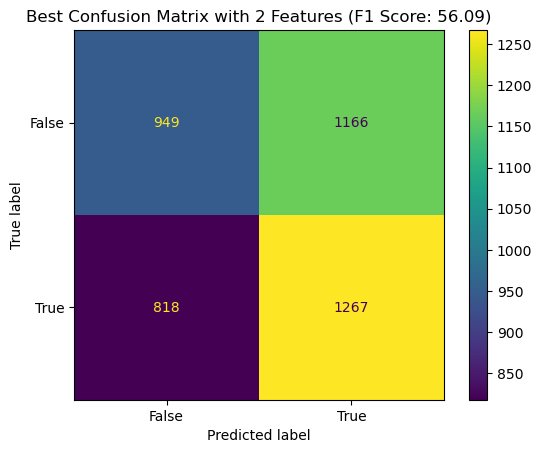

In [16]:
# Display the best confusion matrix in a new cell
print("Best Confusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=best_cm, display_labels=[False, True])
disp.plot()
plt.title(f"Best Confusion Matrix with {best_n_features} Features (F1 Score: {best_f1_score:.2f})")
plt.show()